## Script to Visualize custom episode lists generated by the simulation

In [1]:
#Import libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import glob
import seaborn as sns; sns.set()
sns.set(style="dark")

In [2]:
#Create a list of all file names
filenames_list = sorted(glob.glob('../her_throw1g_playback_25/her_throw1g_playback/steps/*monitor.csv'))
print('Length of file: ',len(filenames_list)) 

Length of file:  26


/home/cmu/Software/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


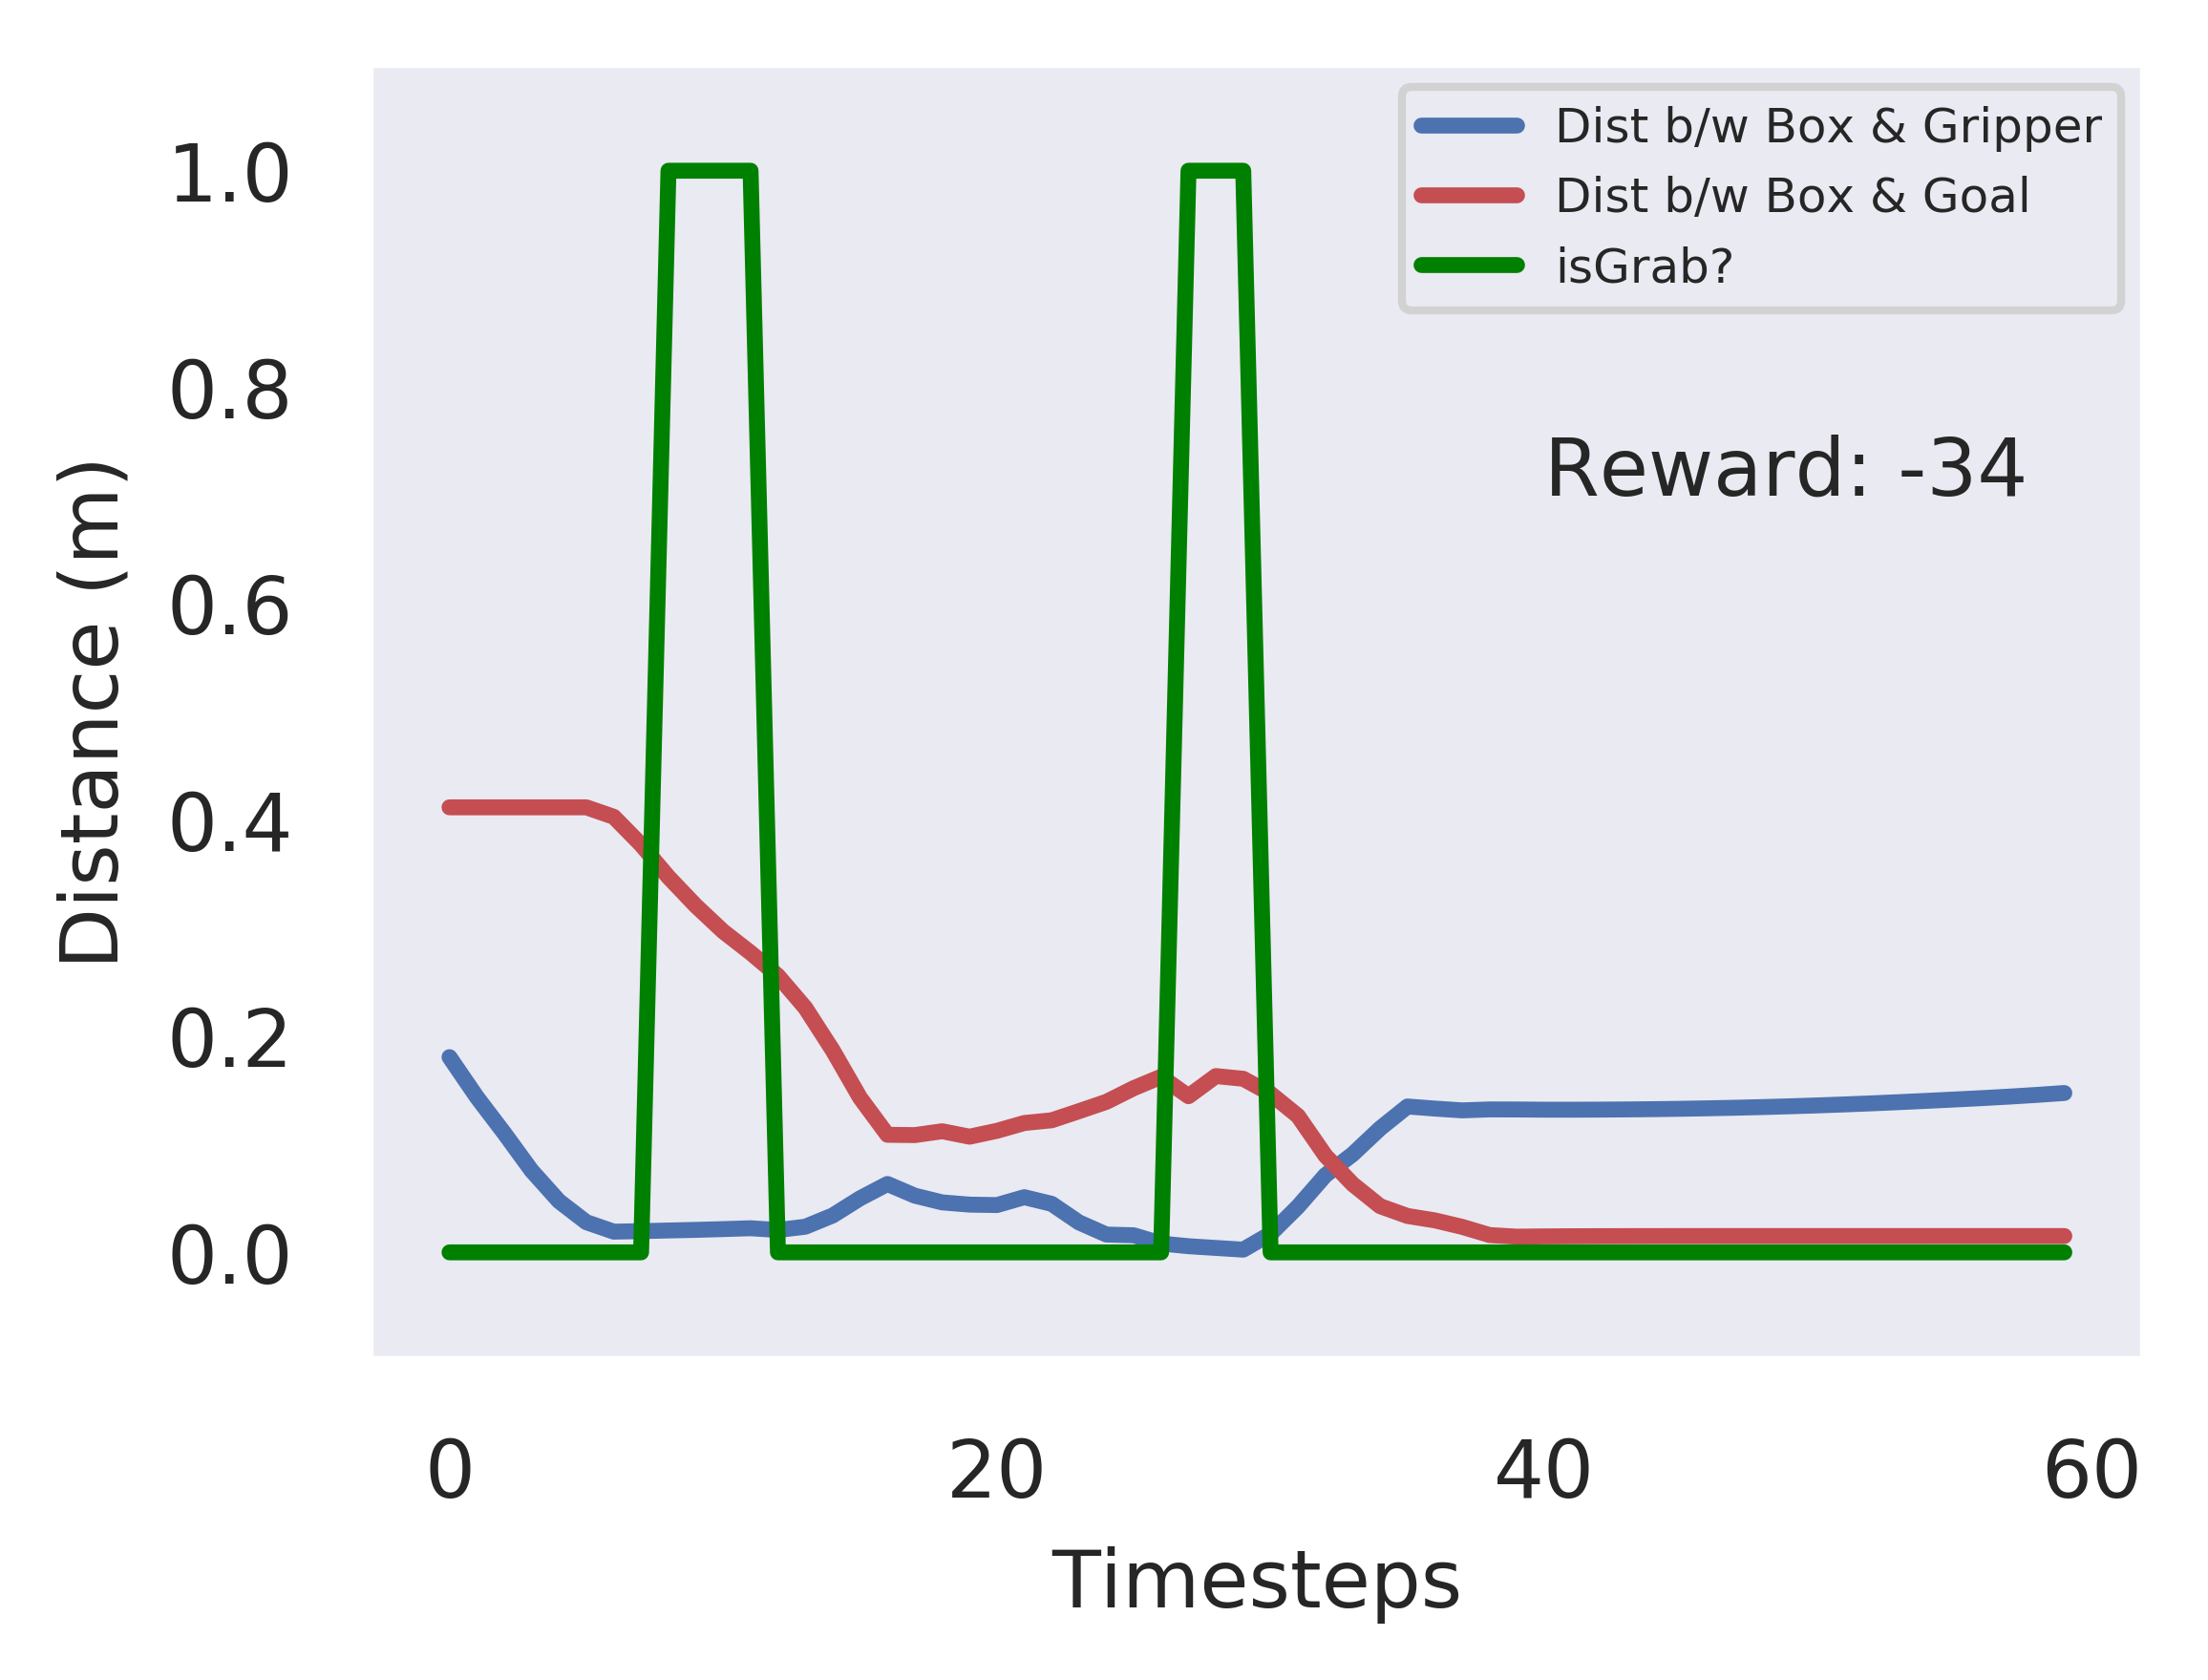

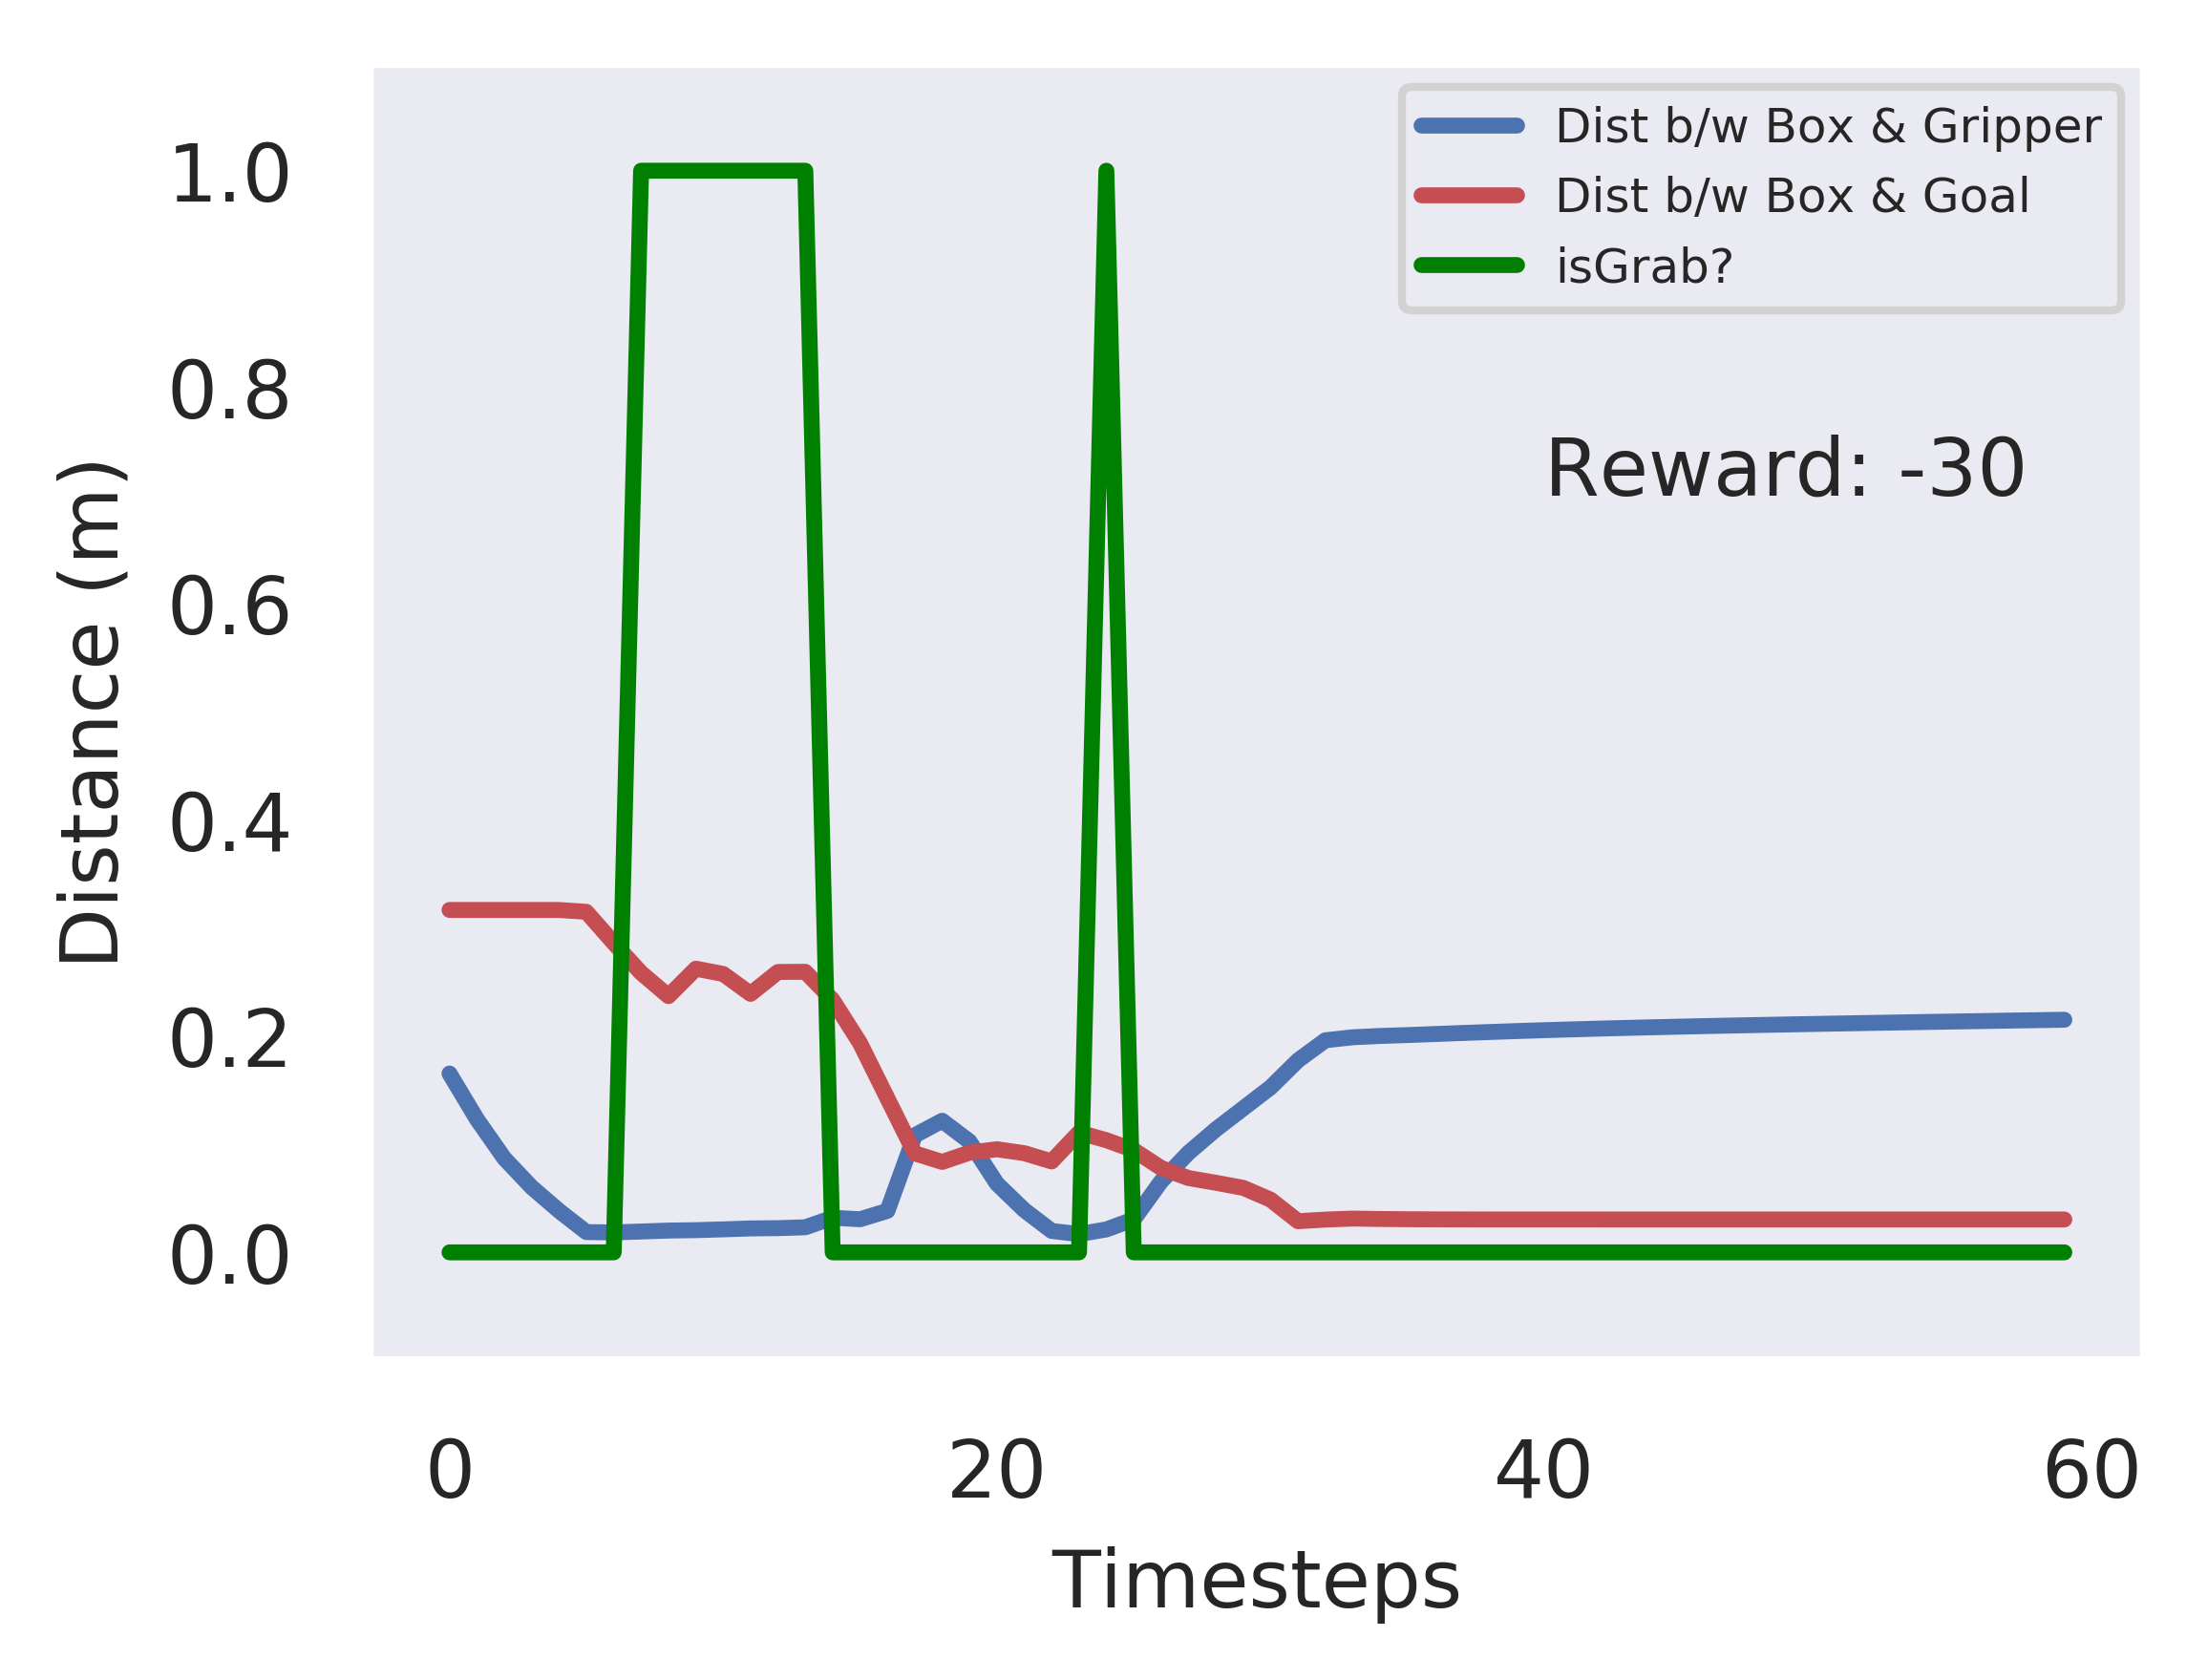

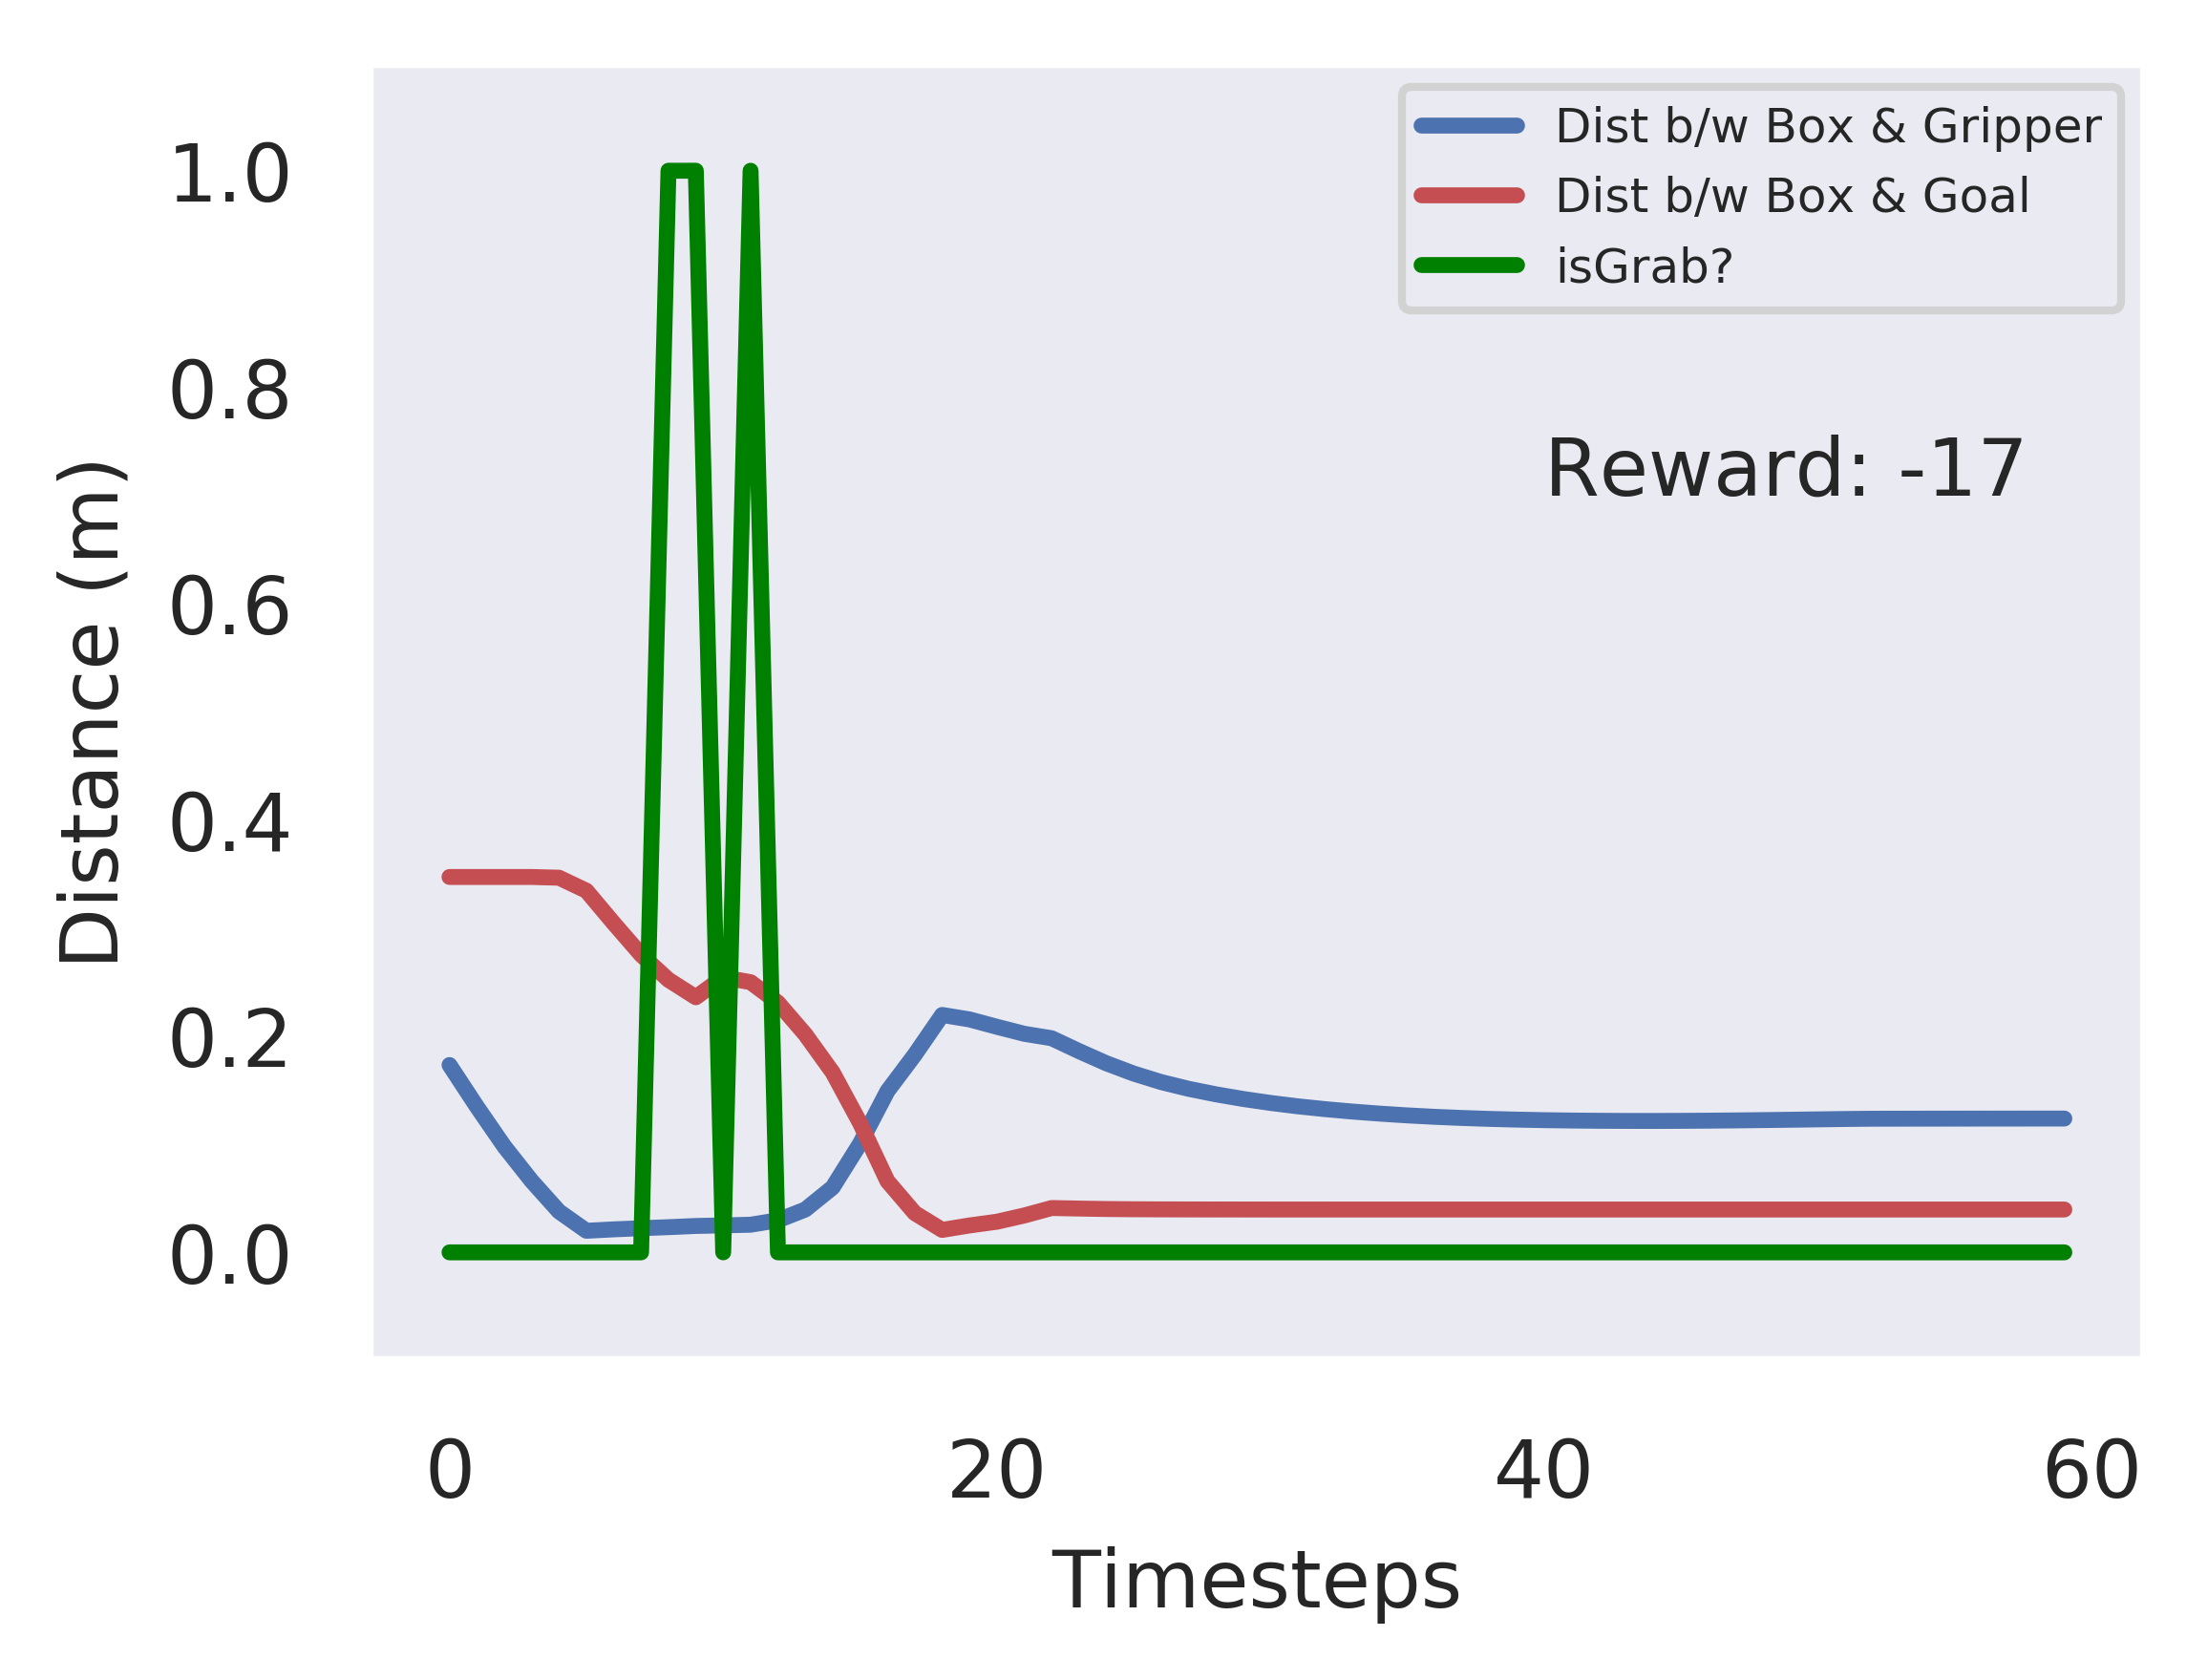

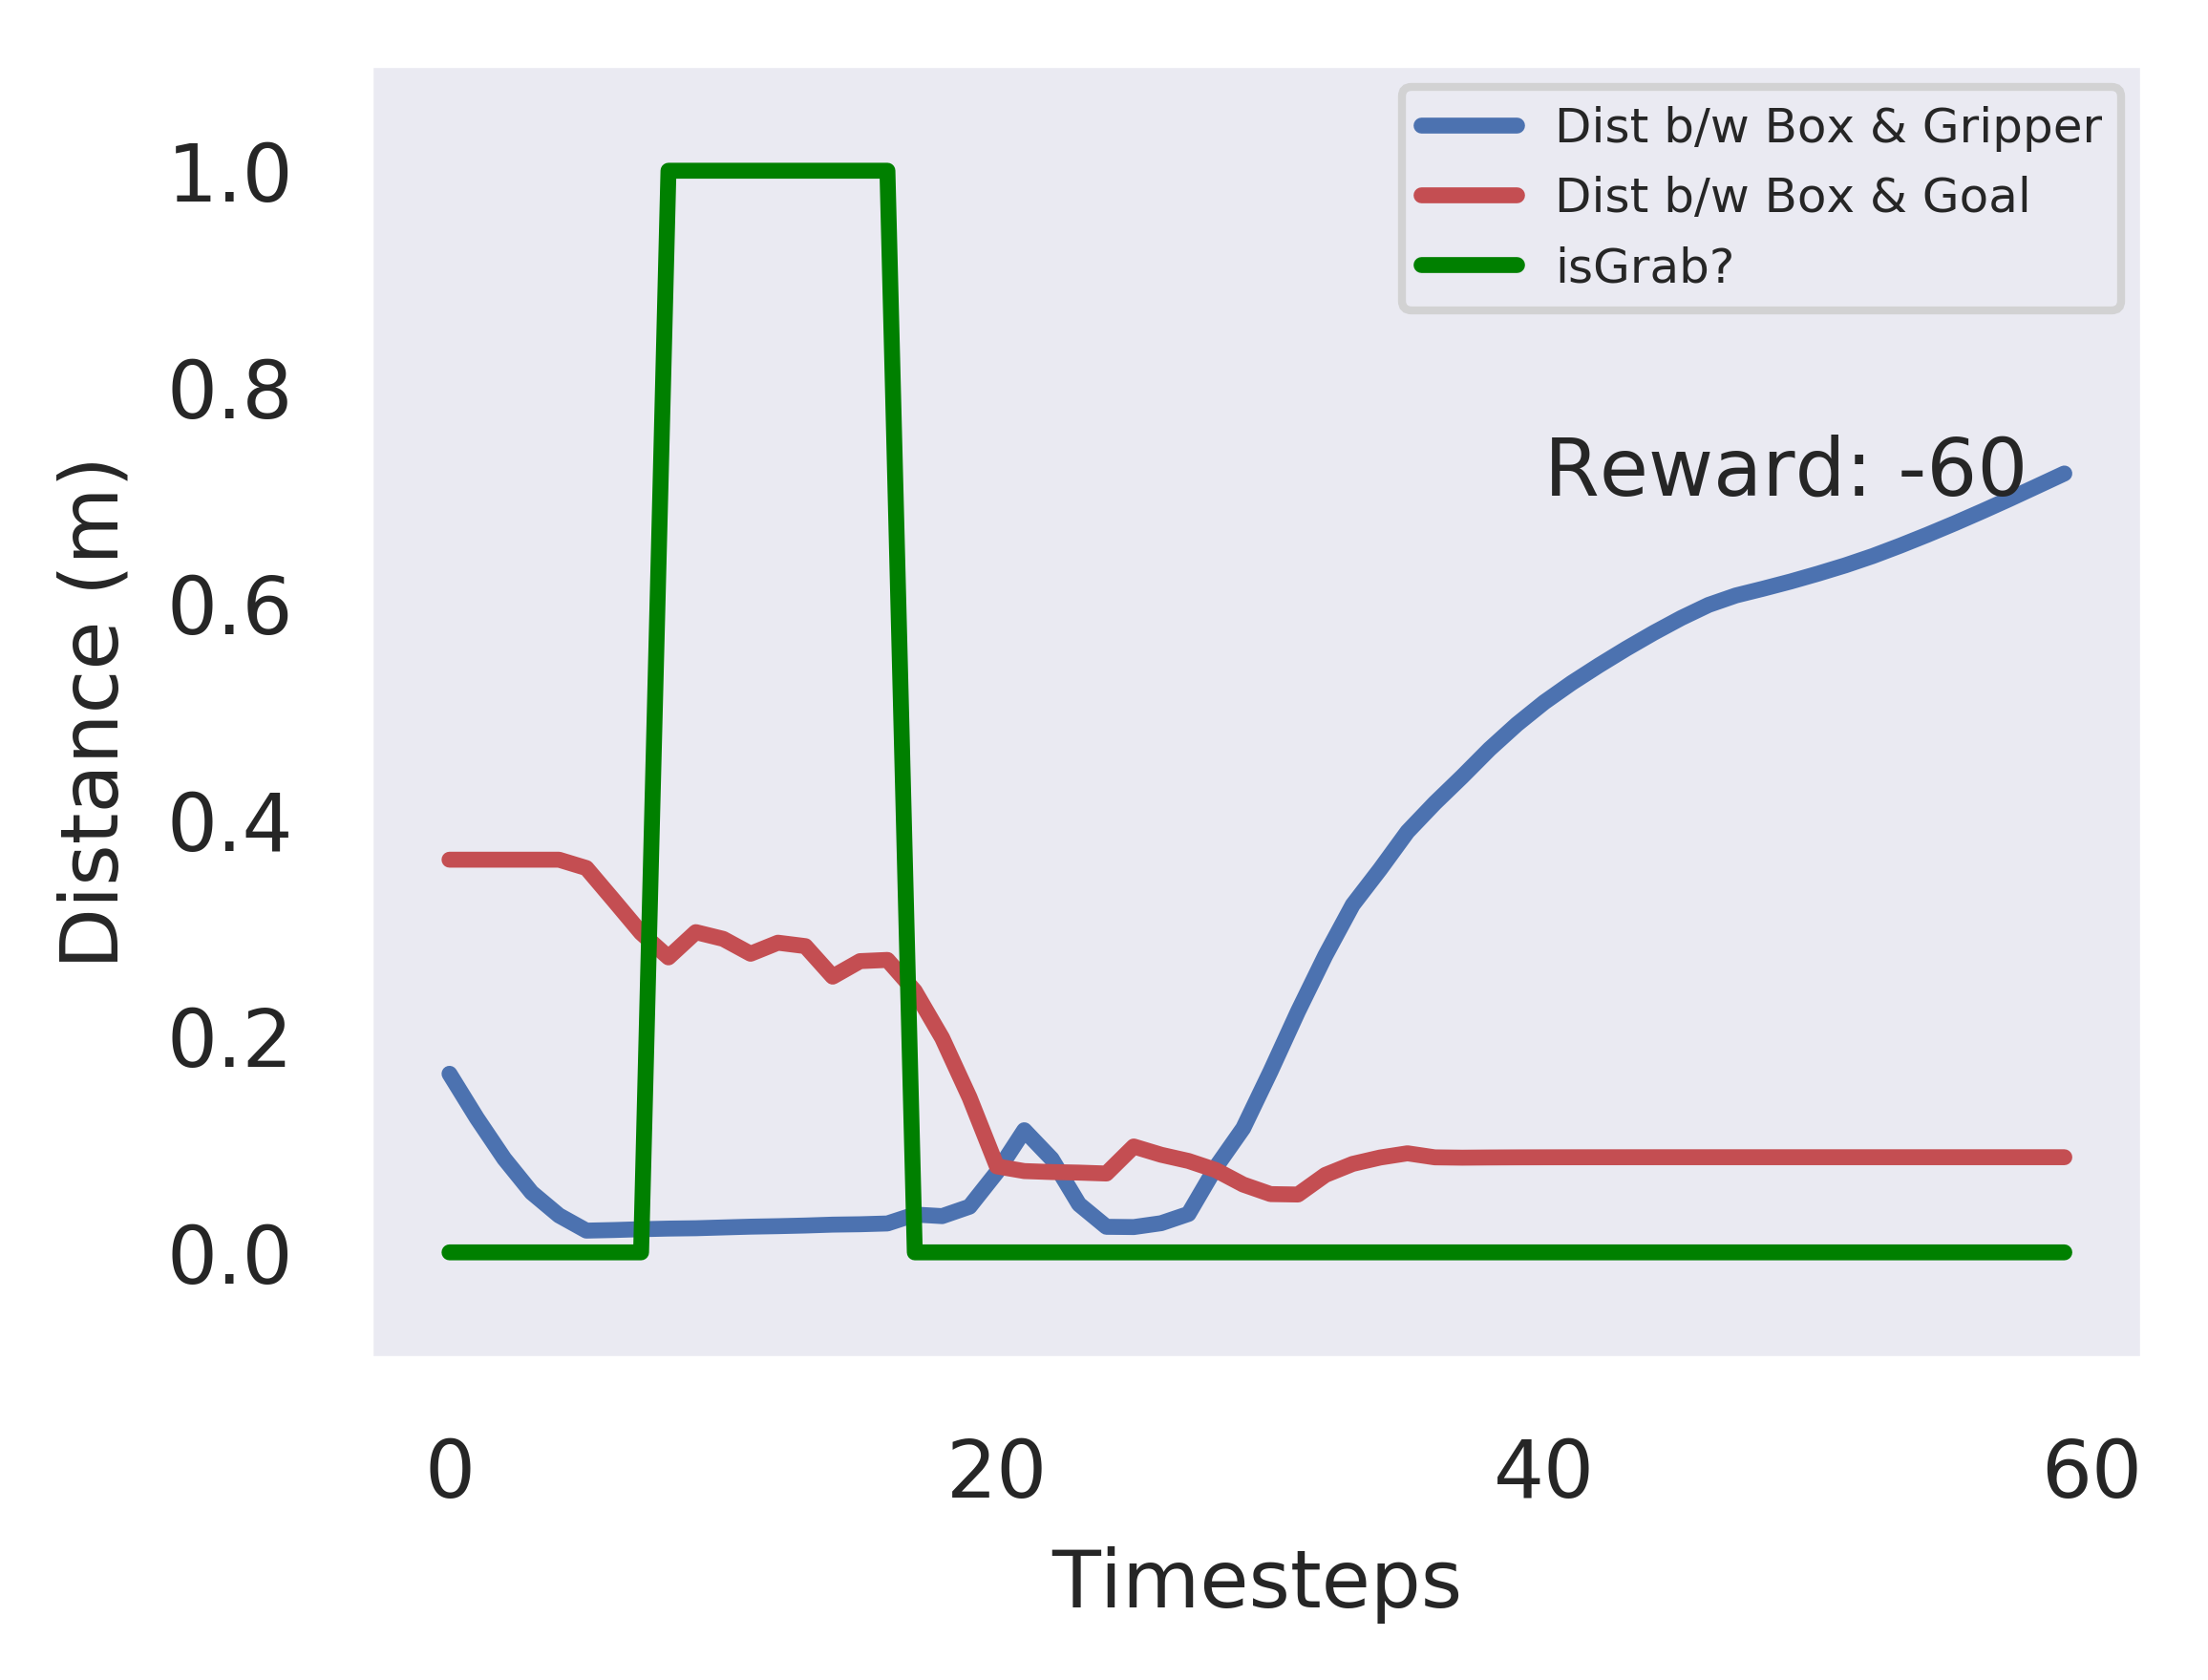

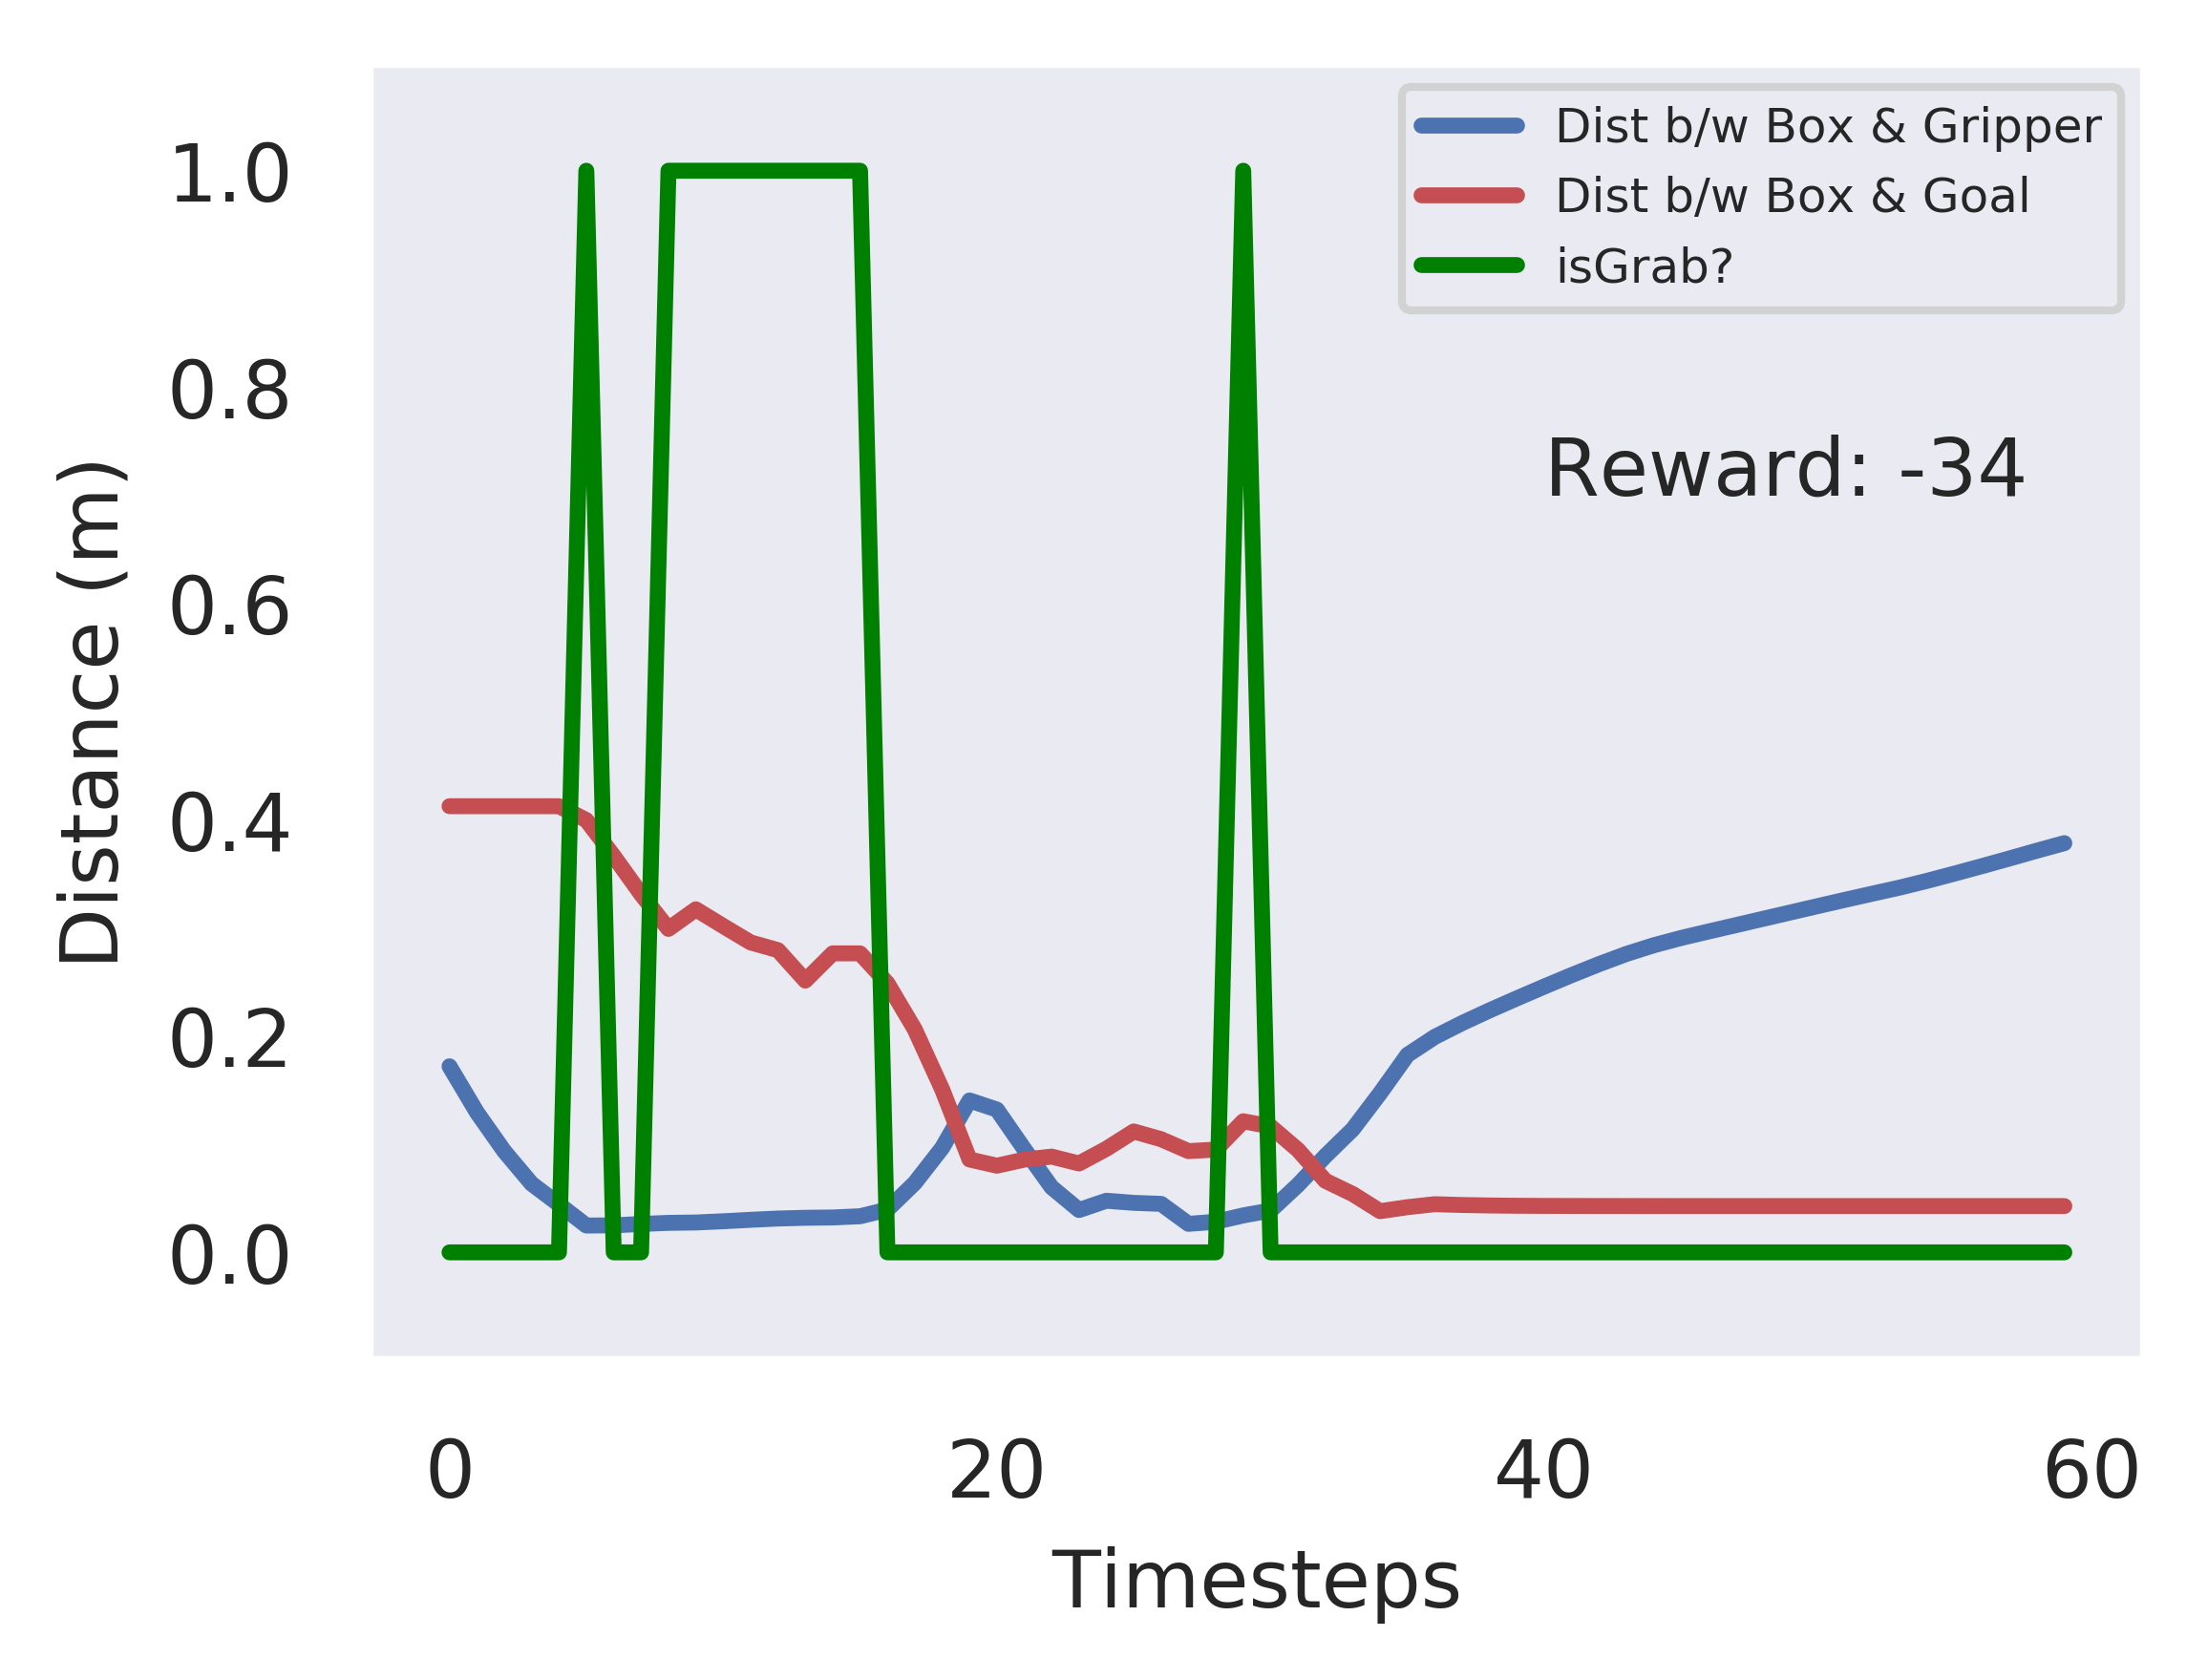

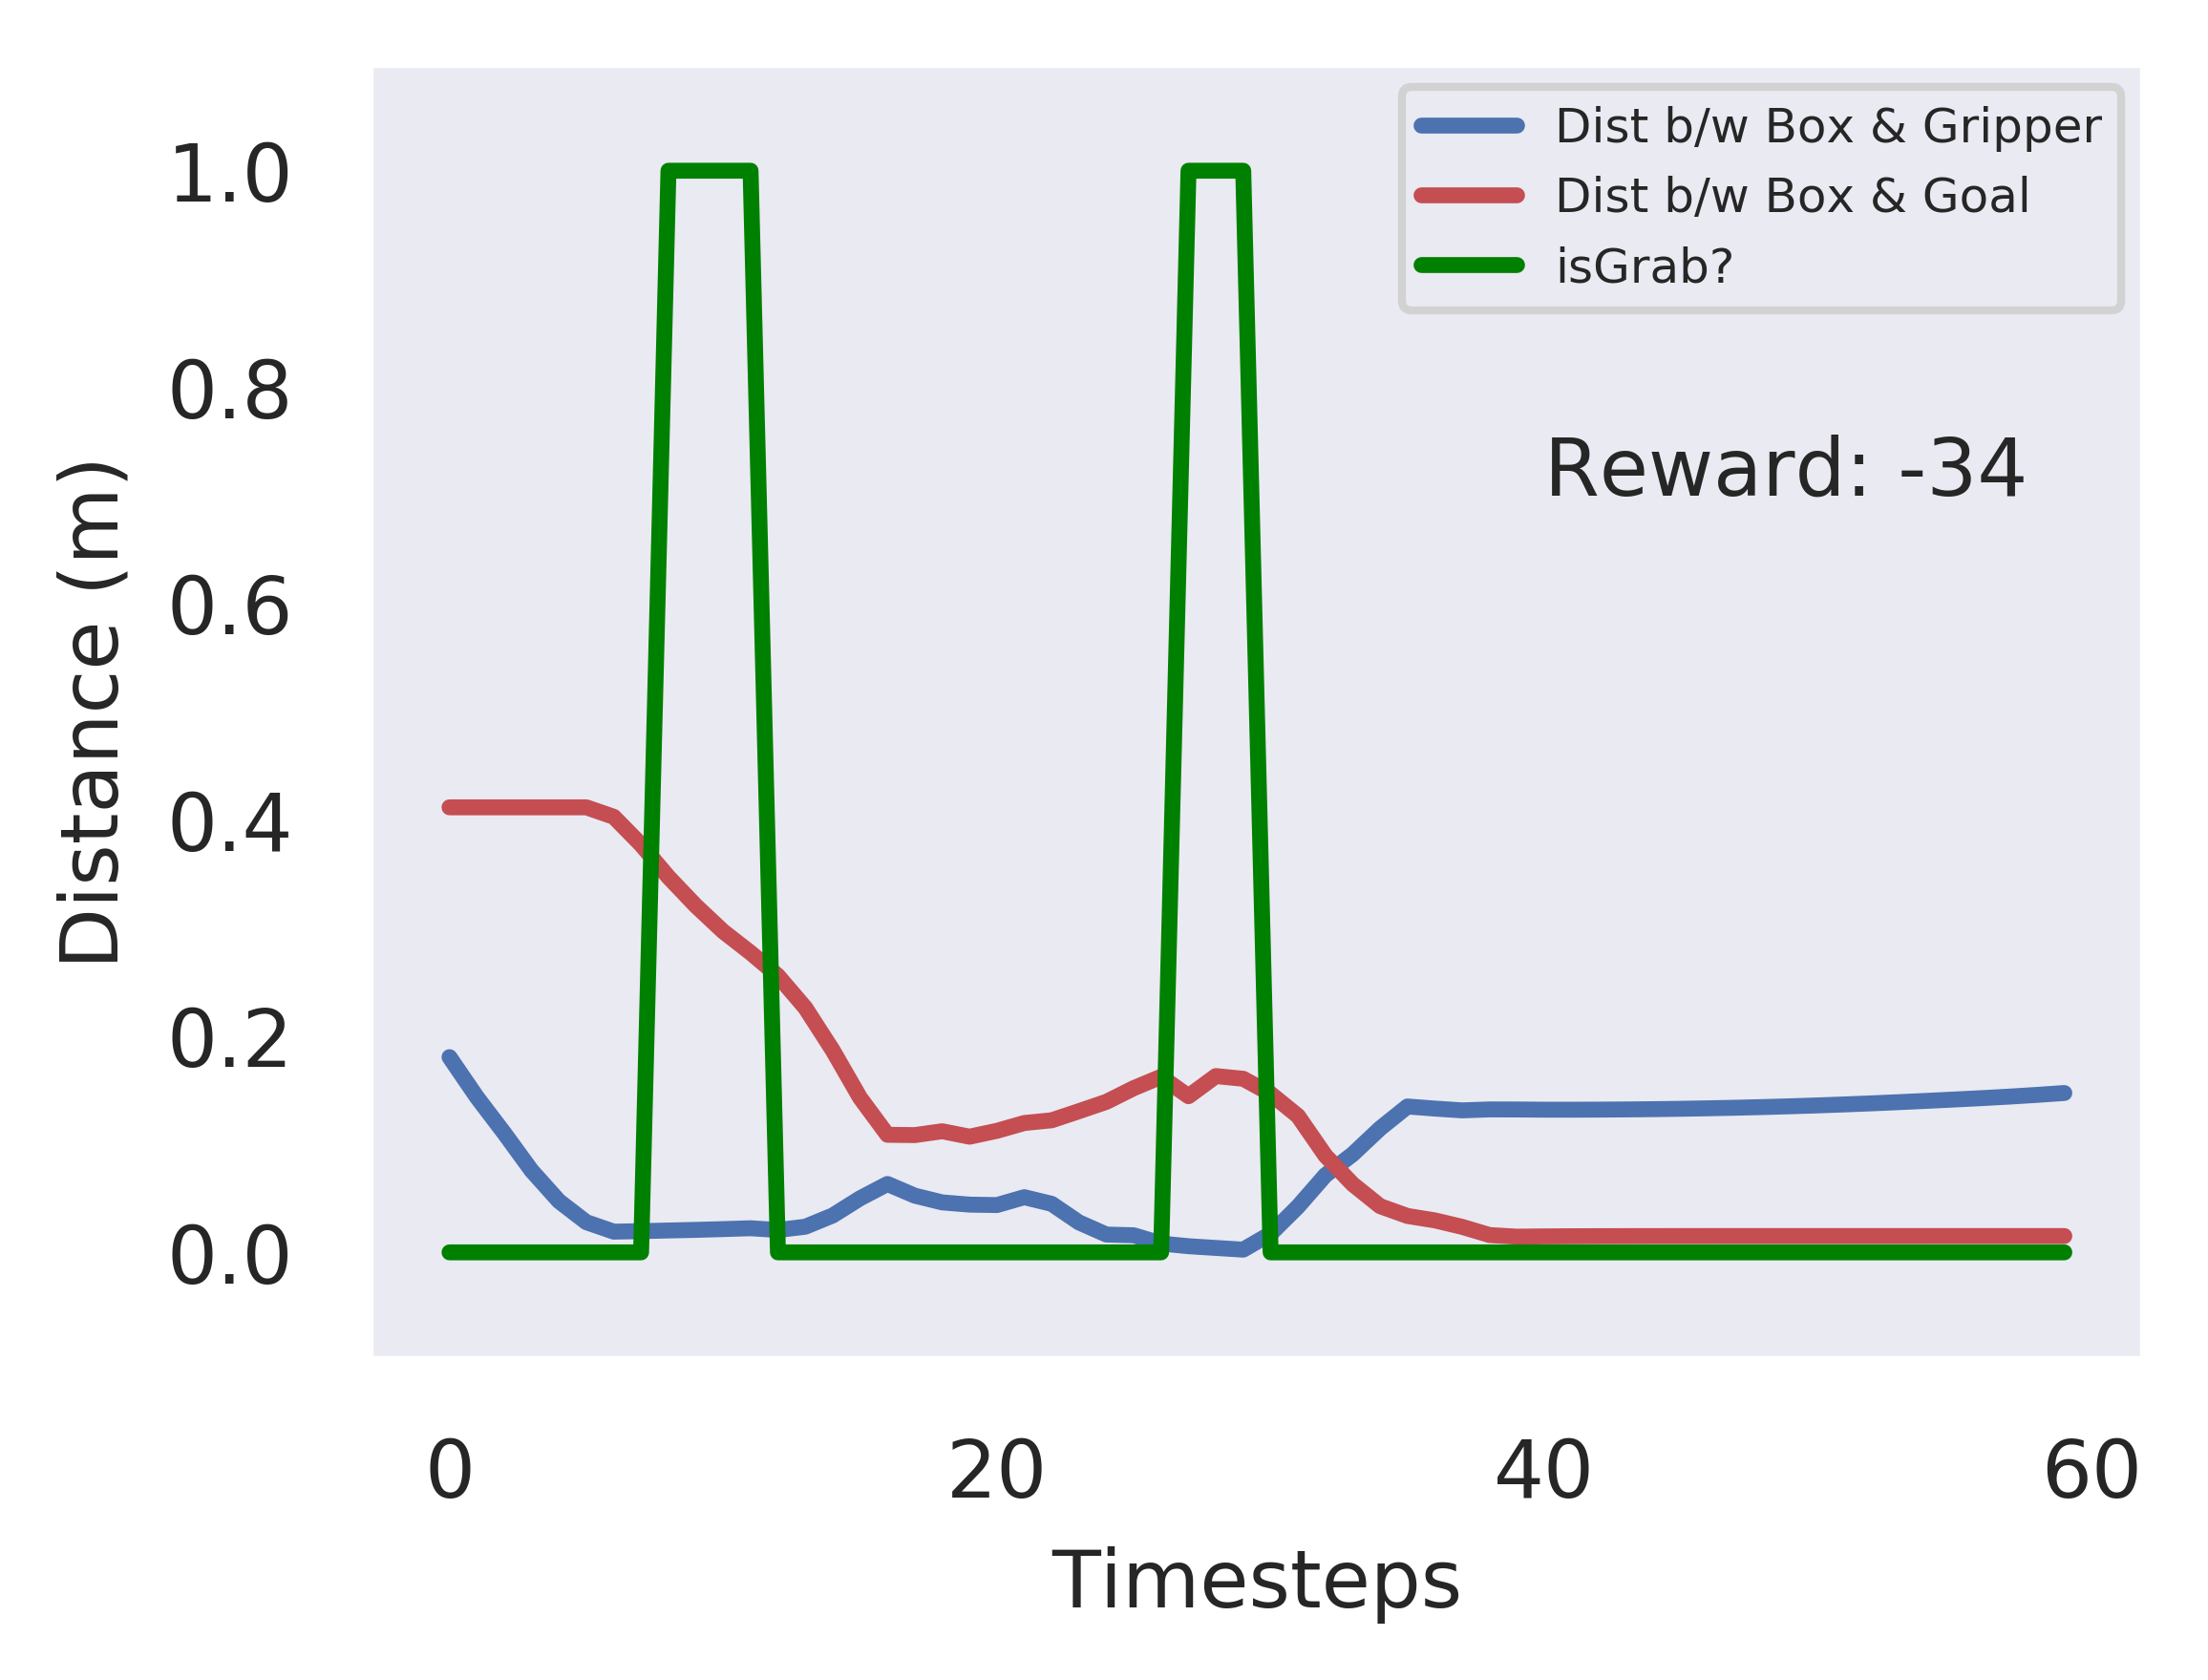

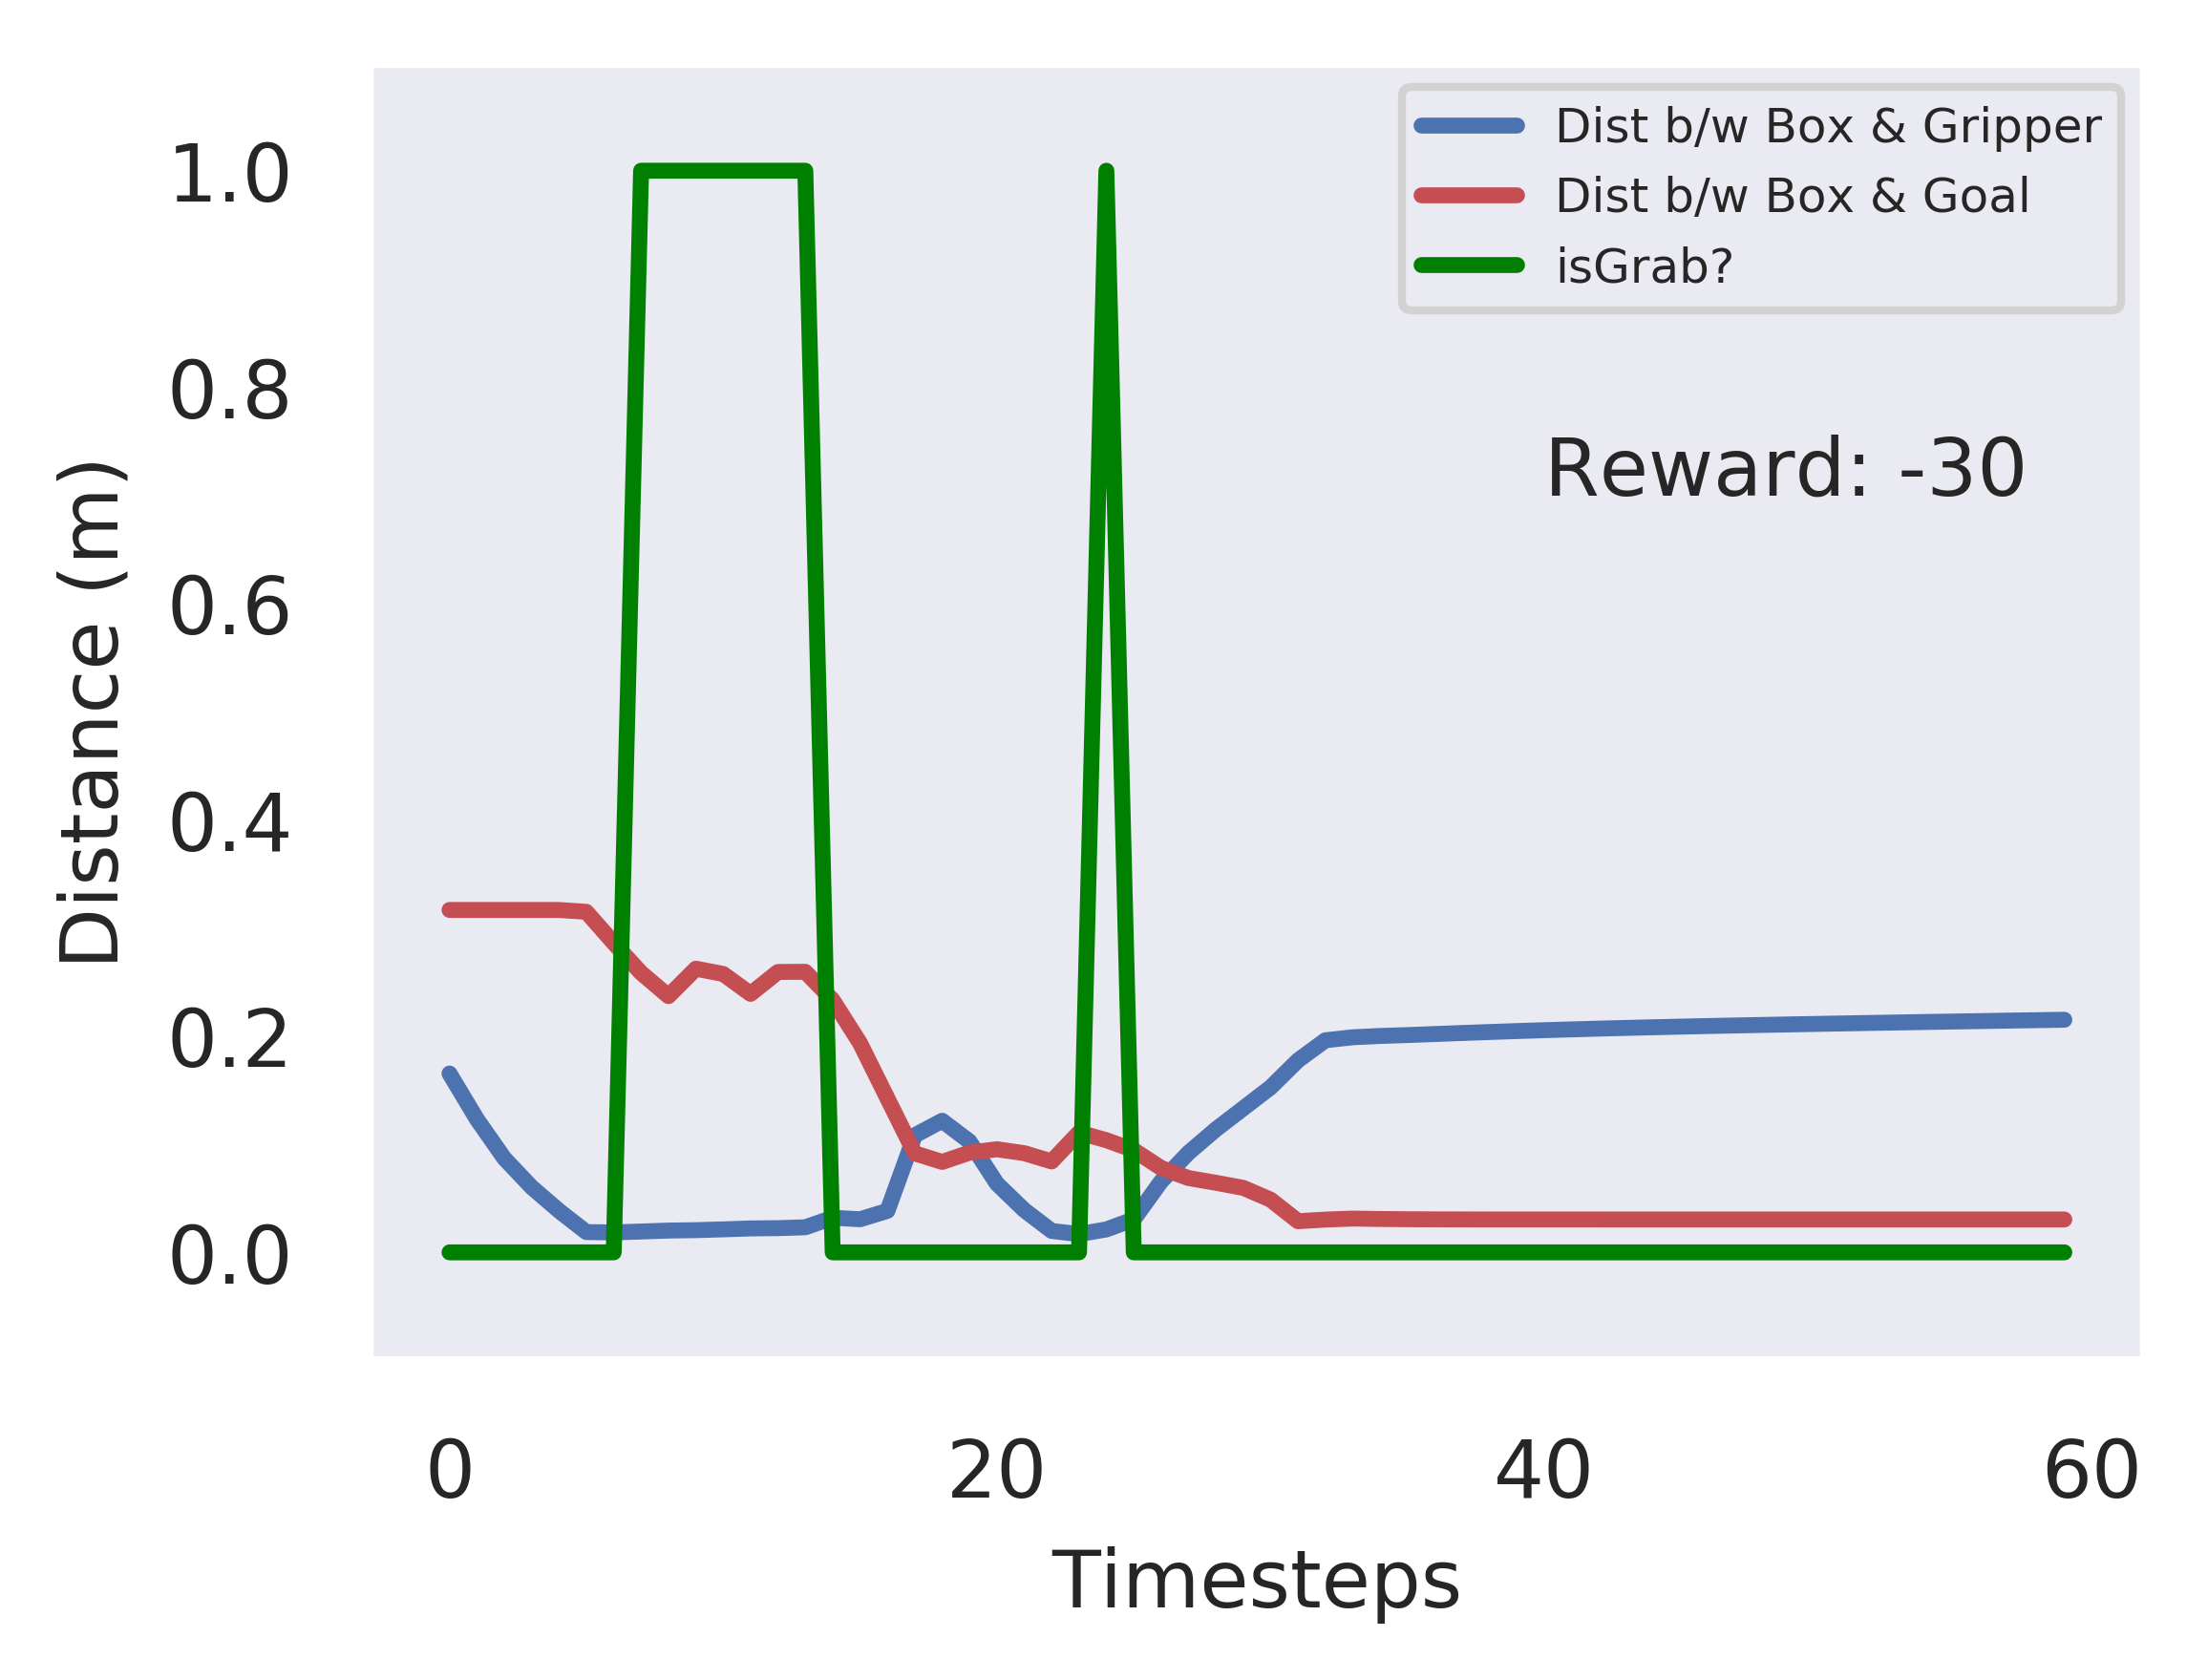

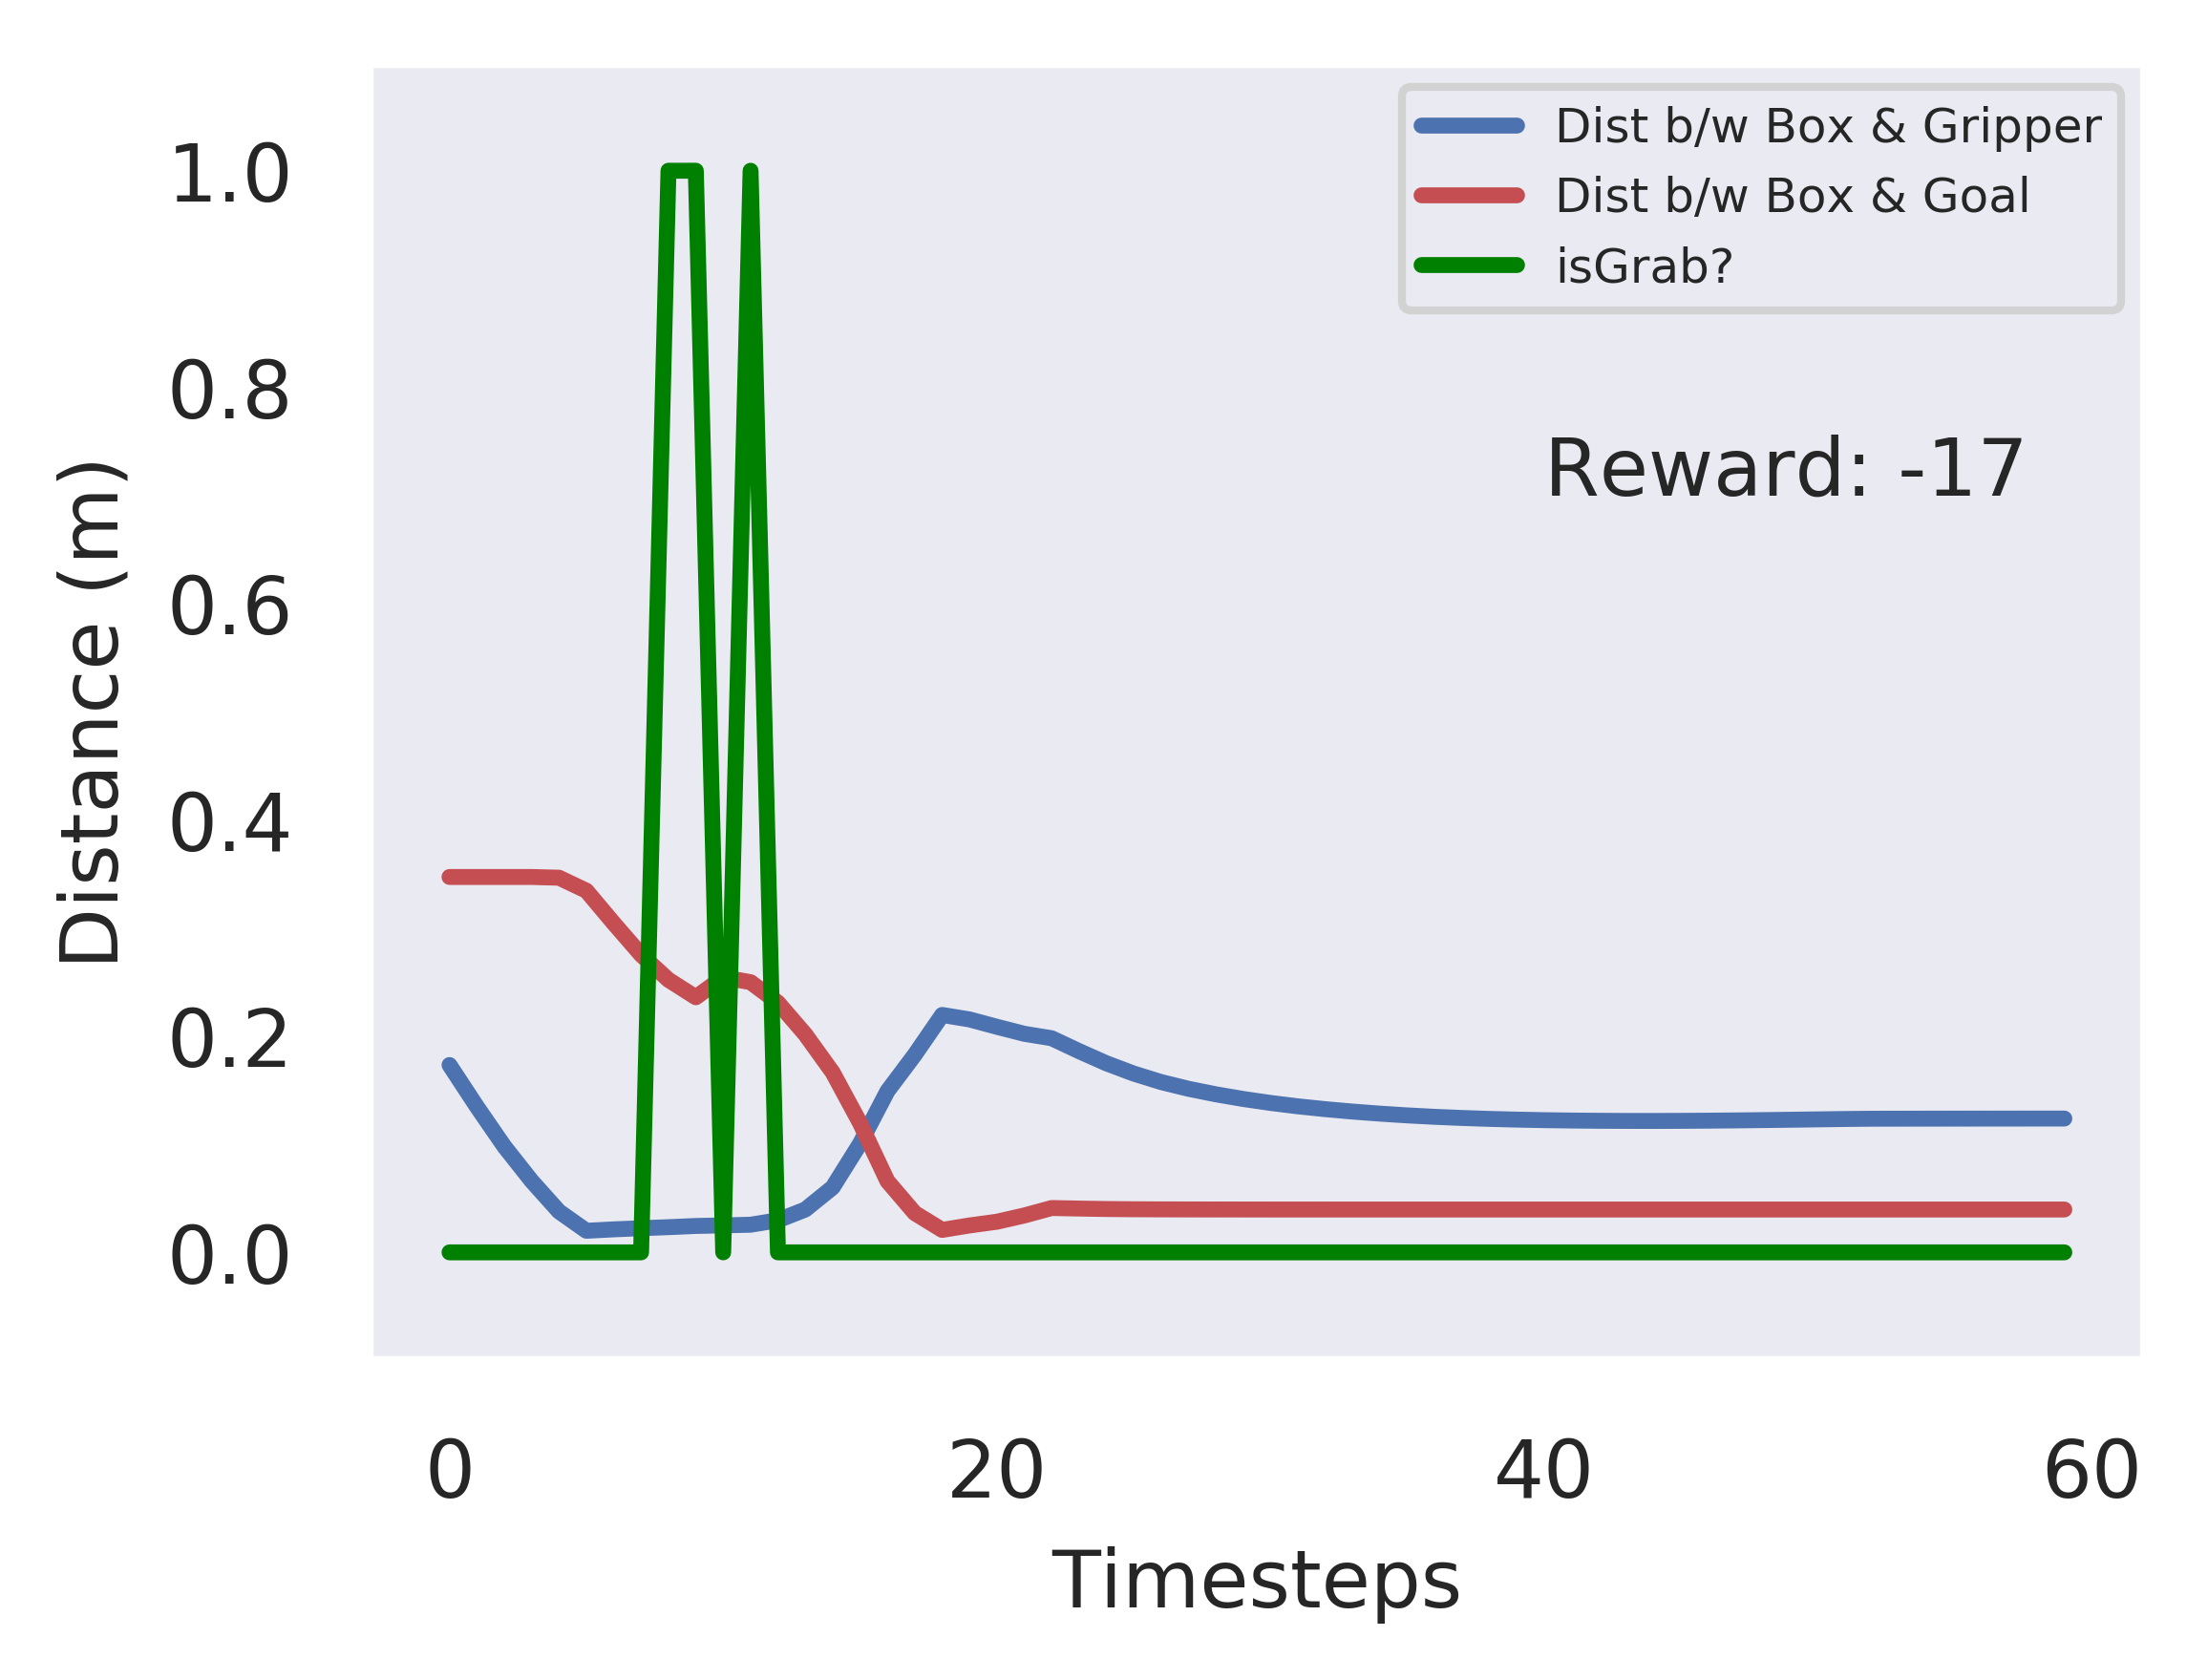

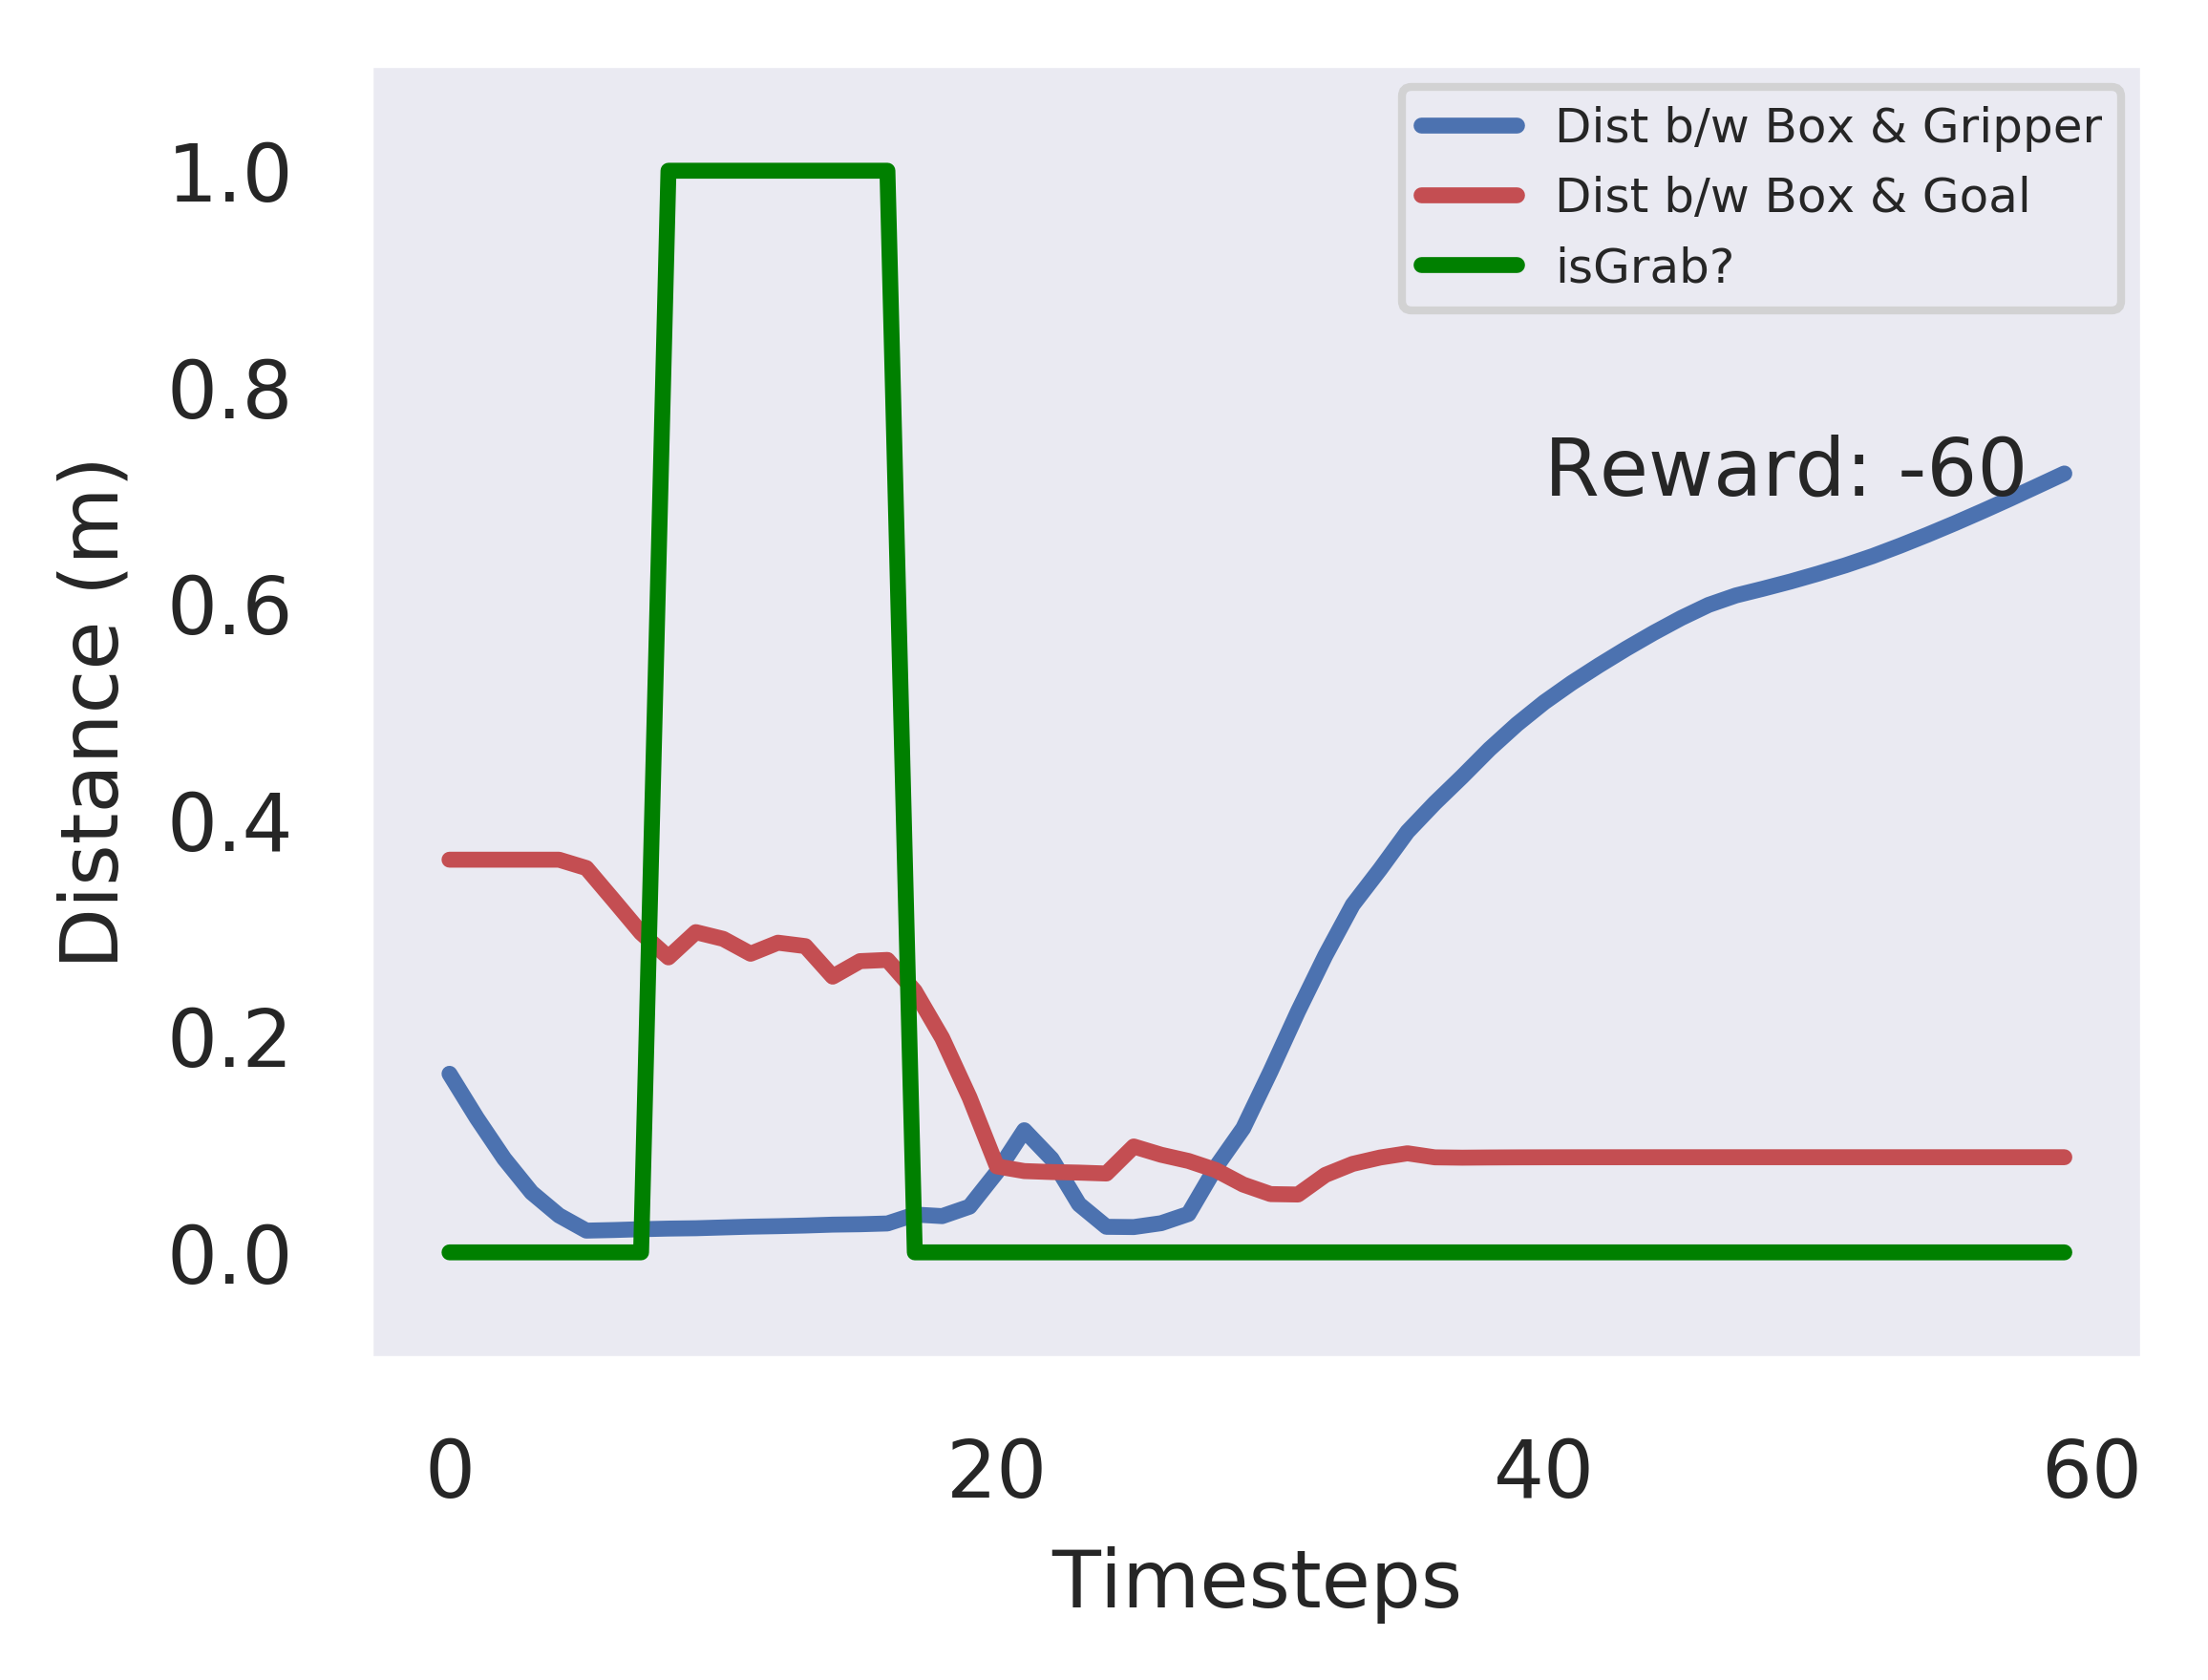

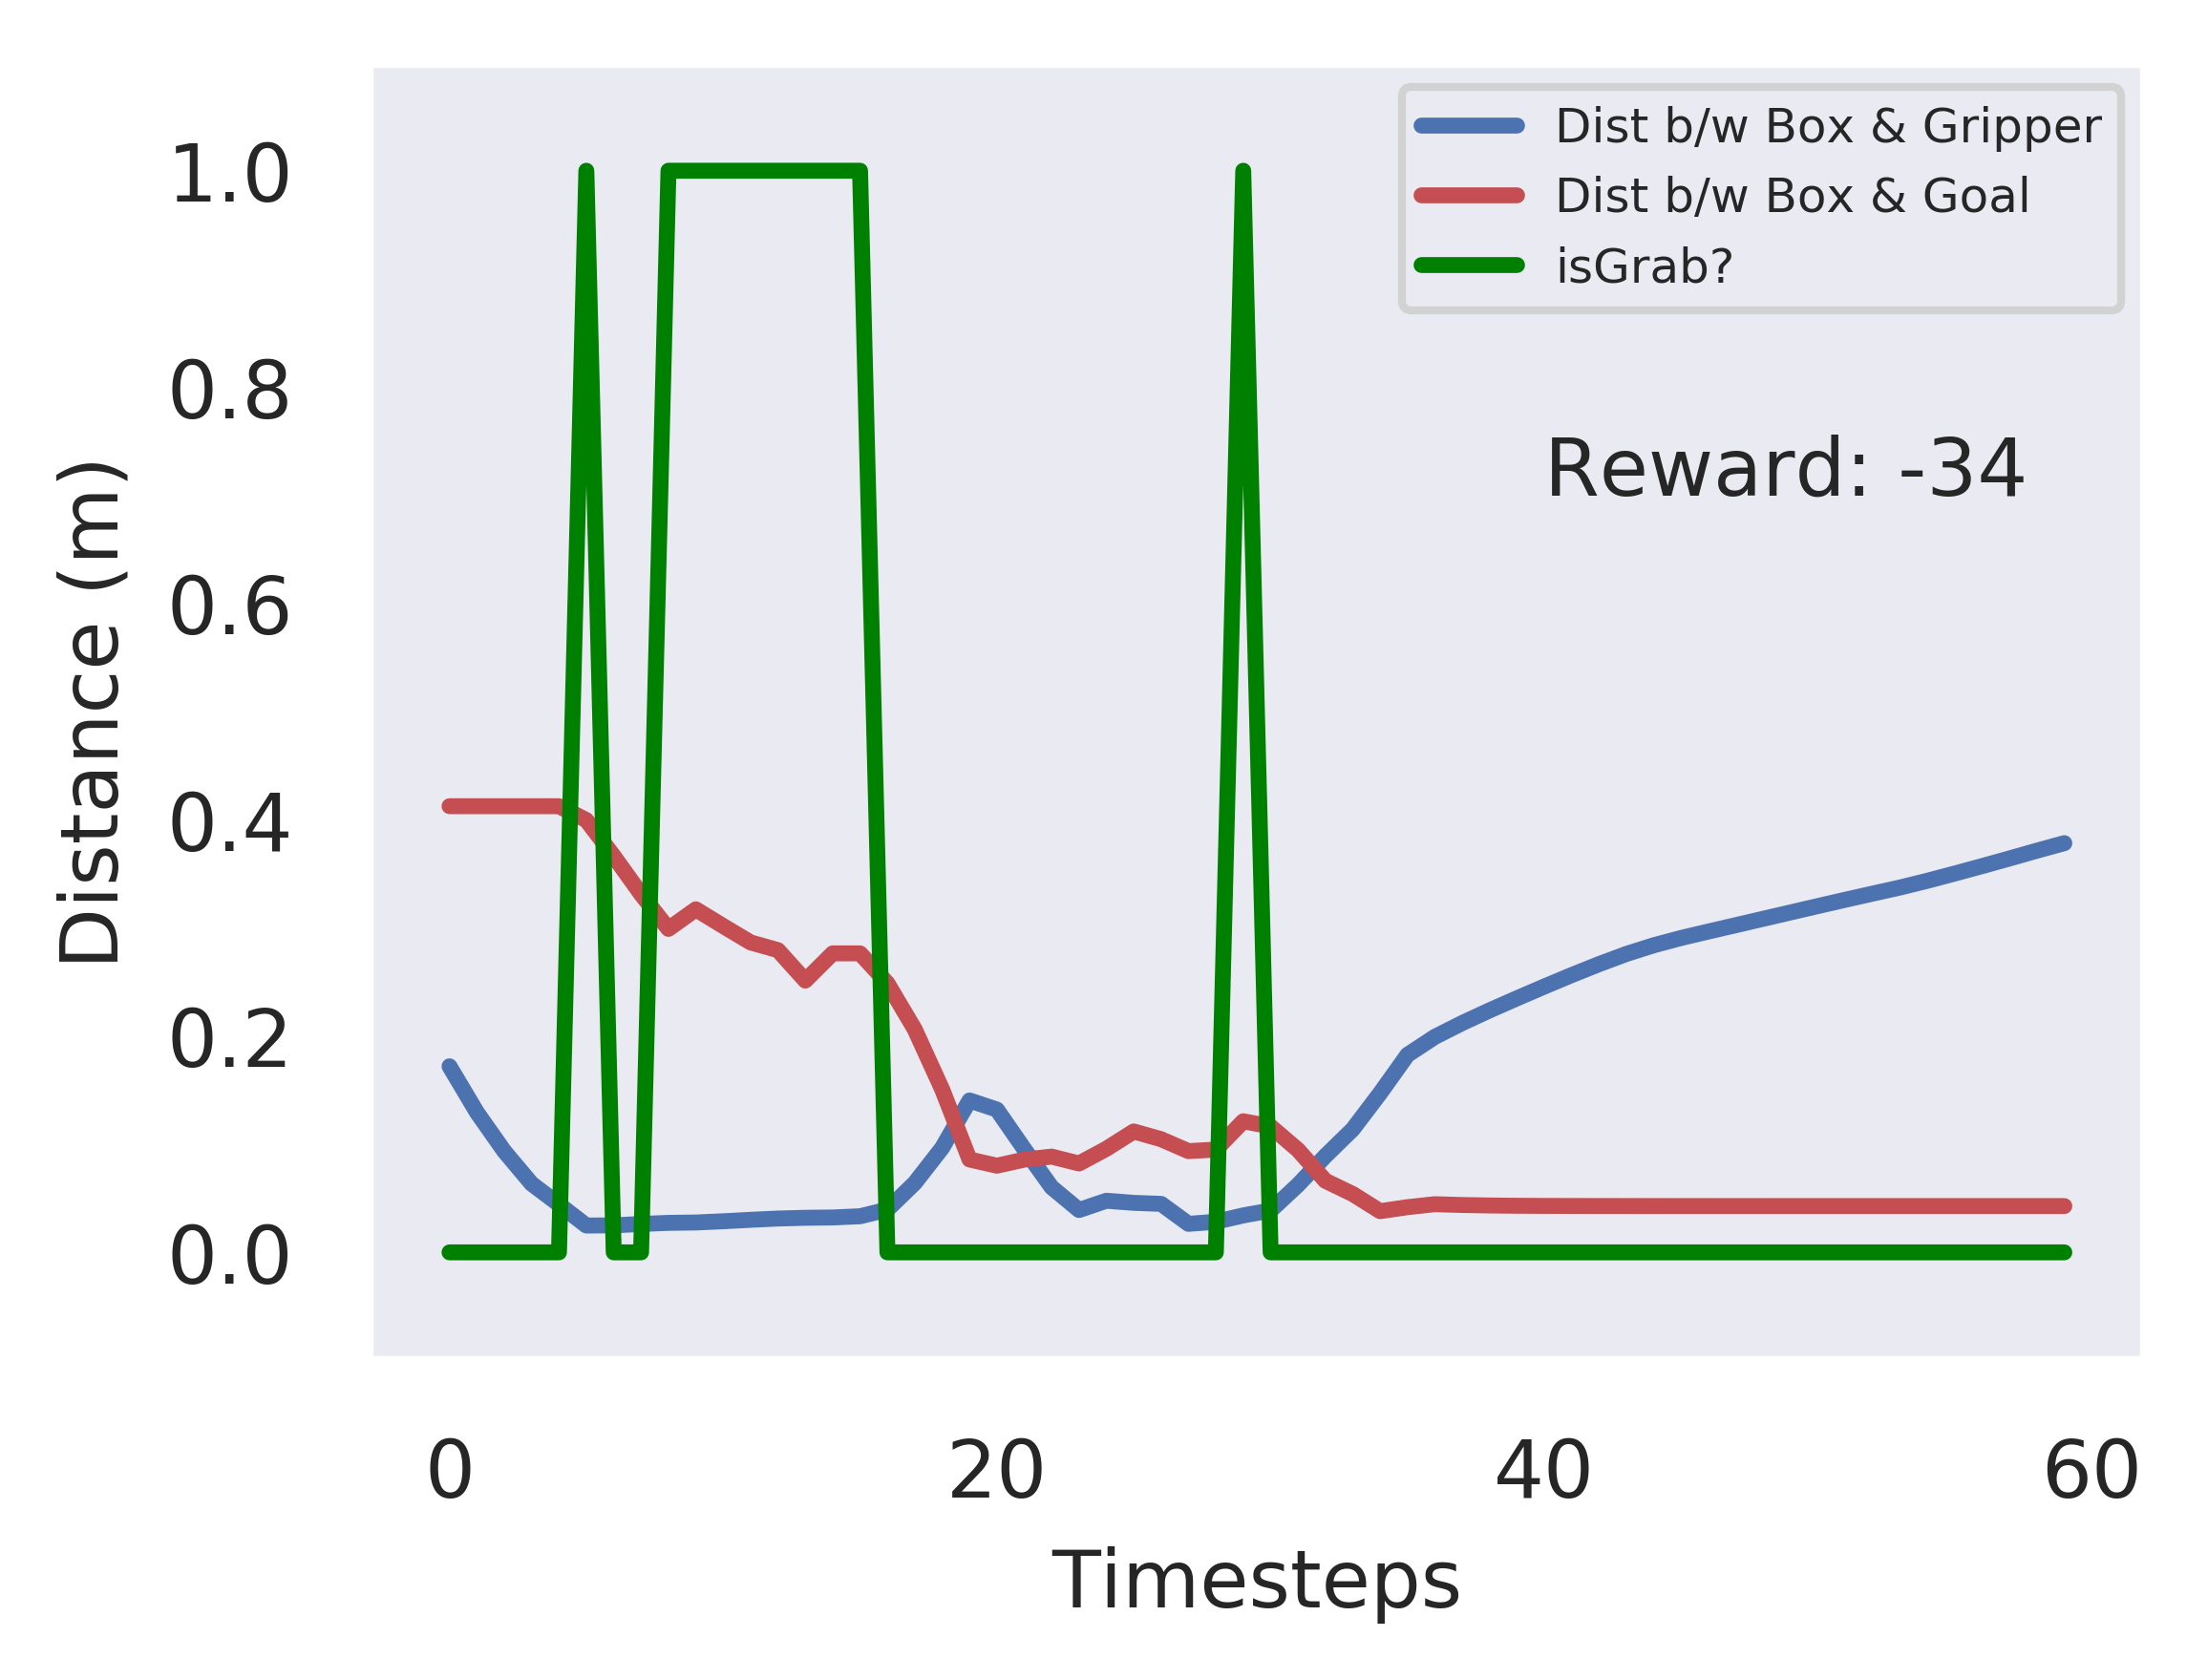

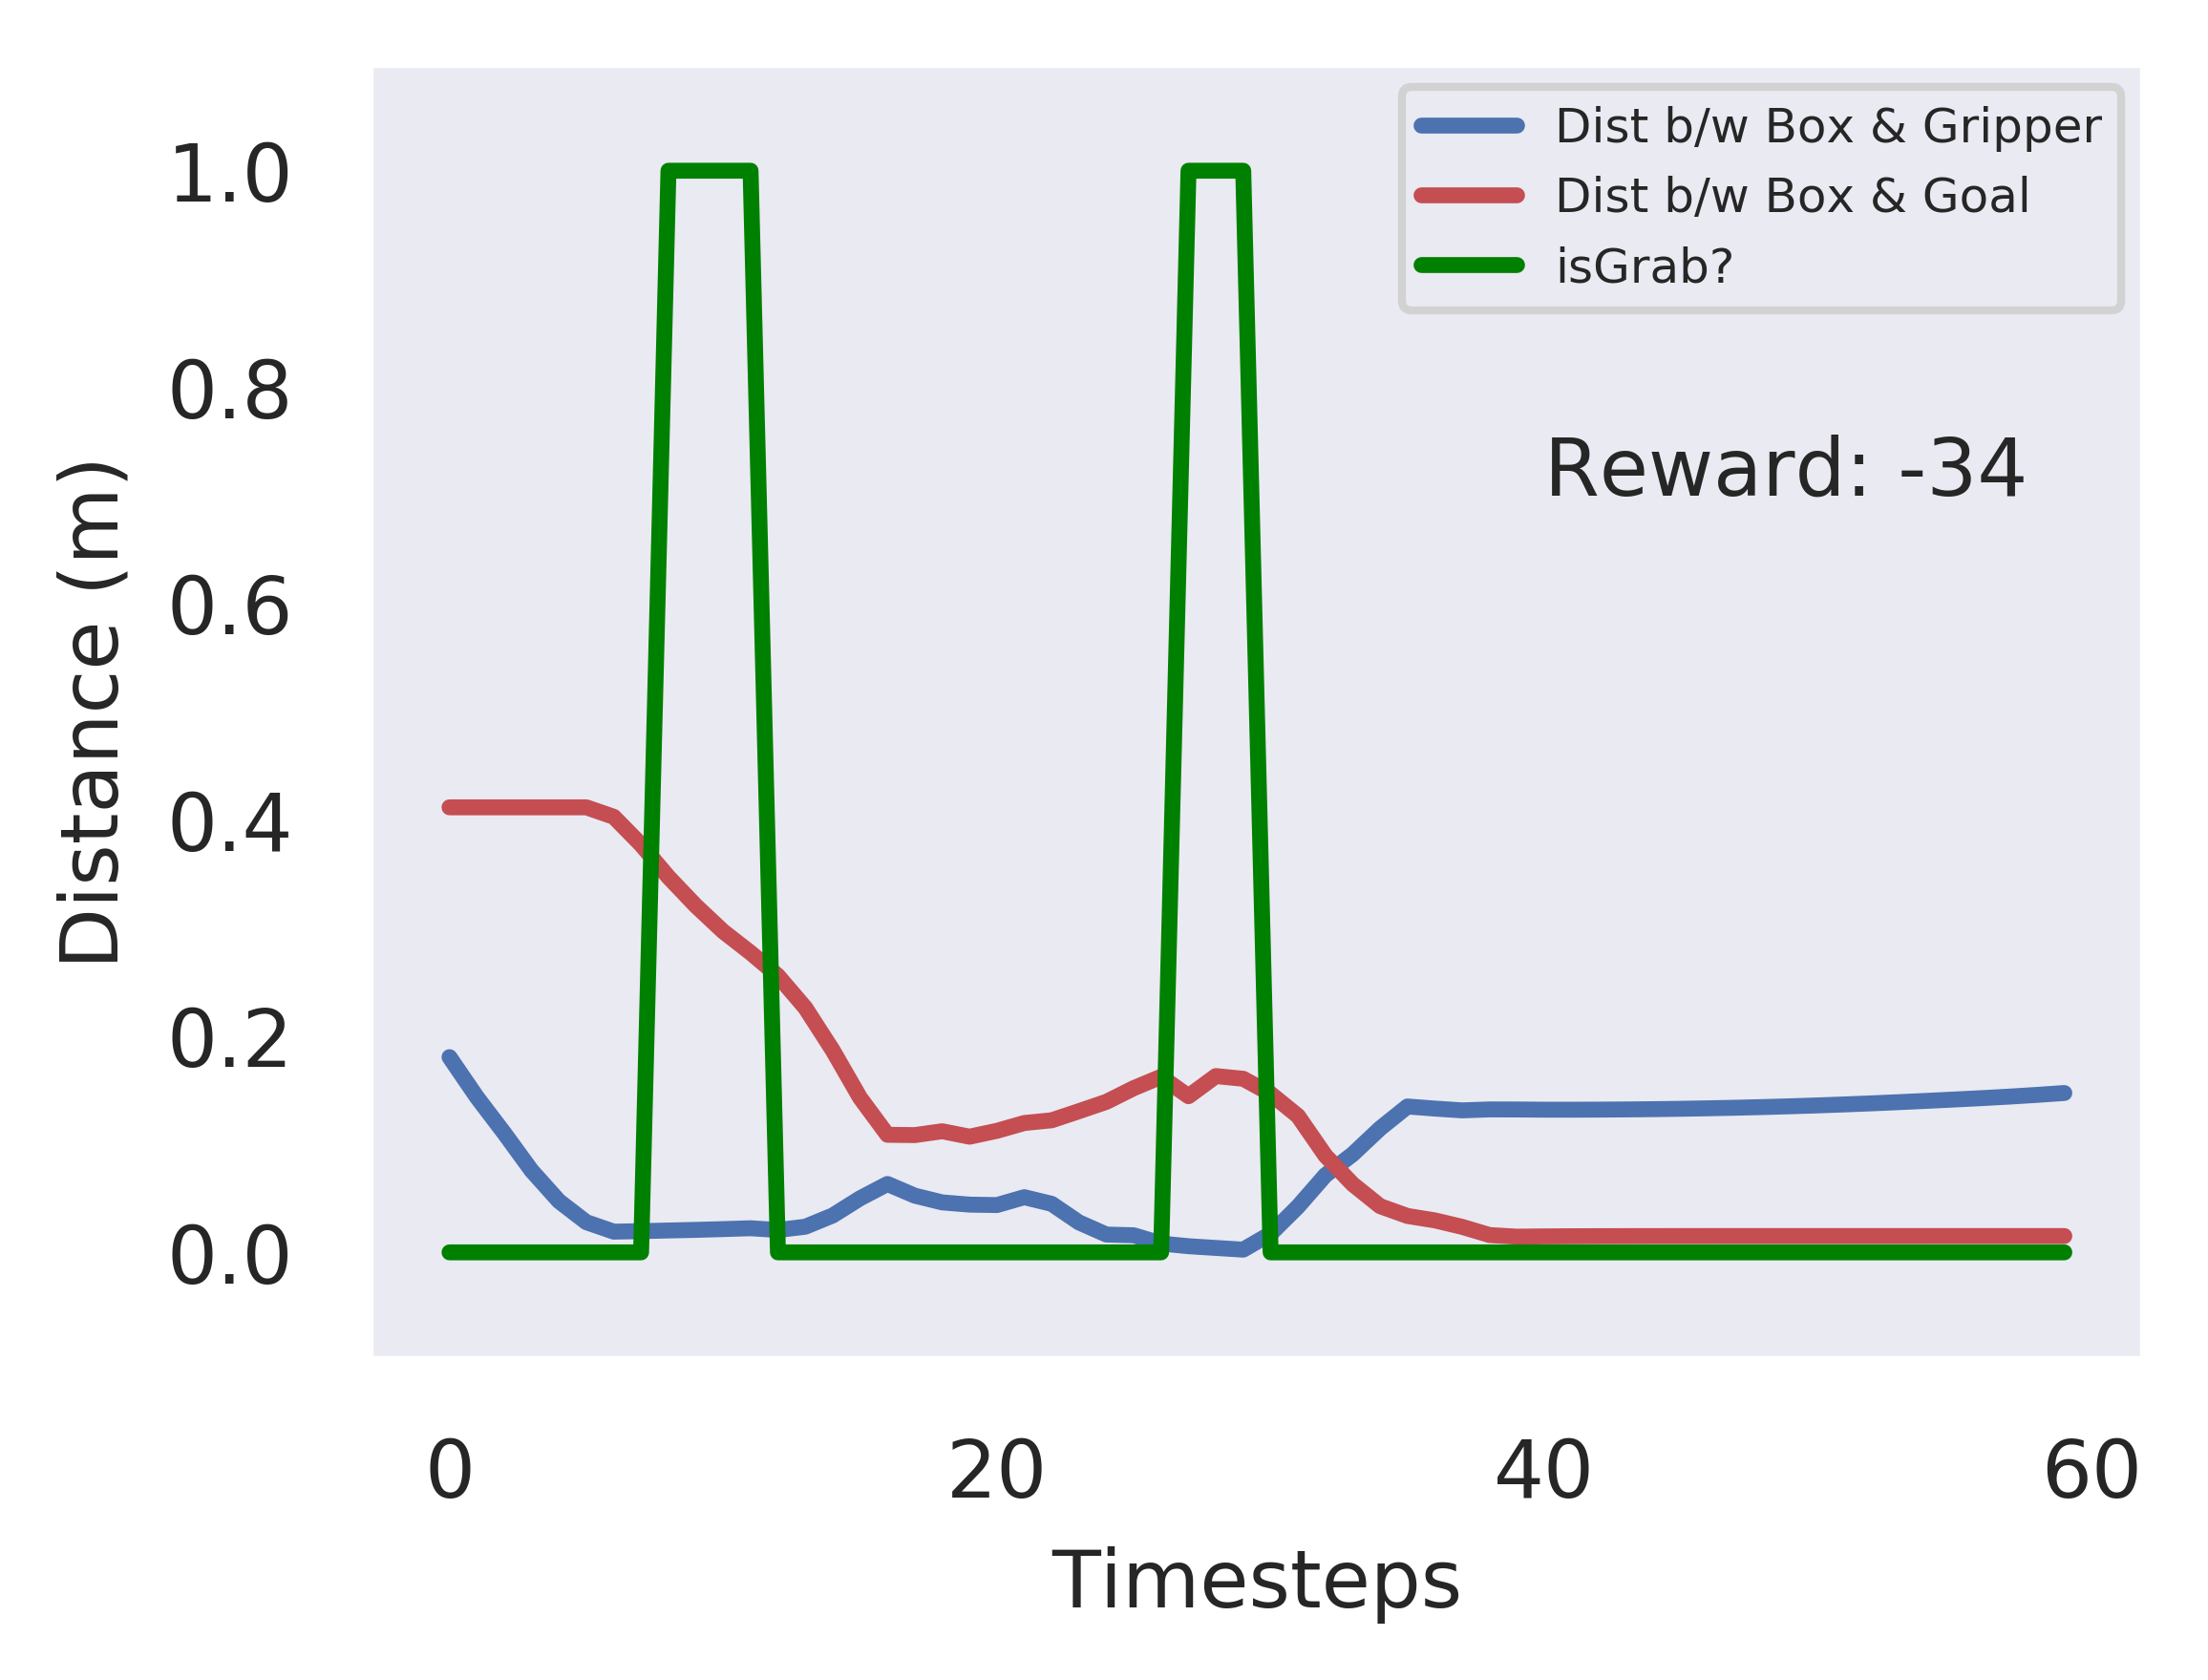

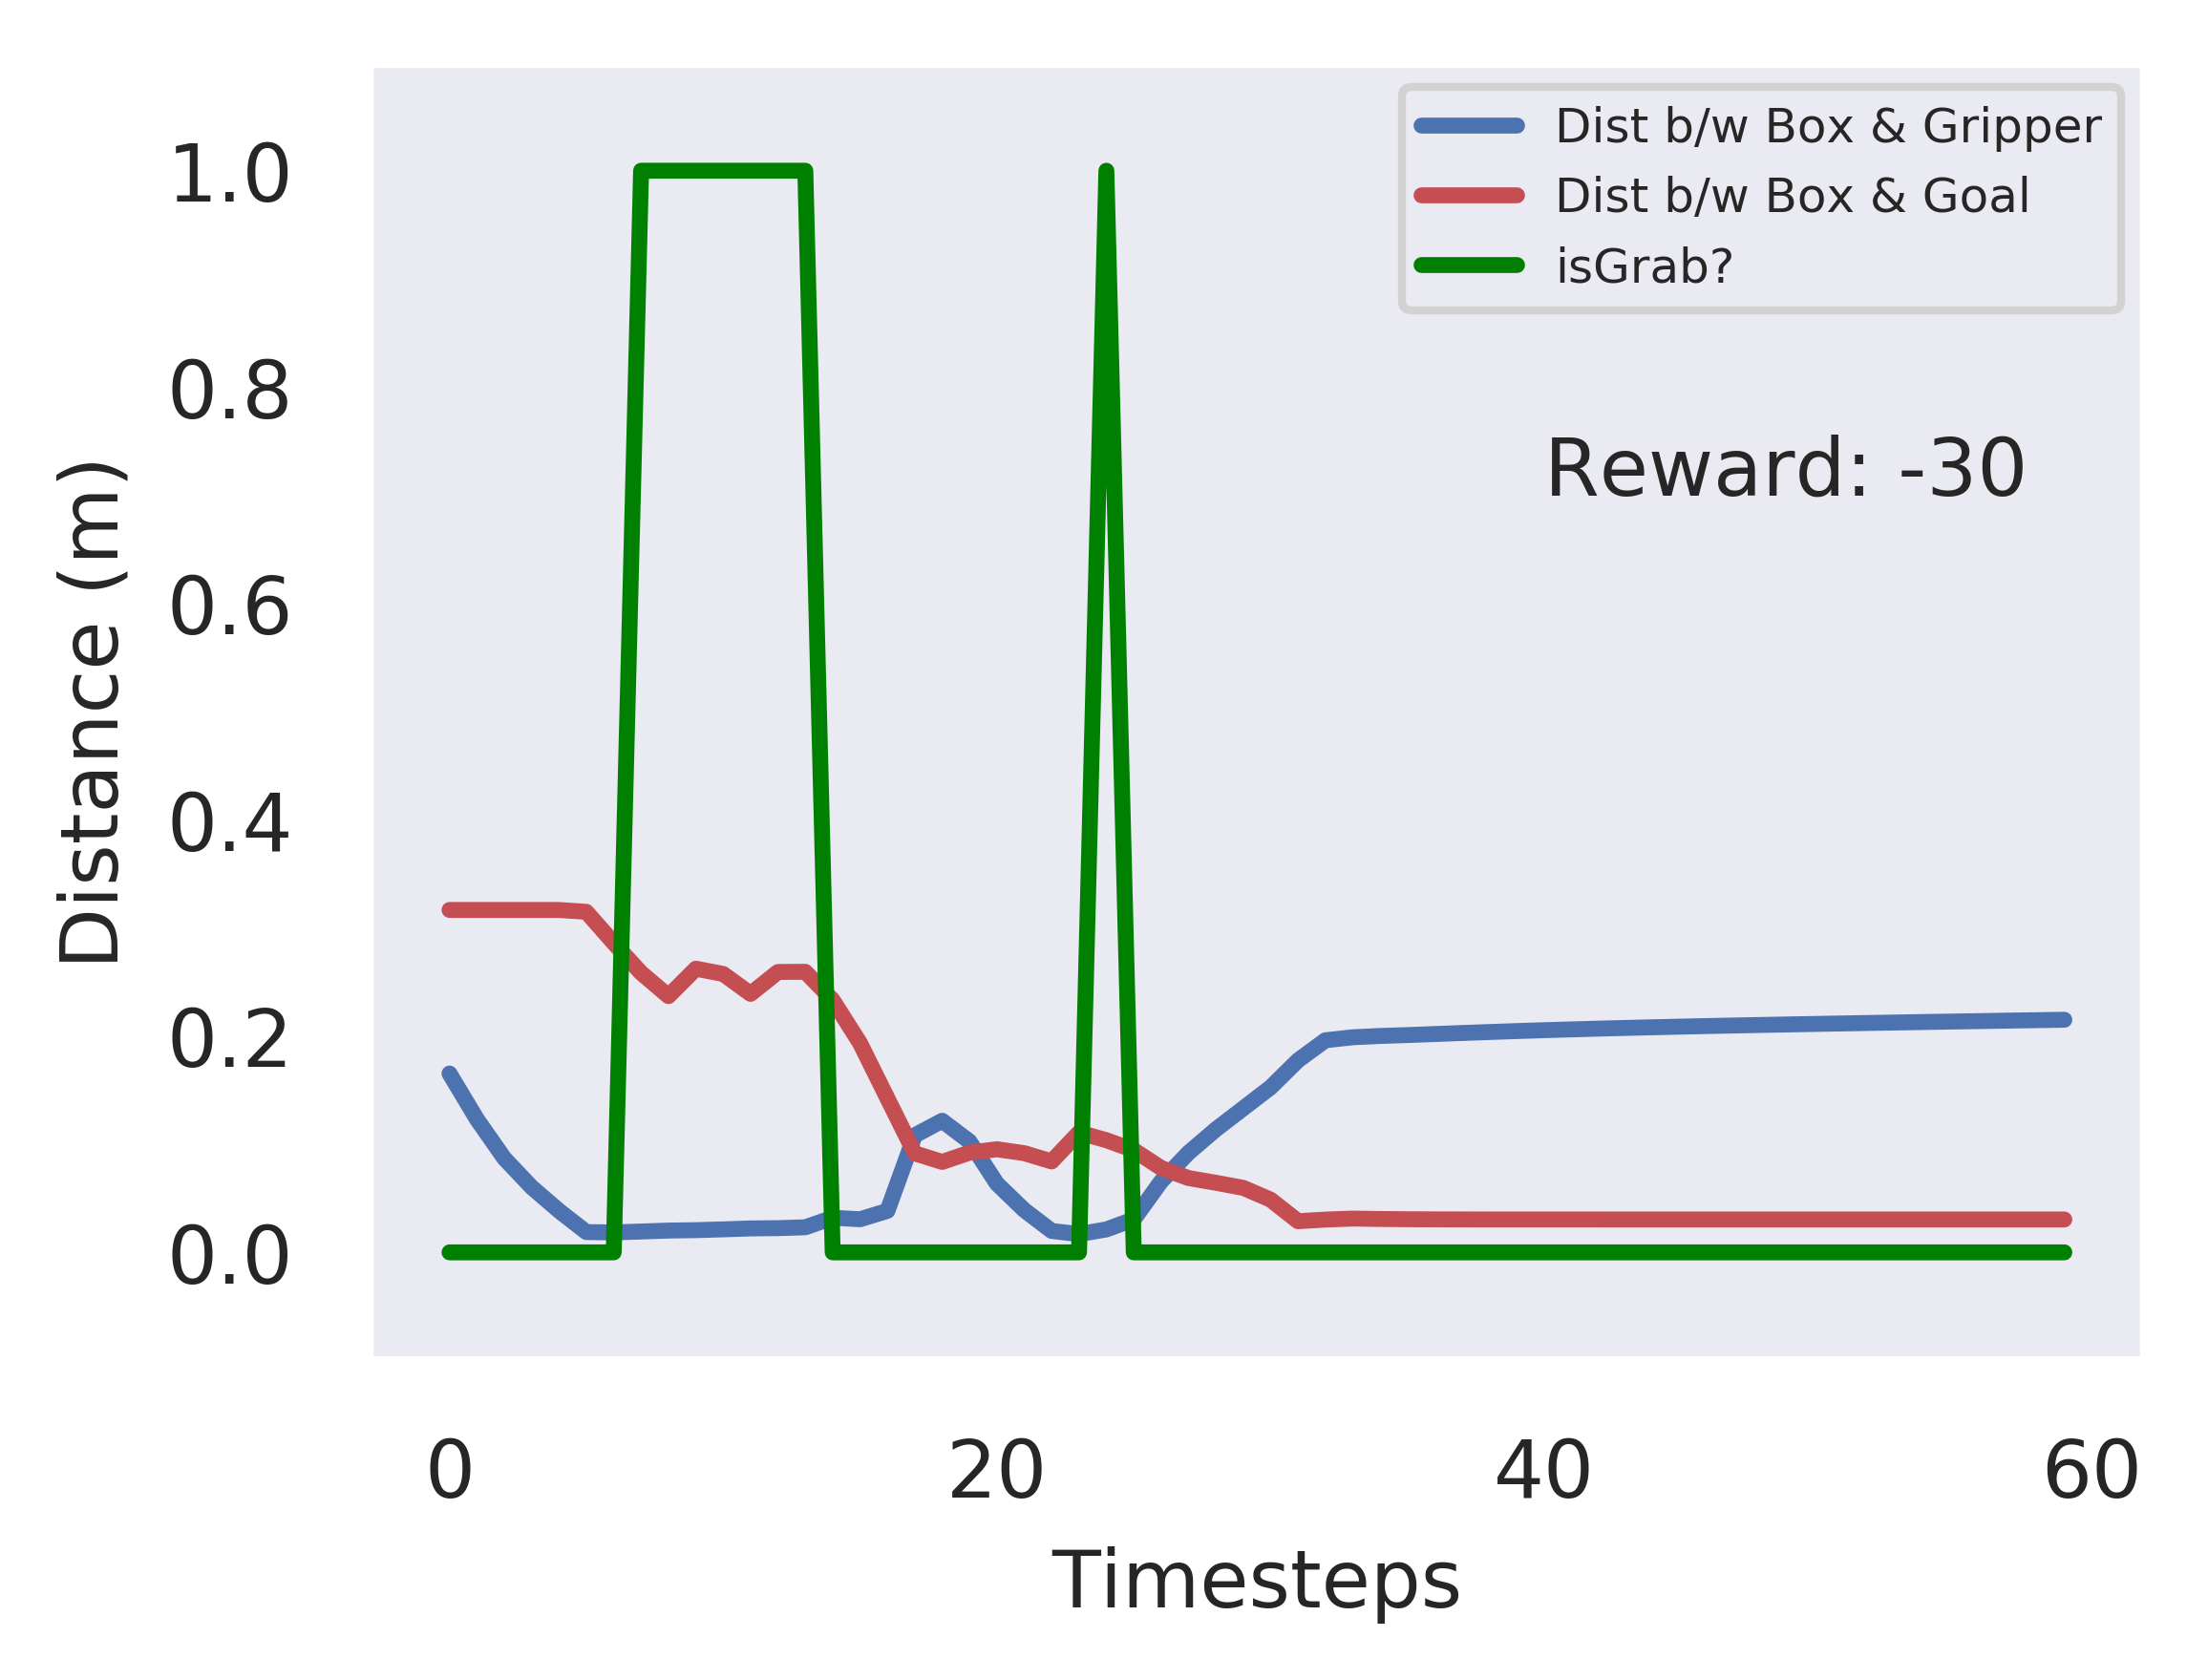

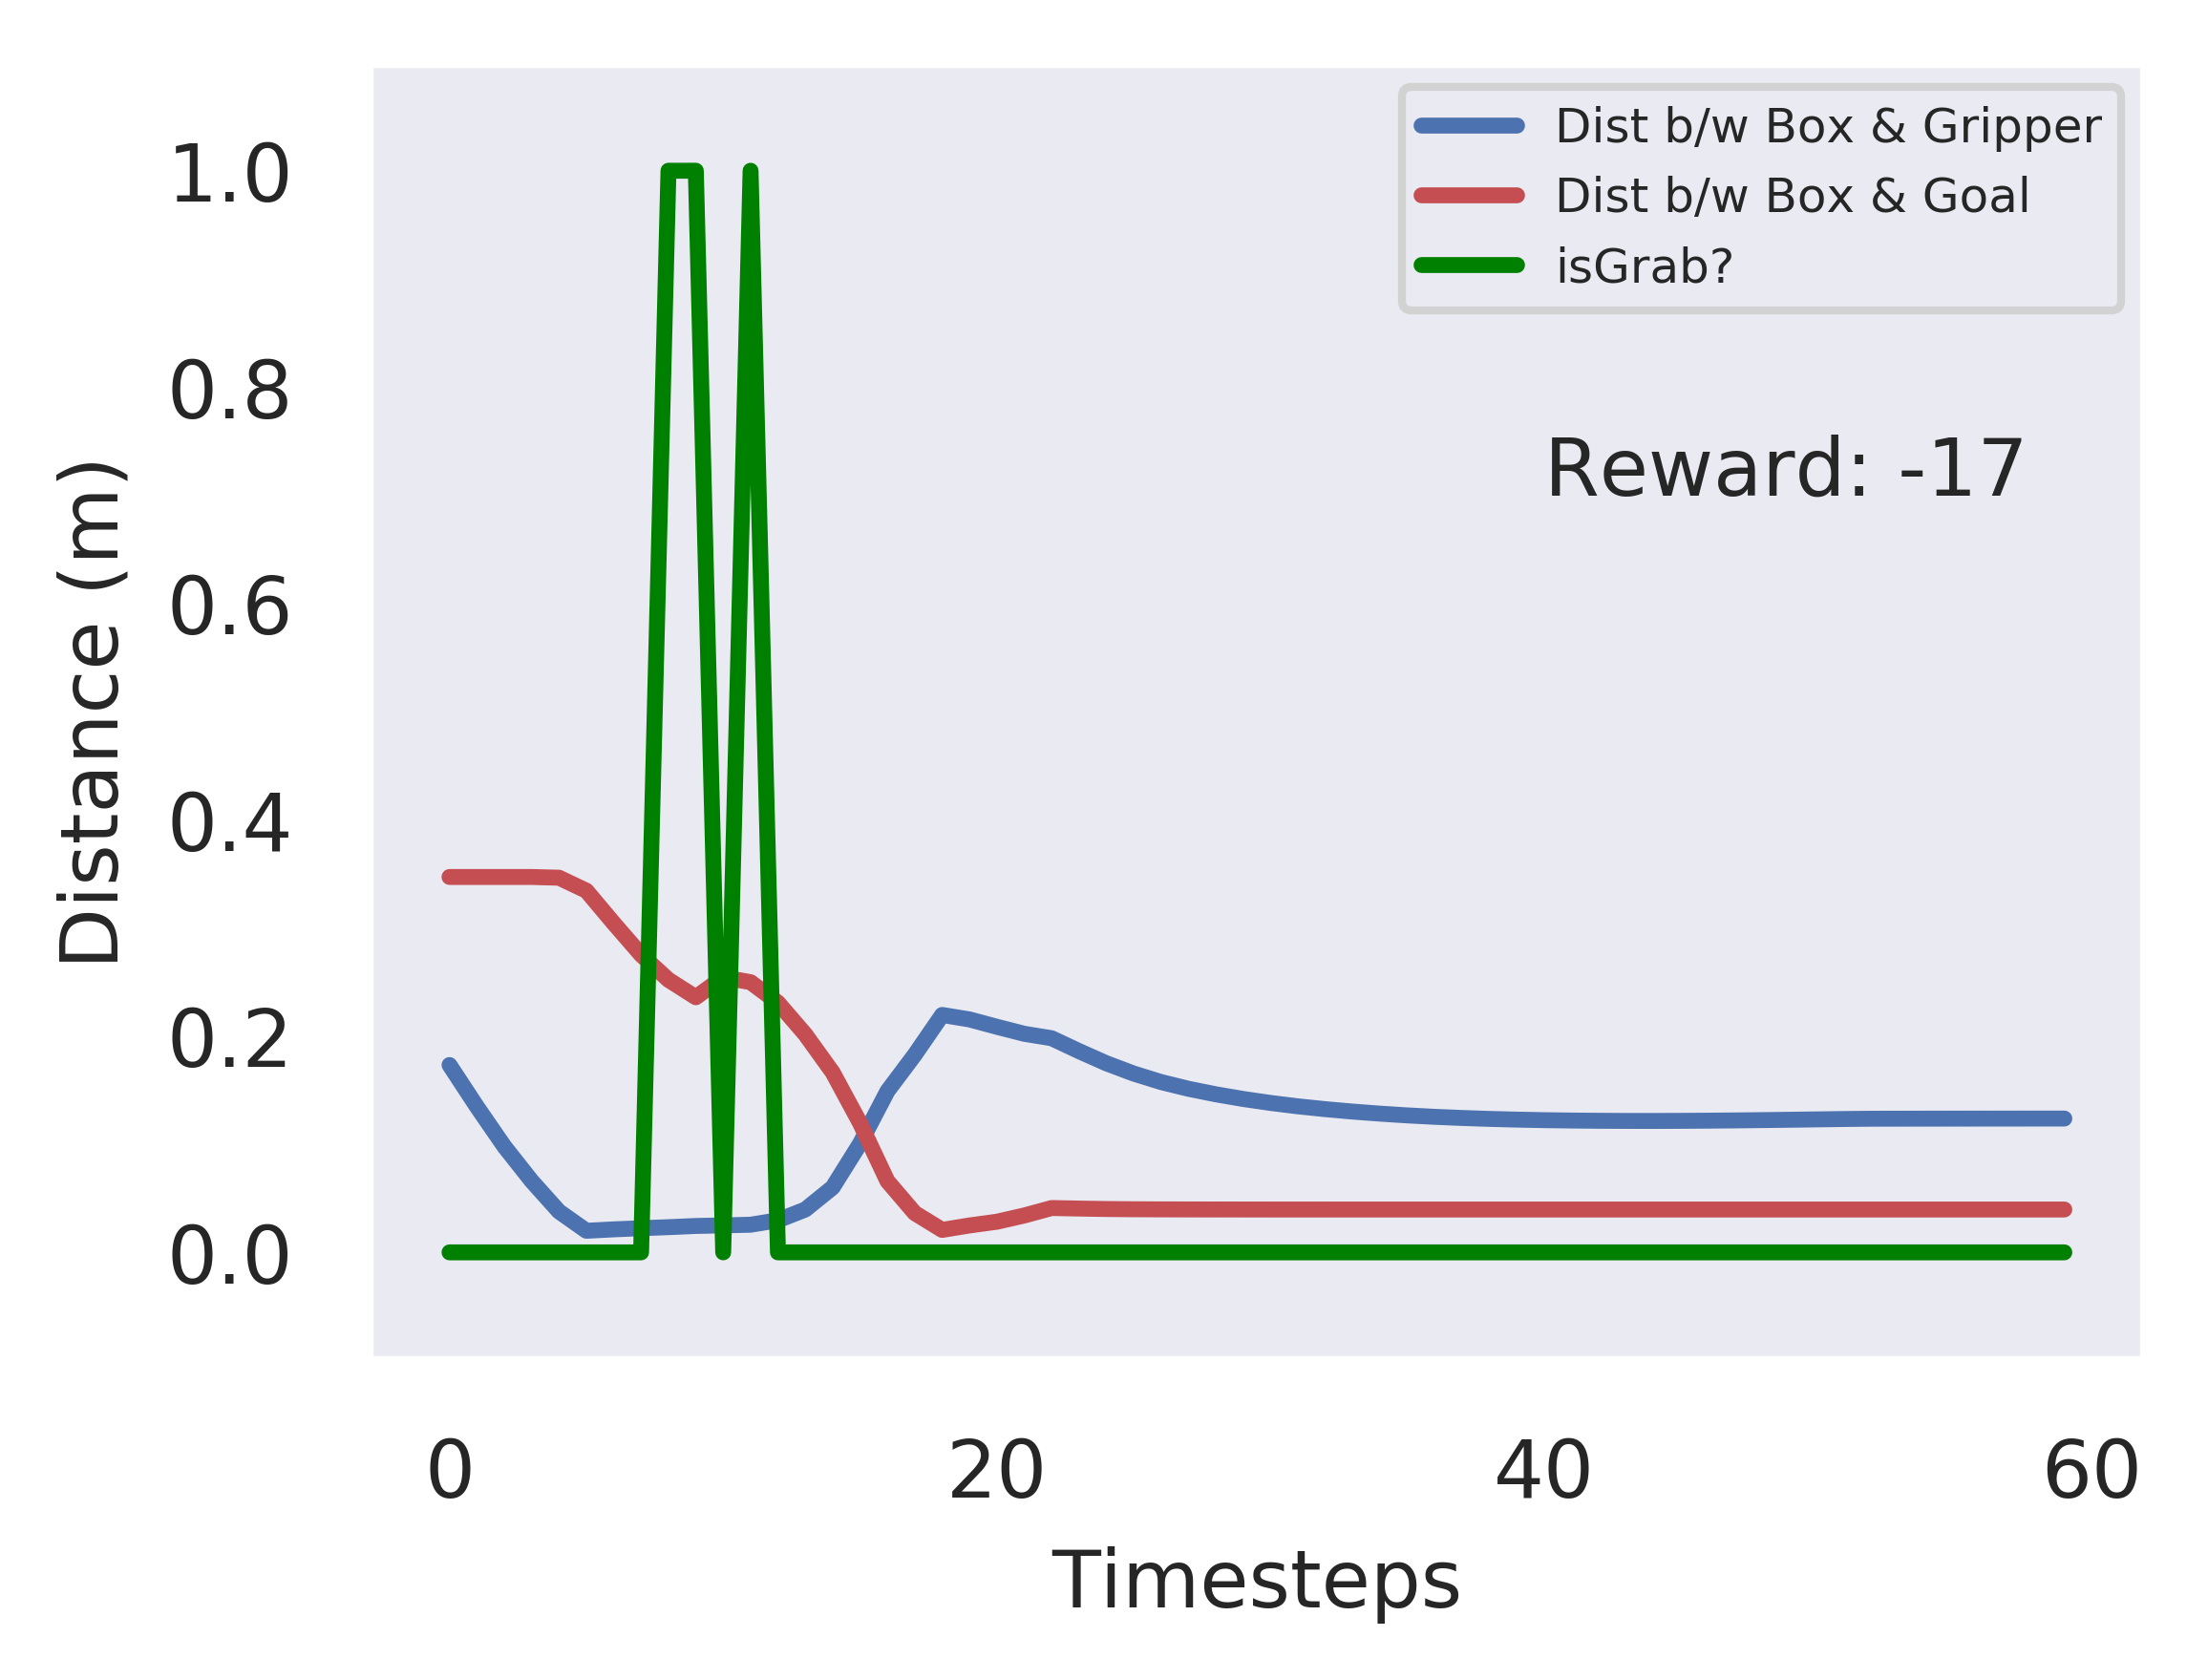

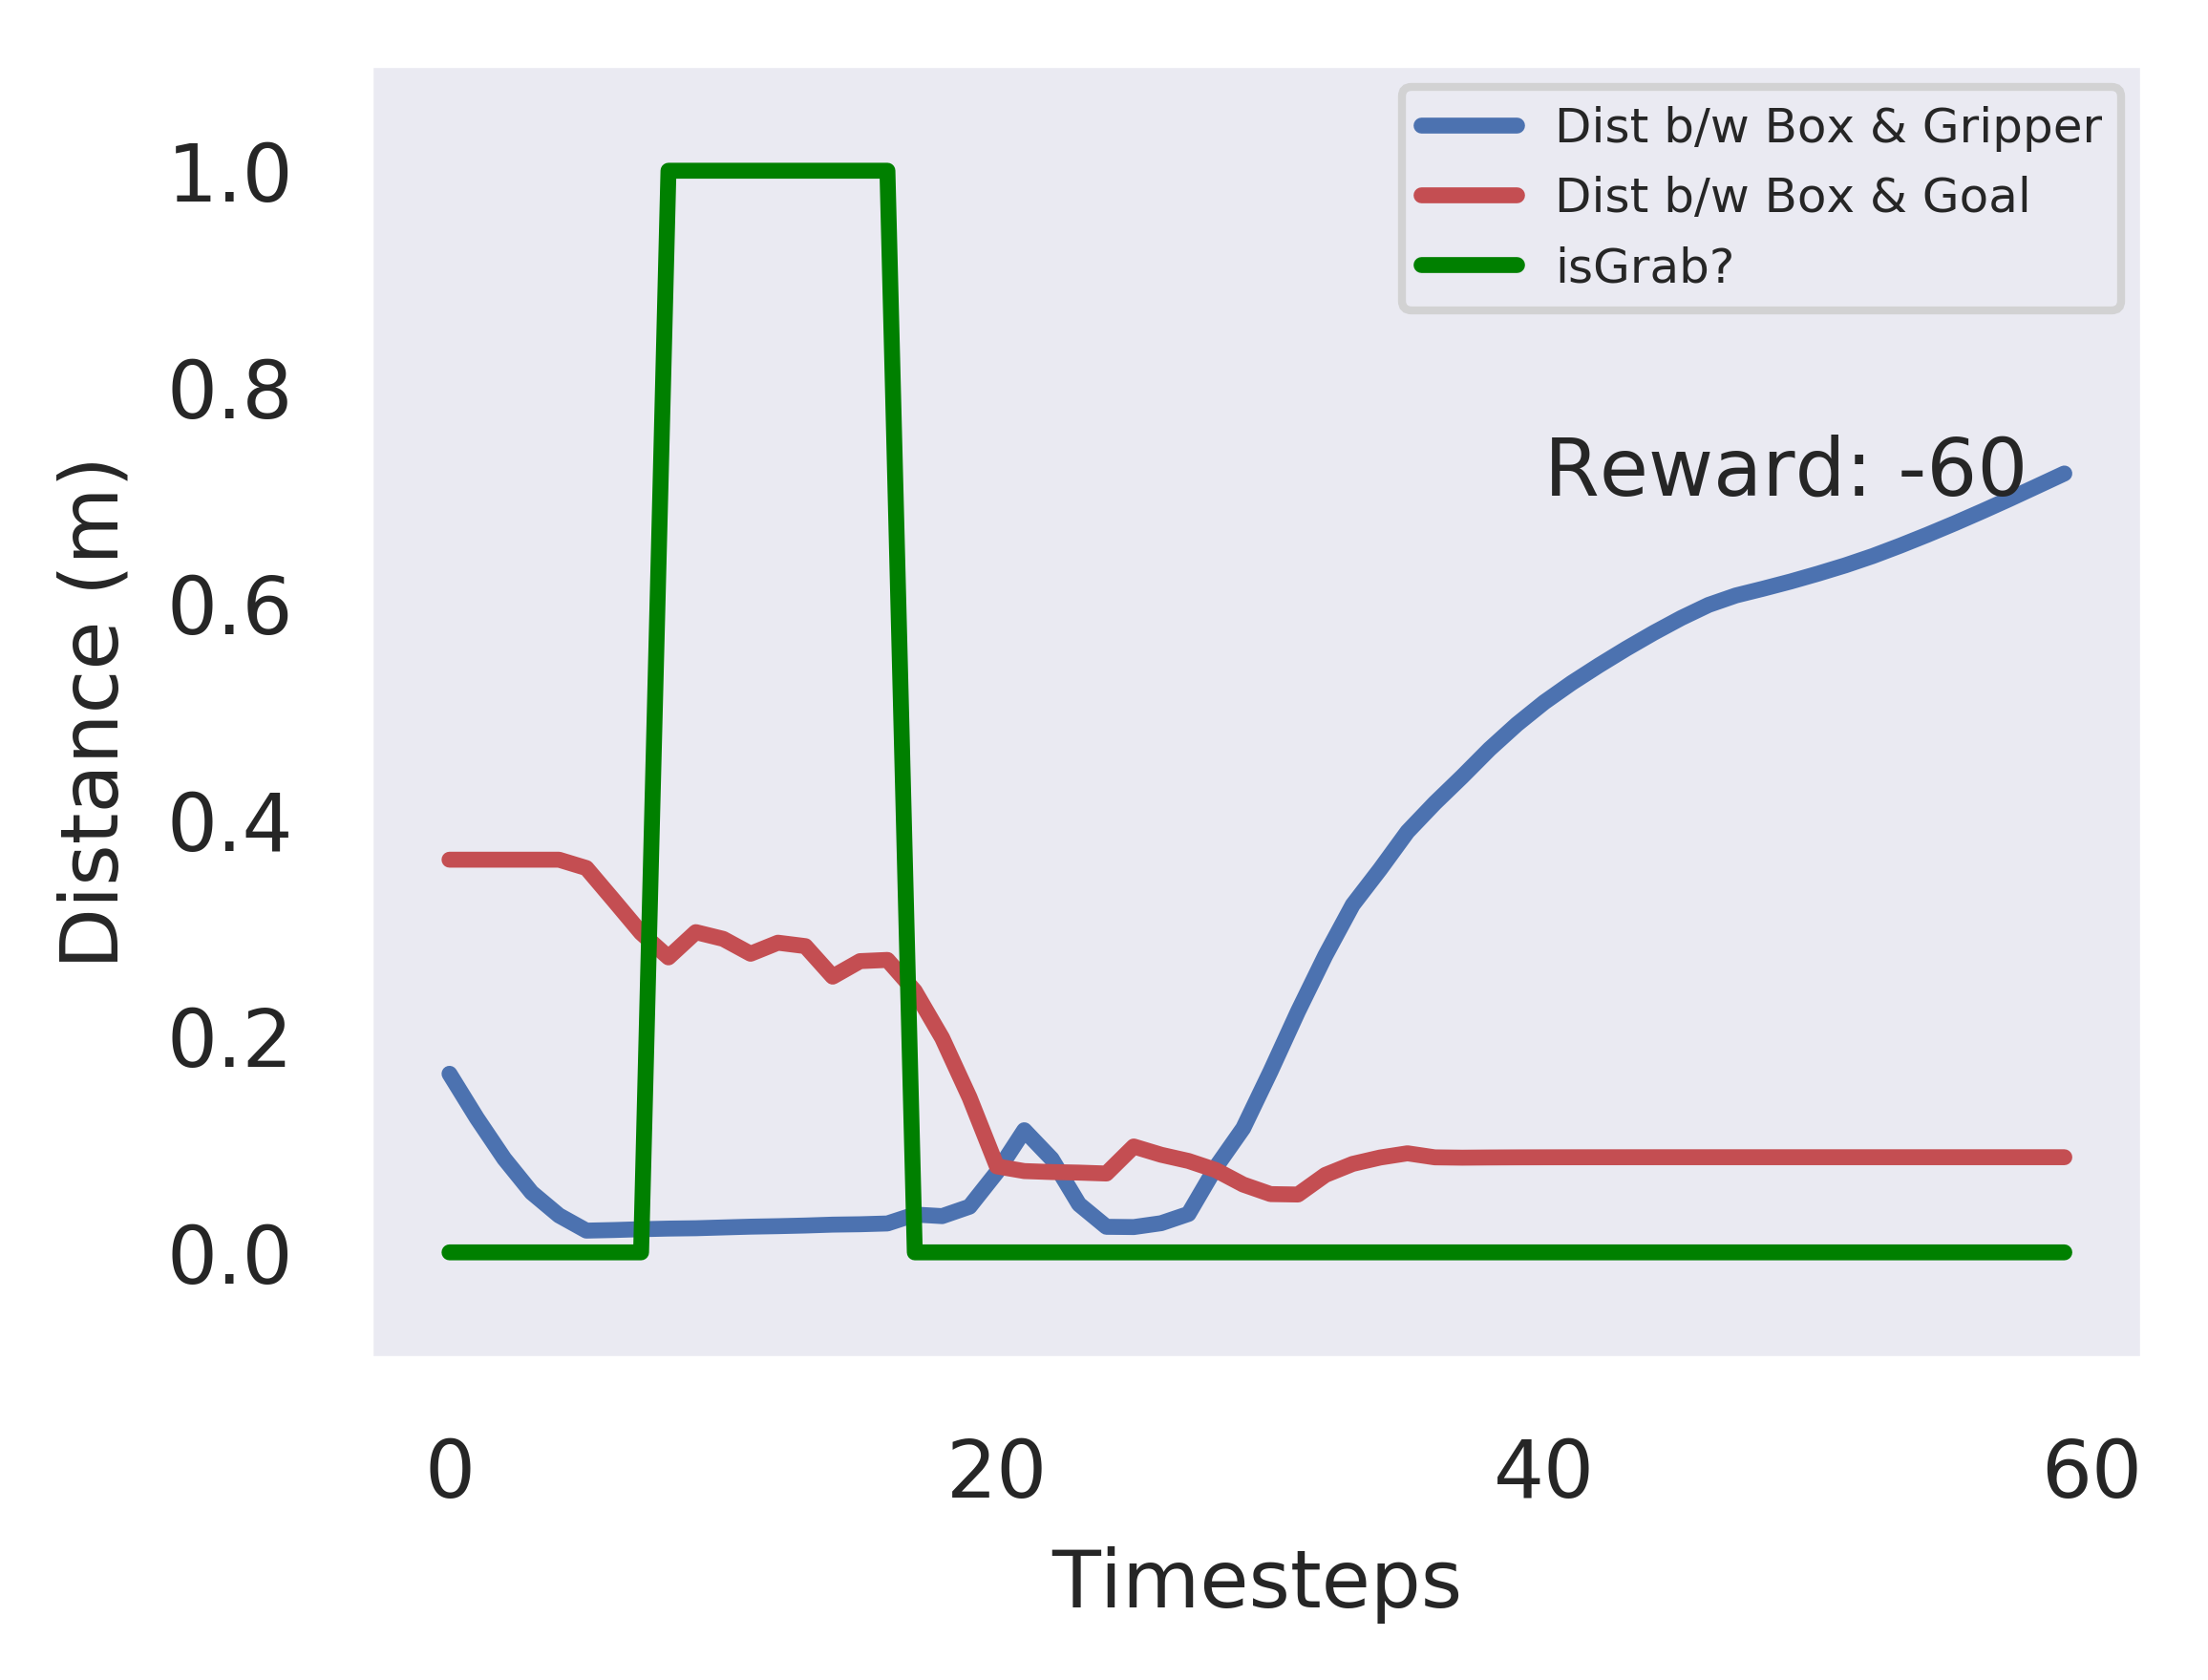

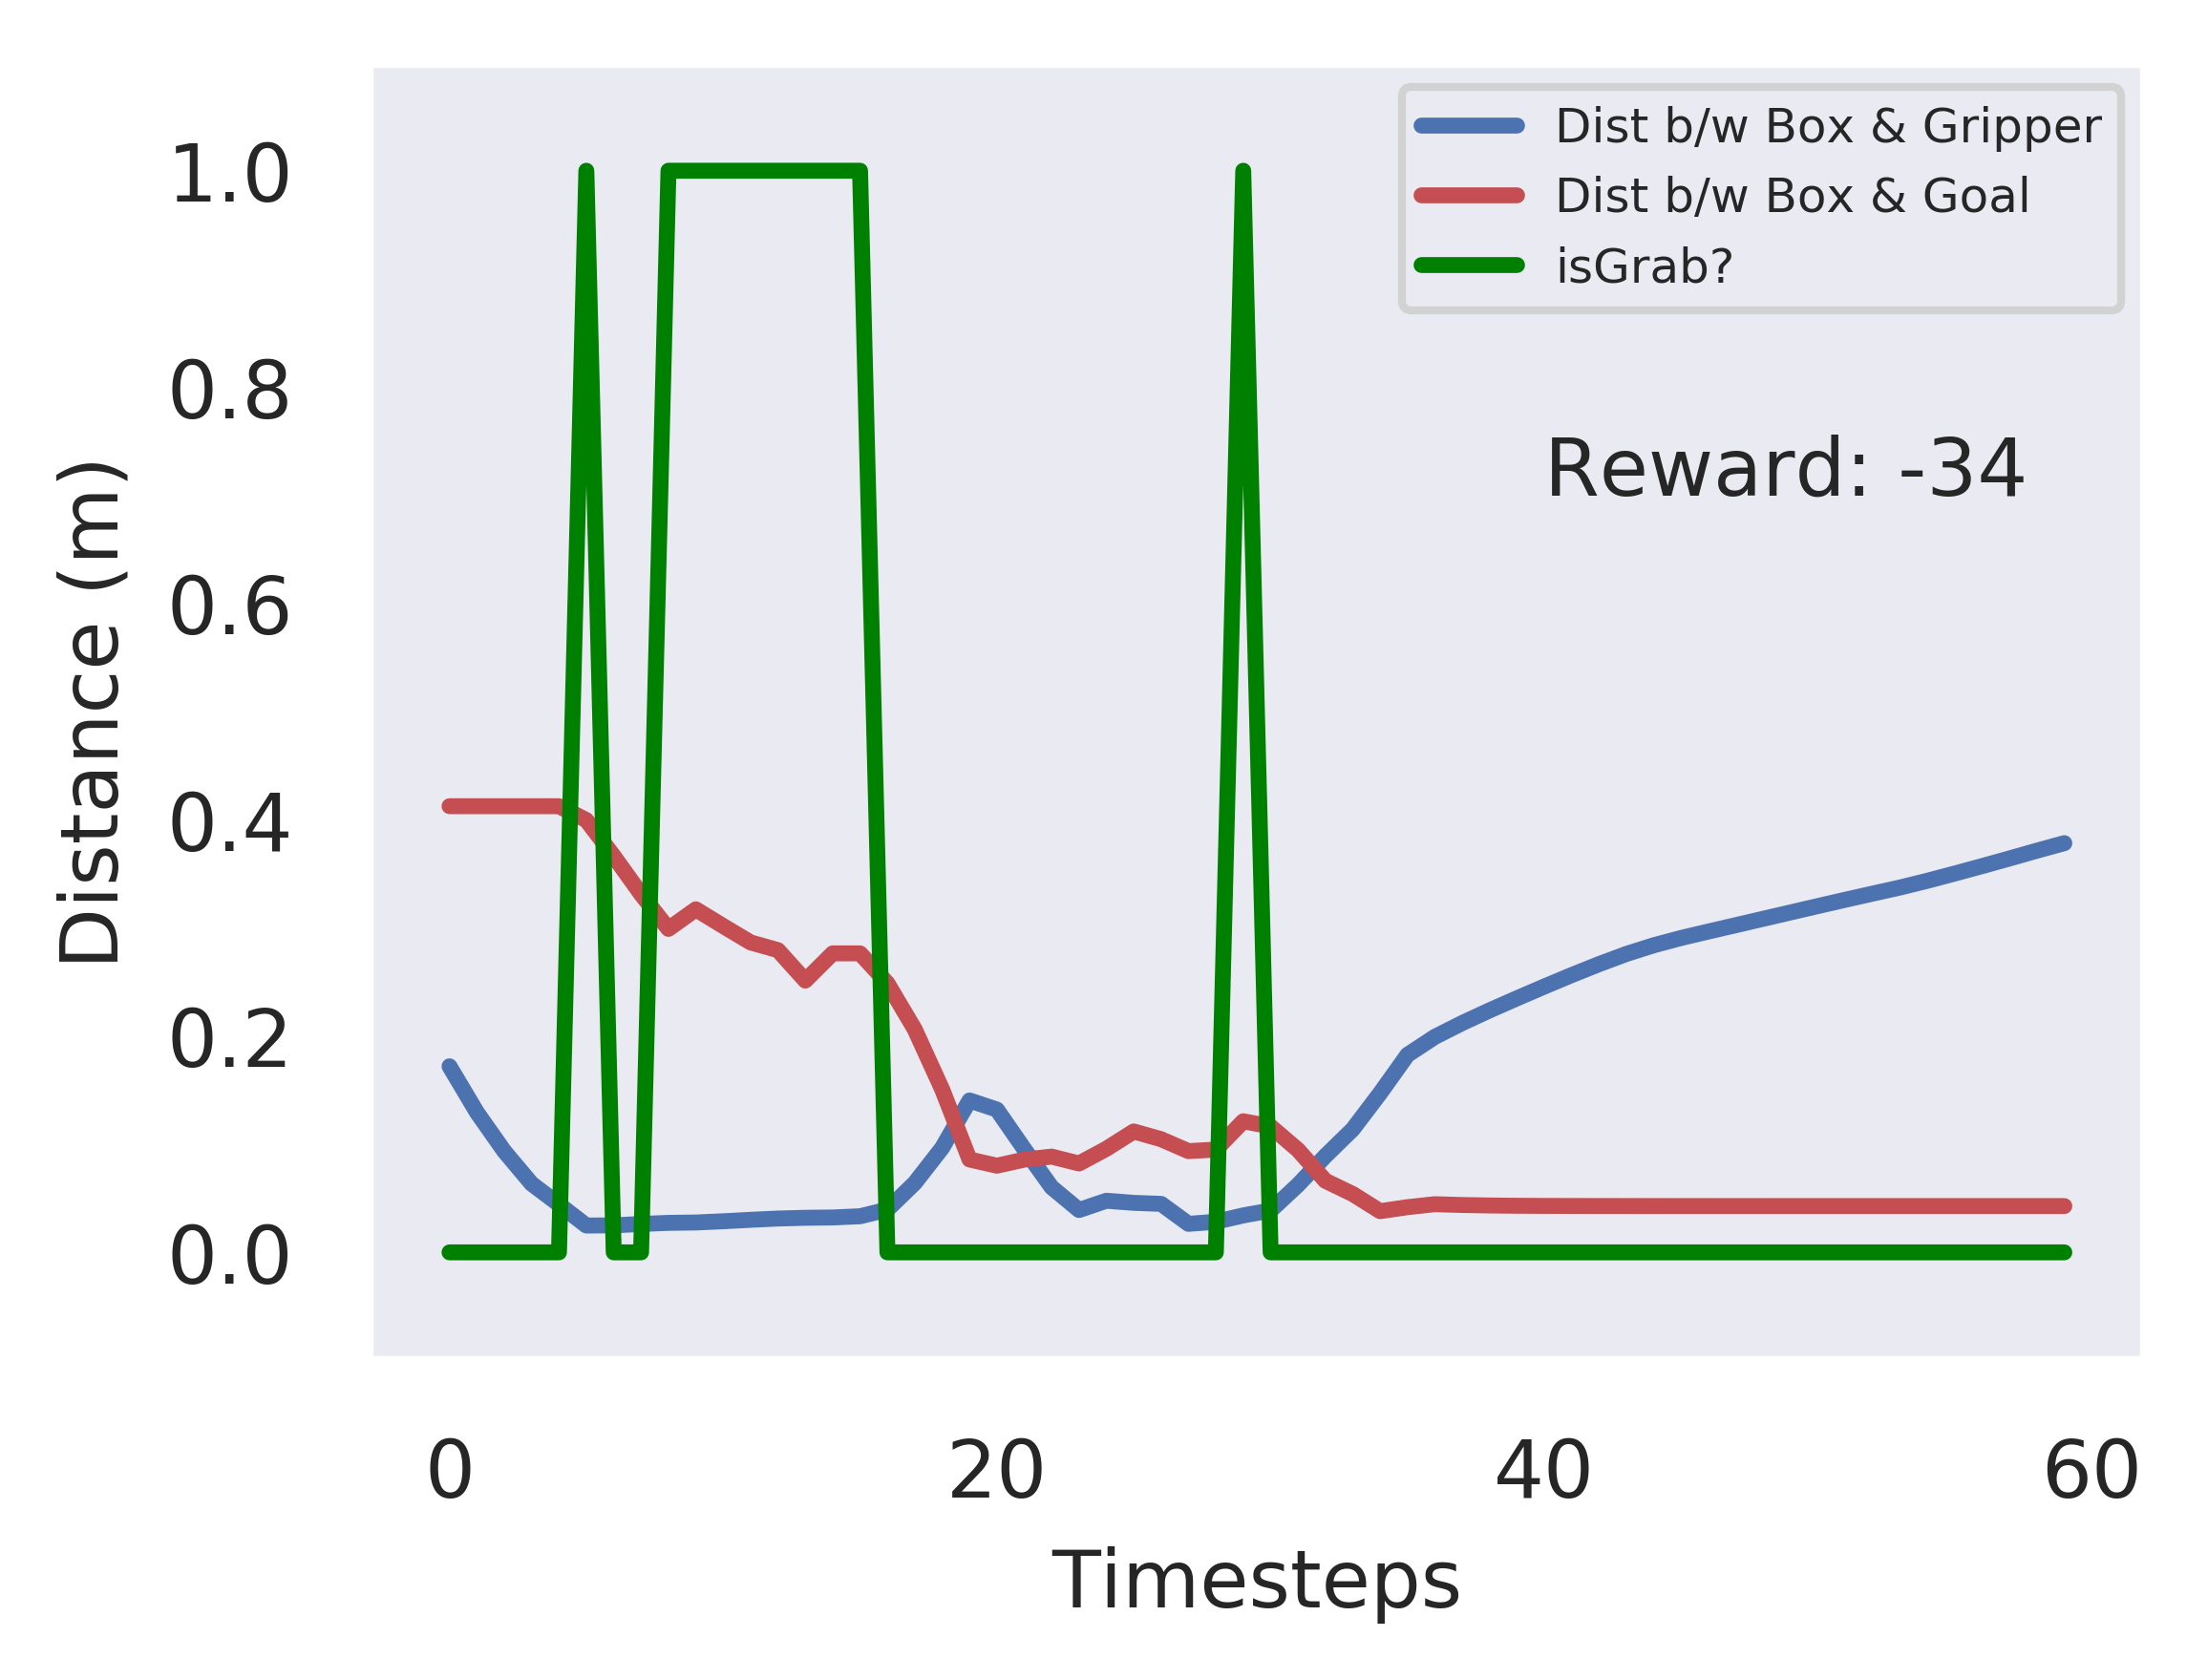

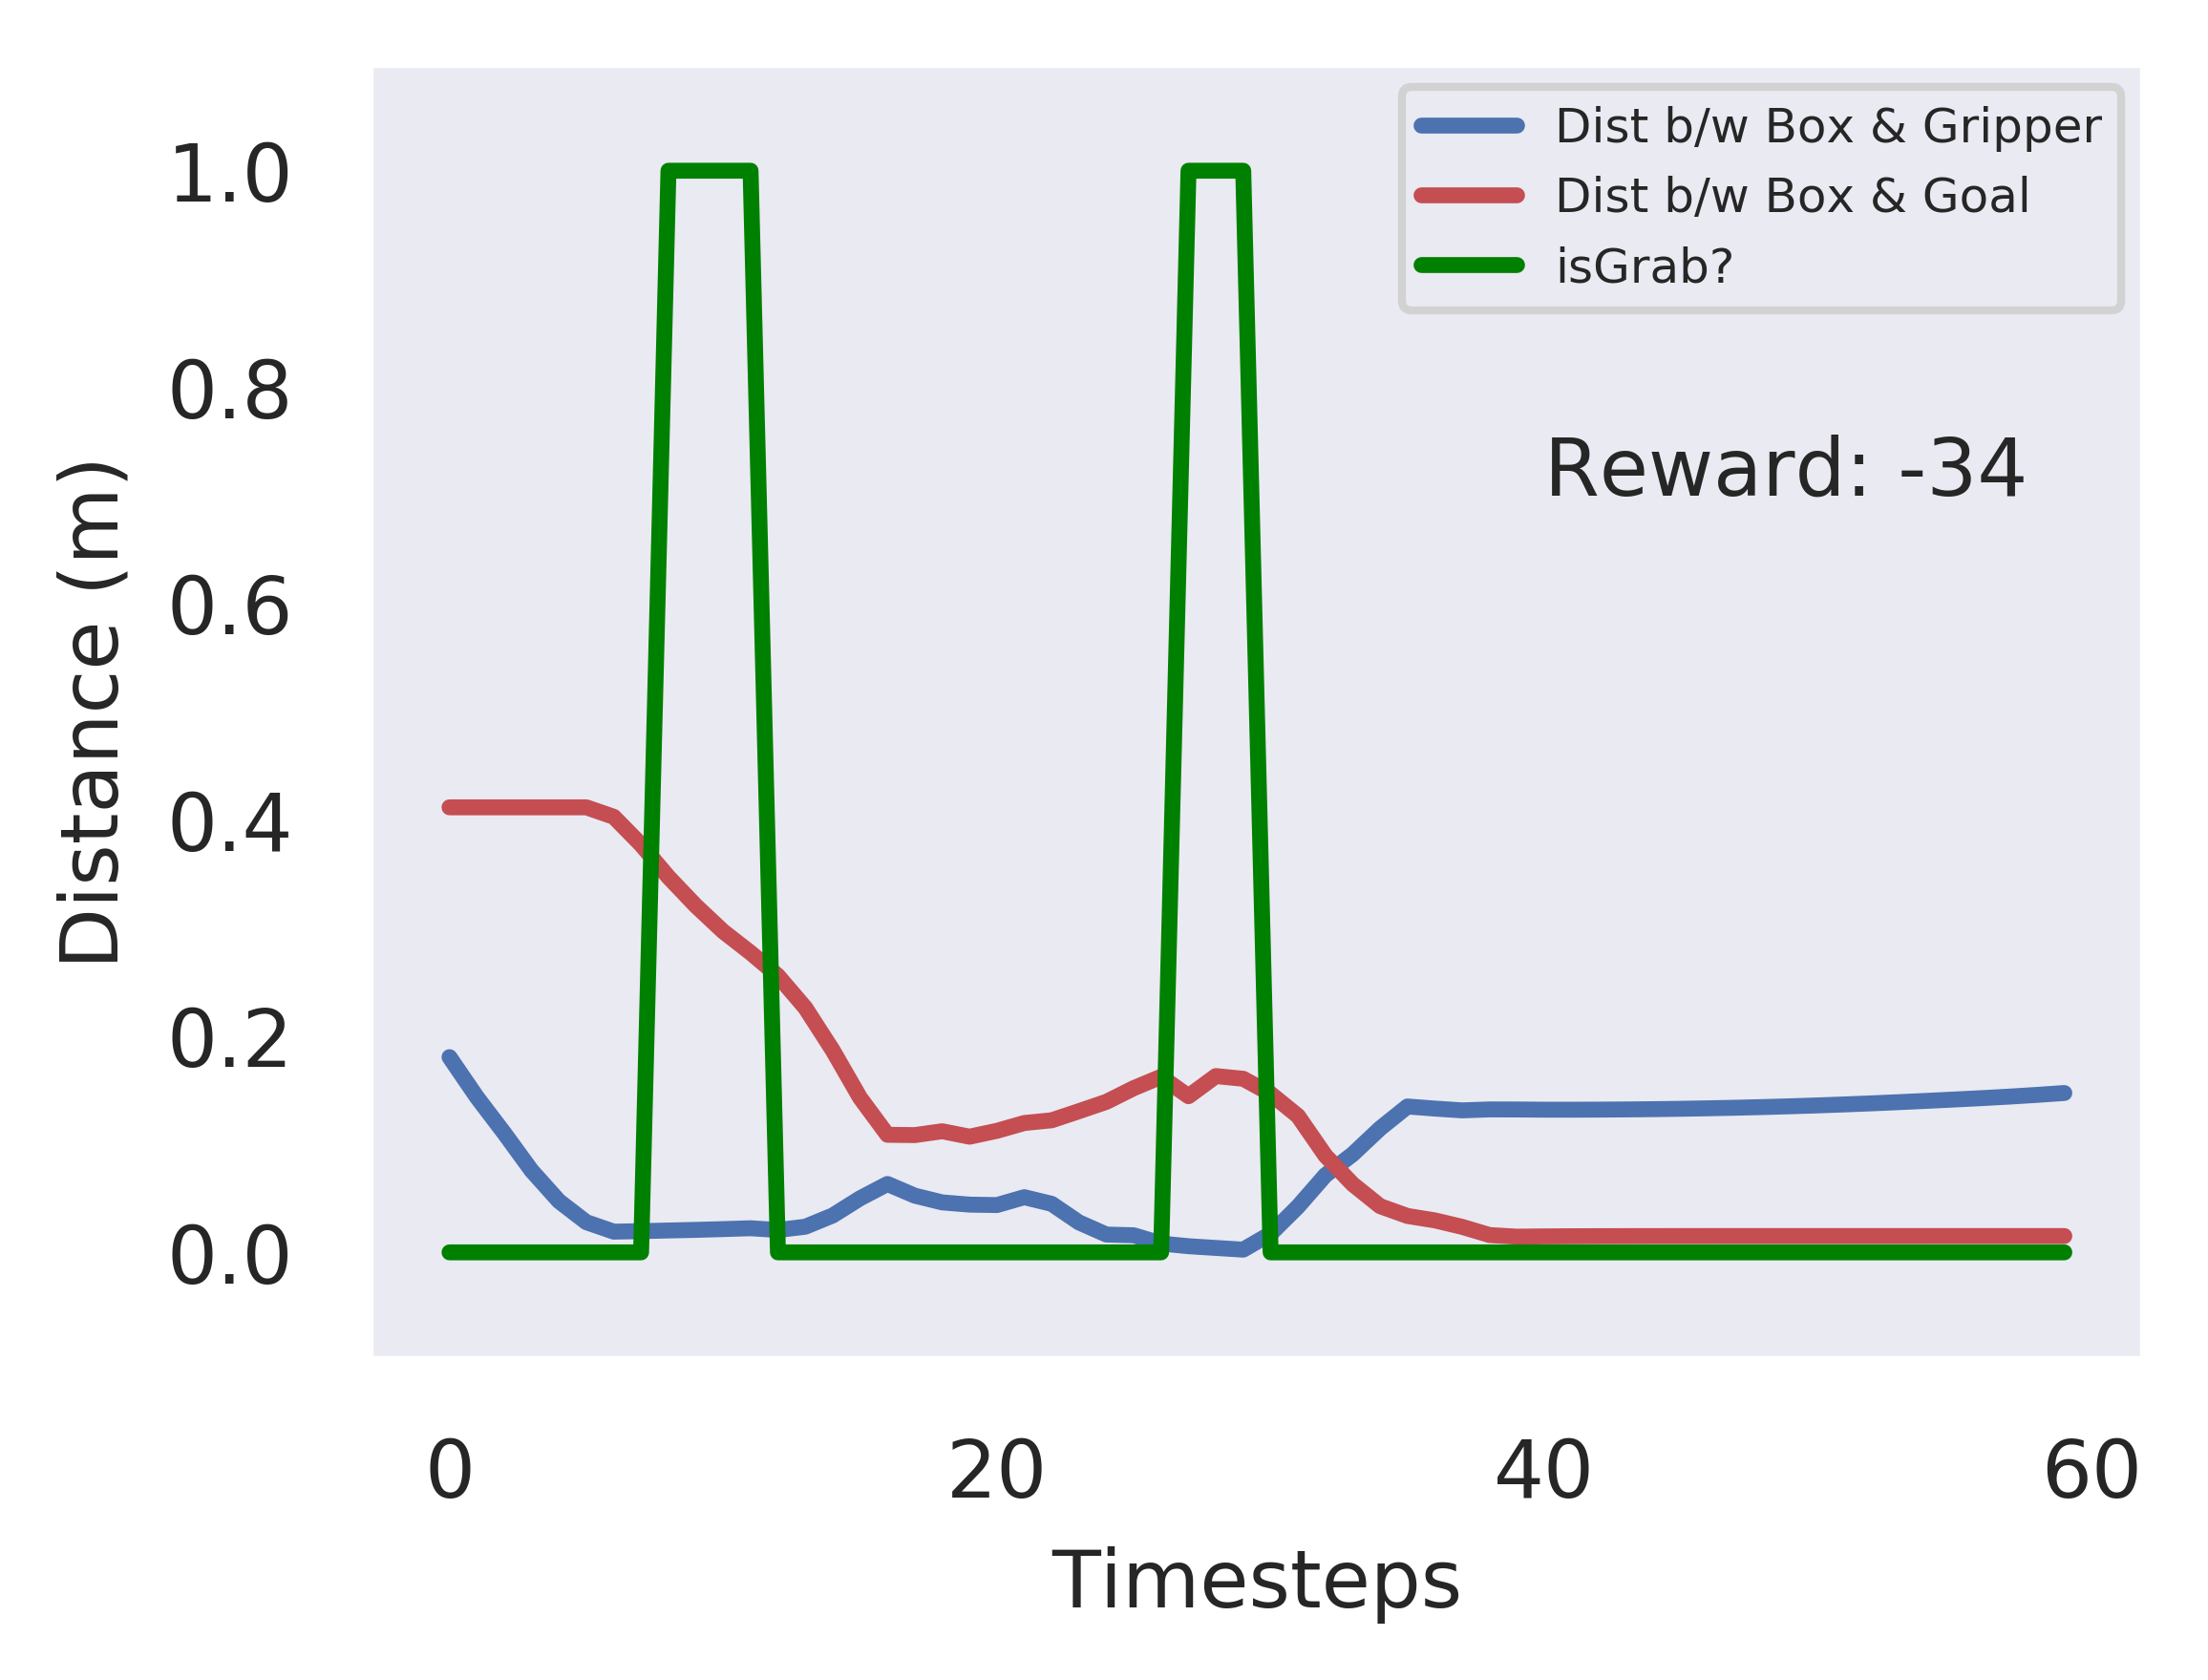

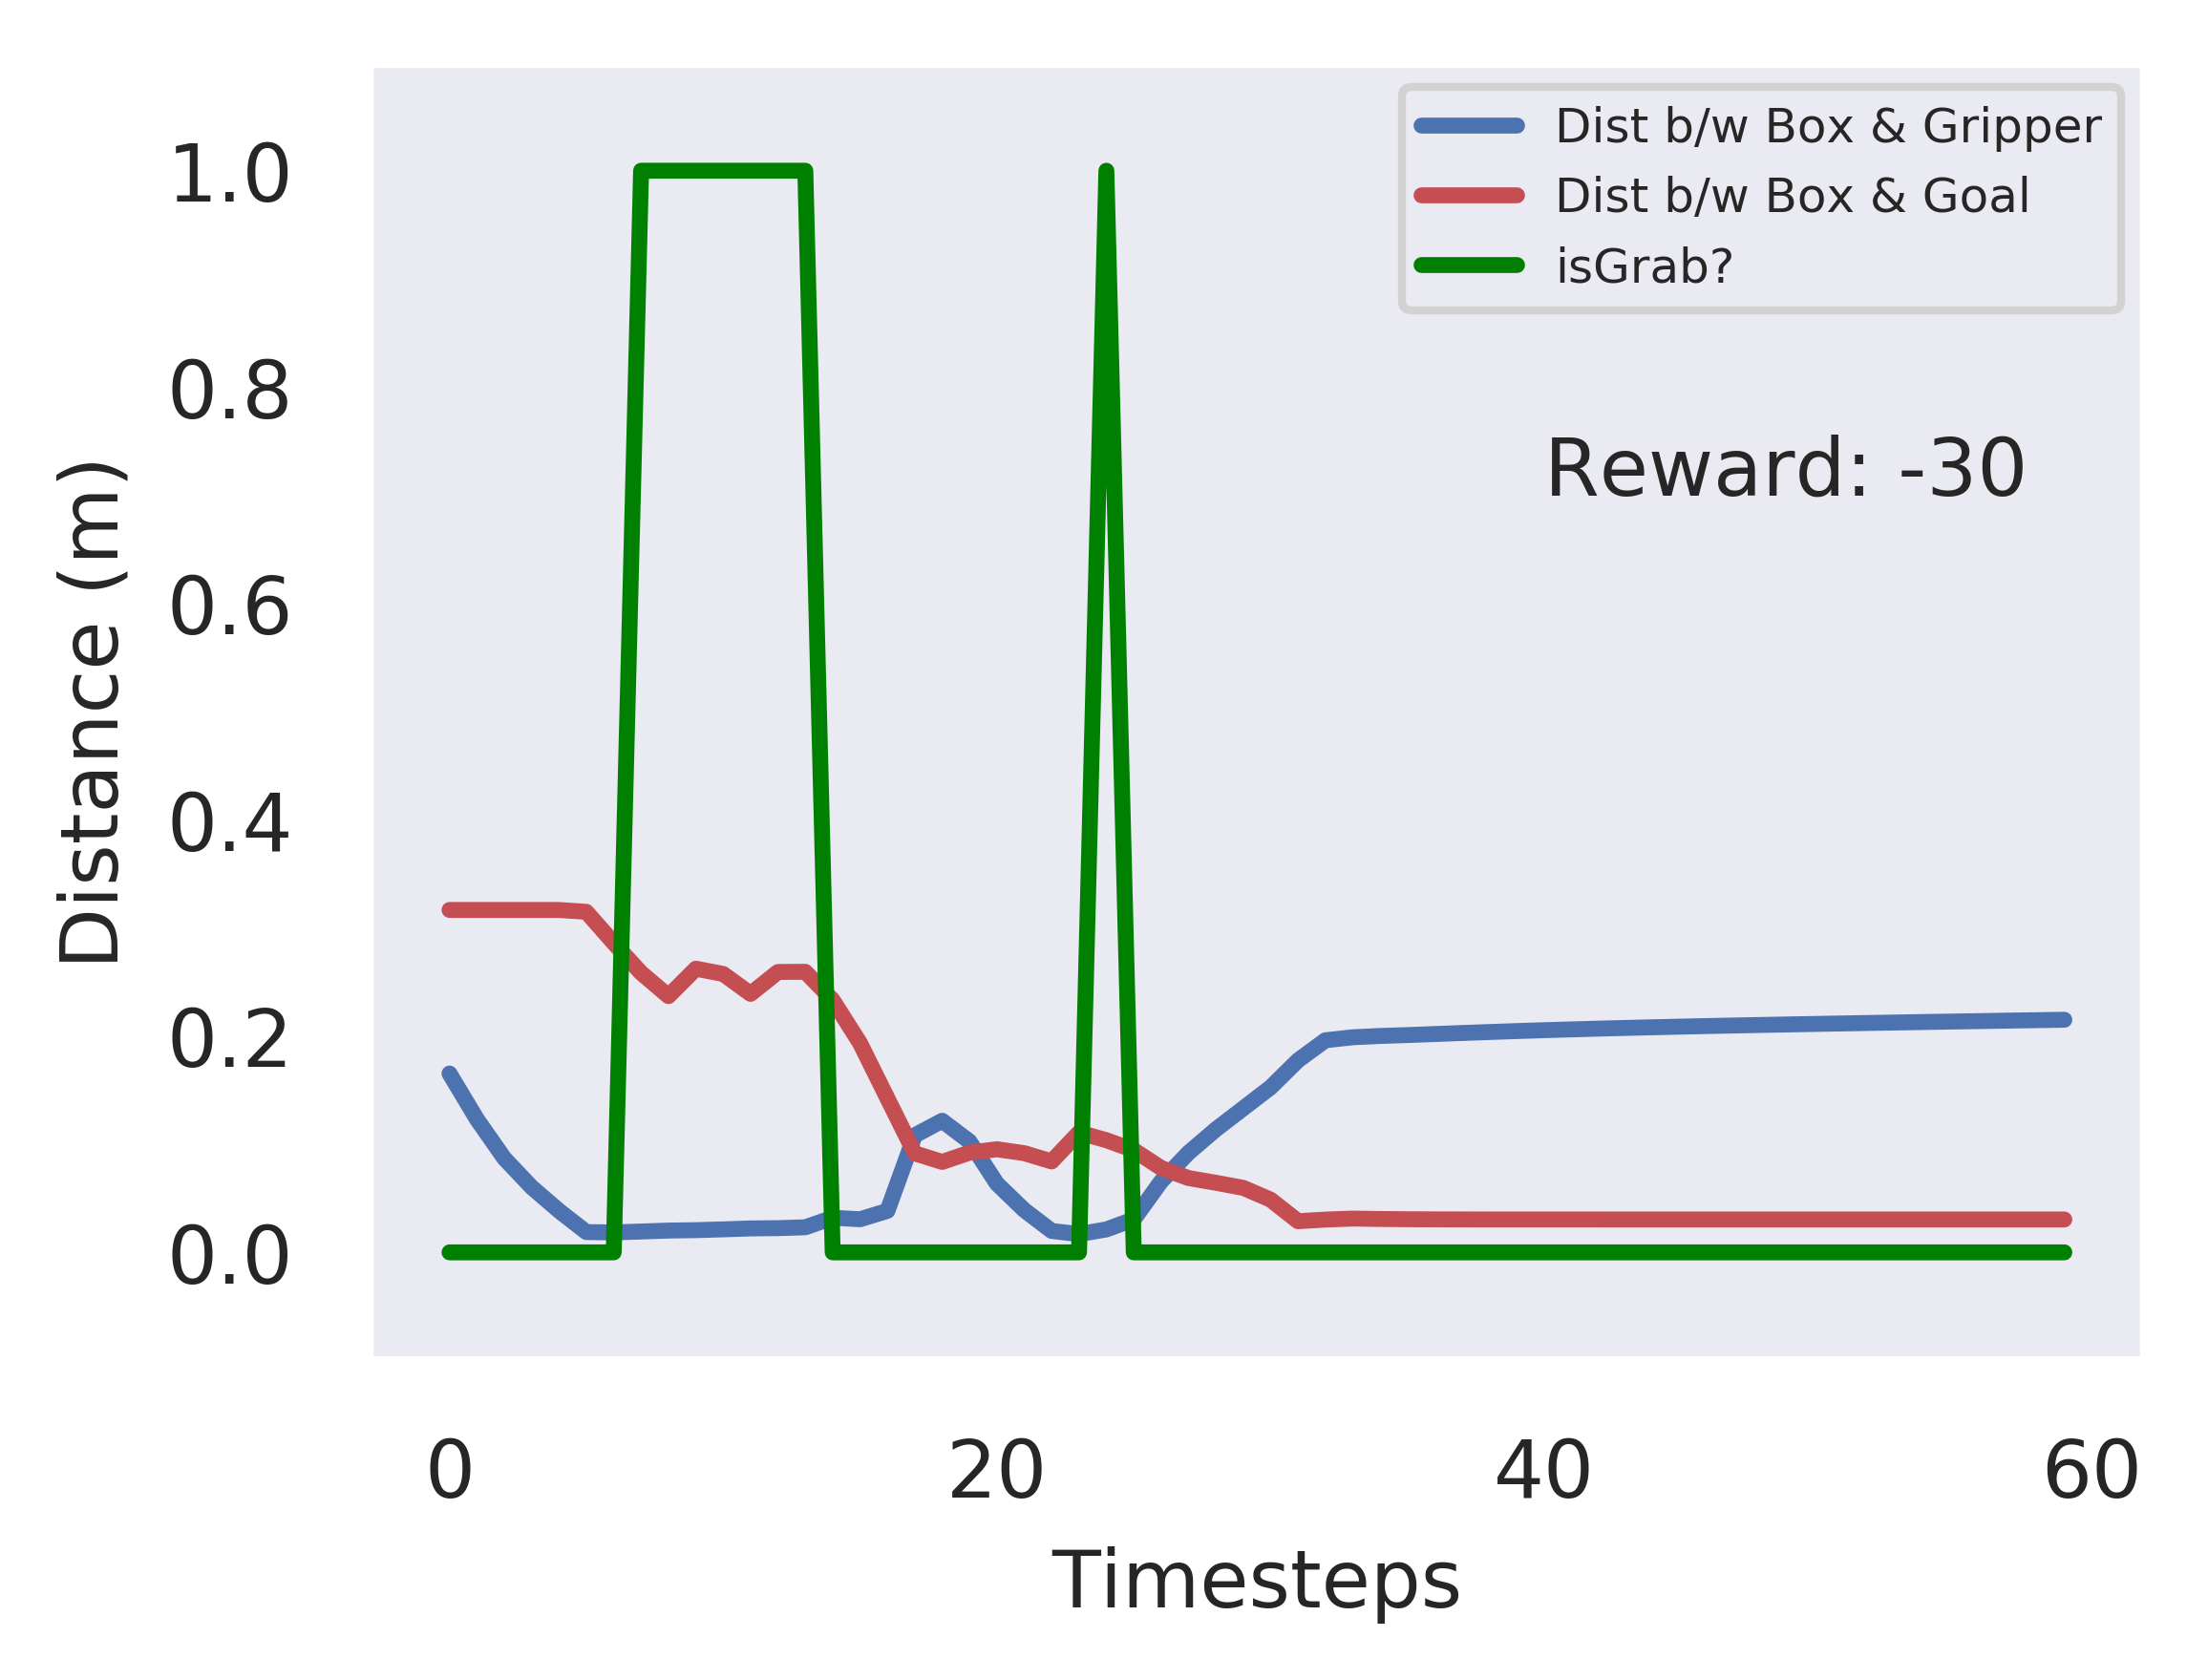

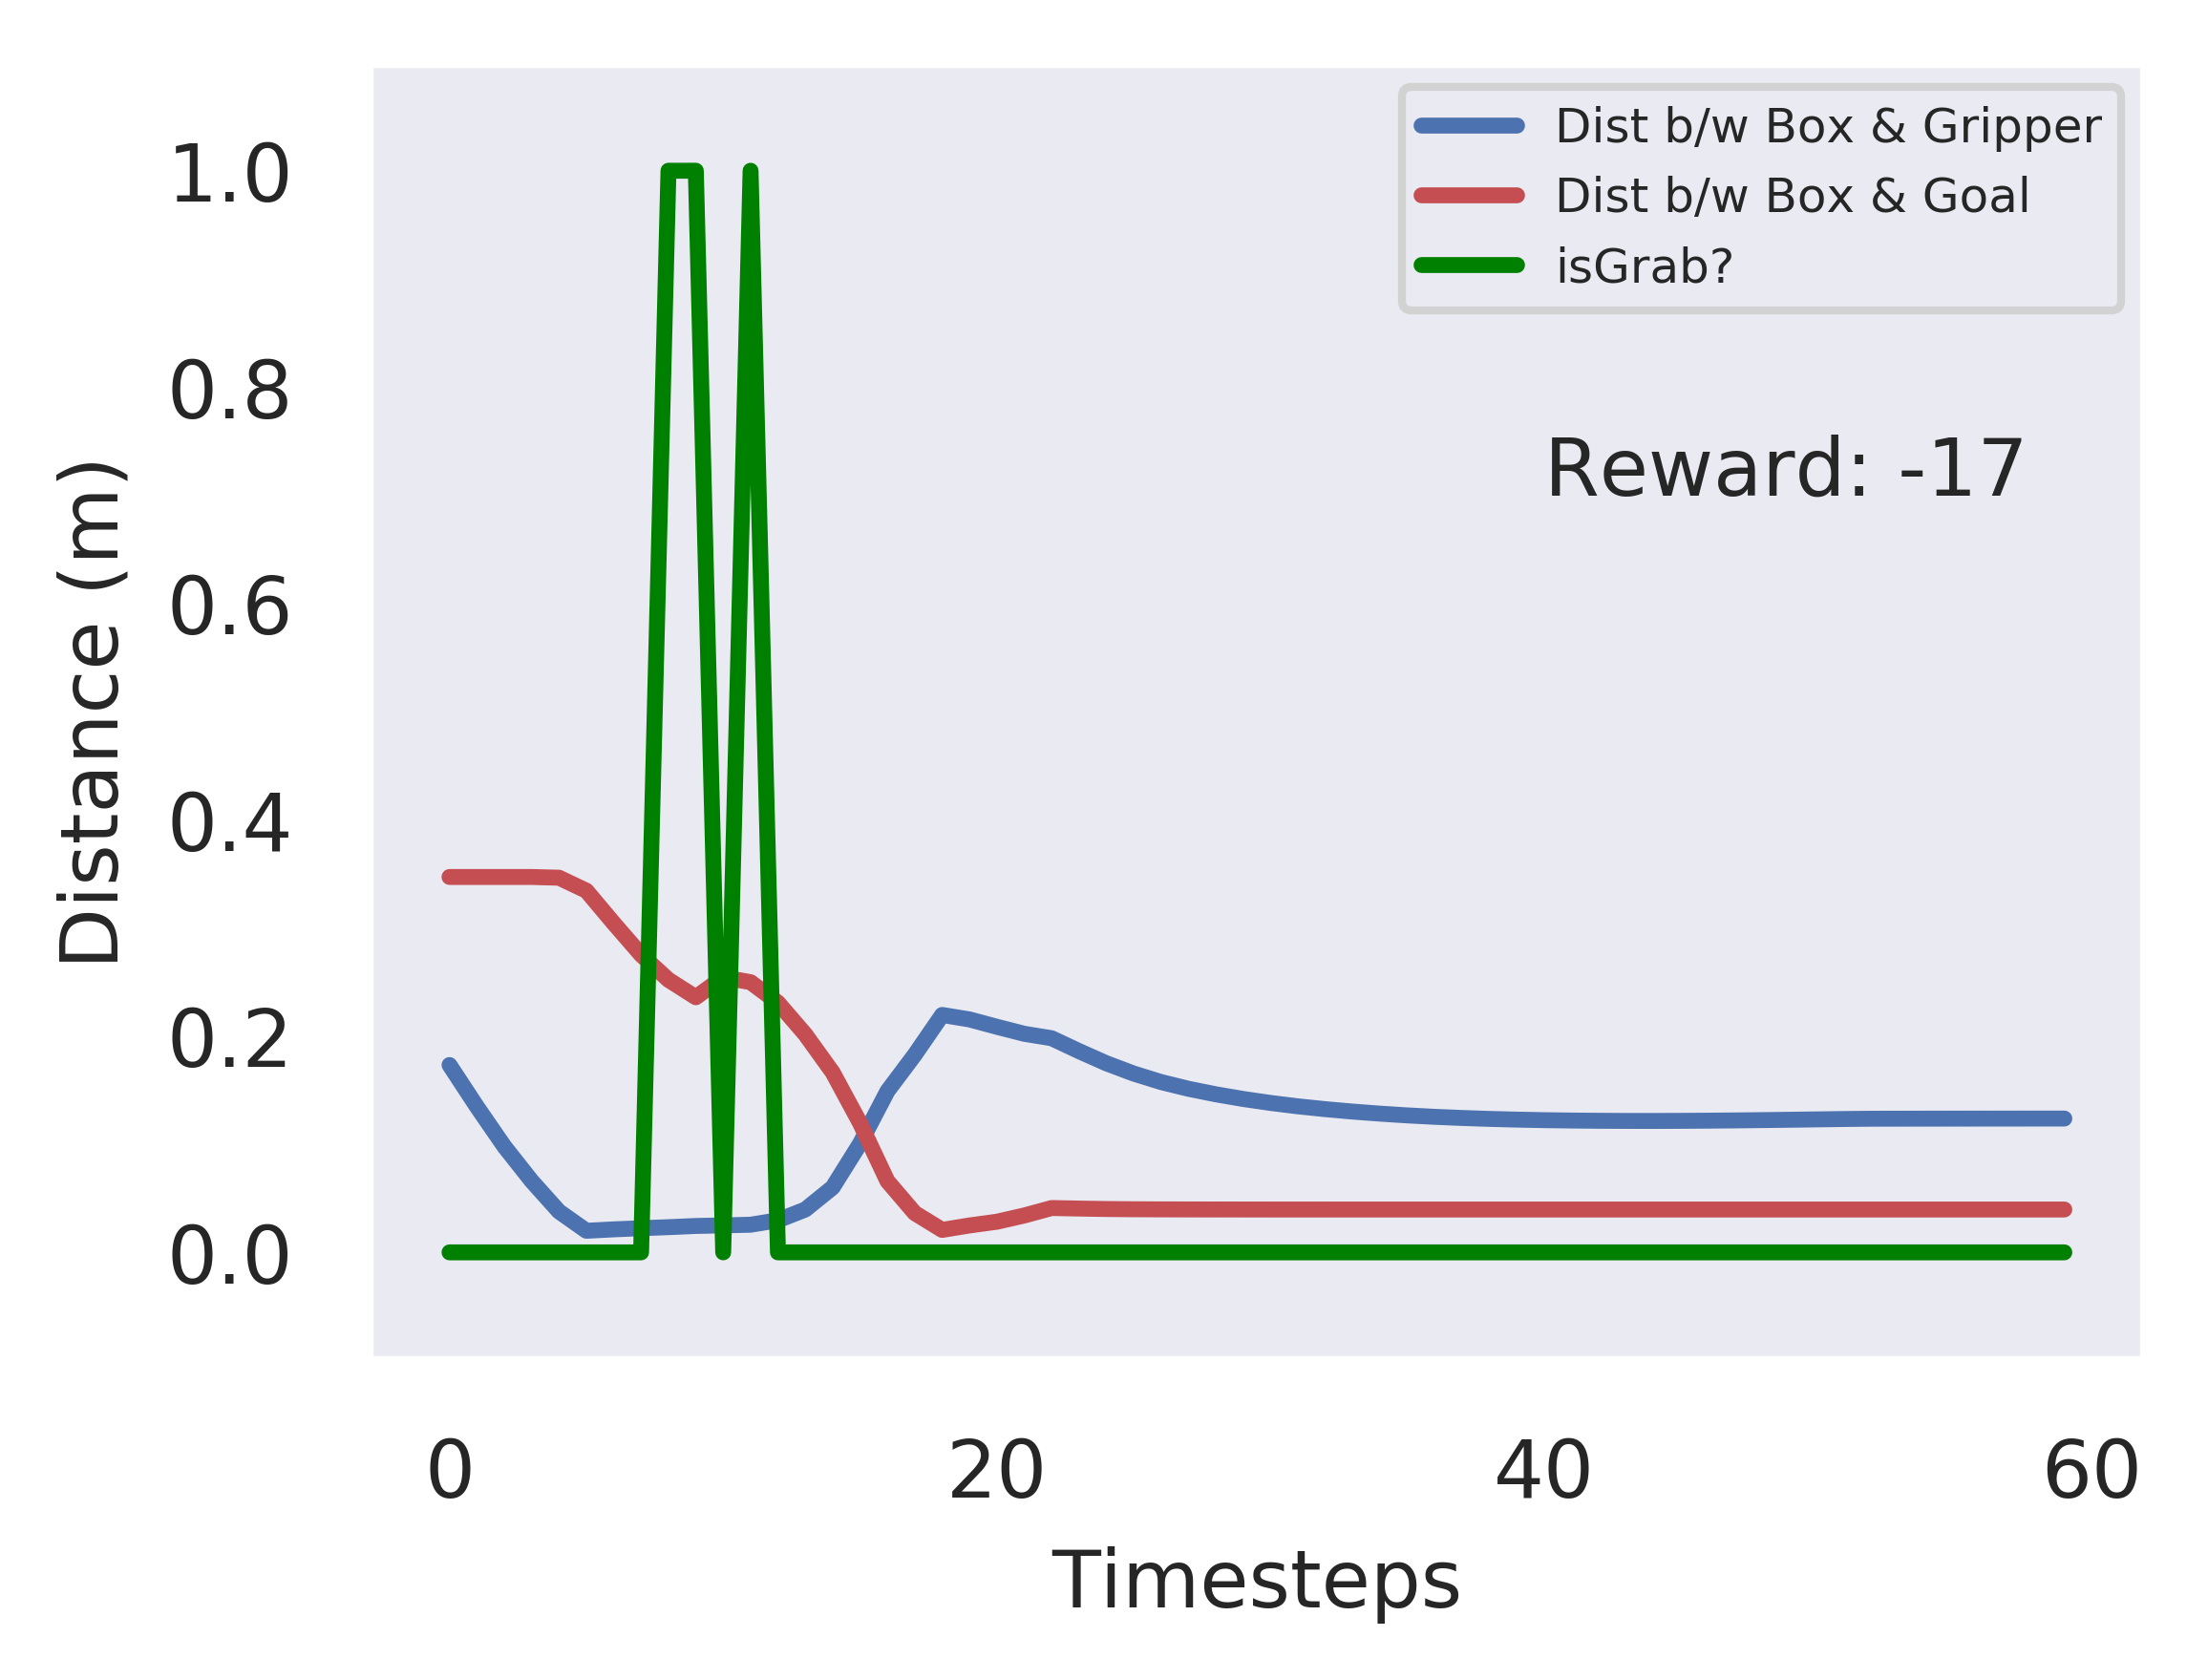

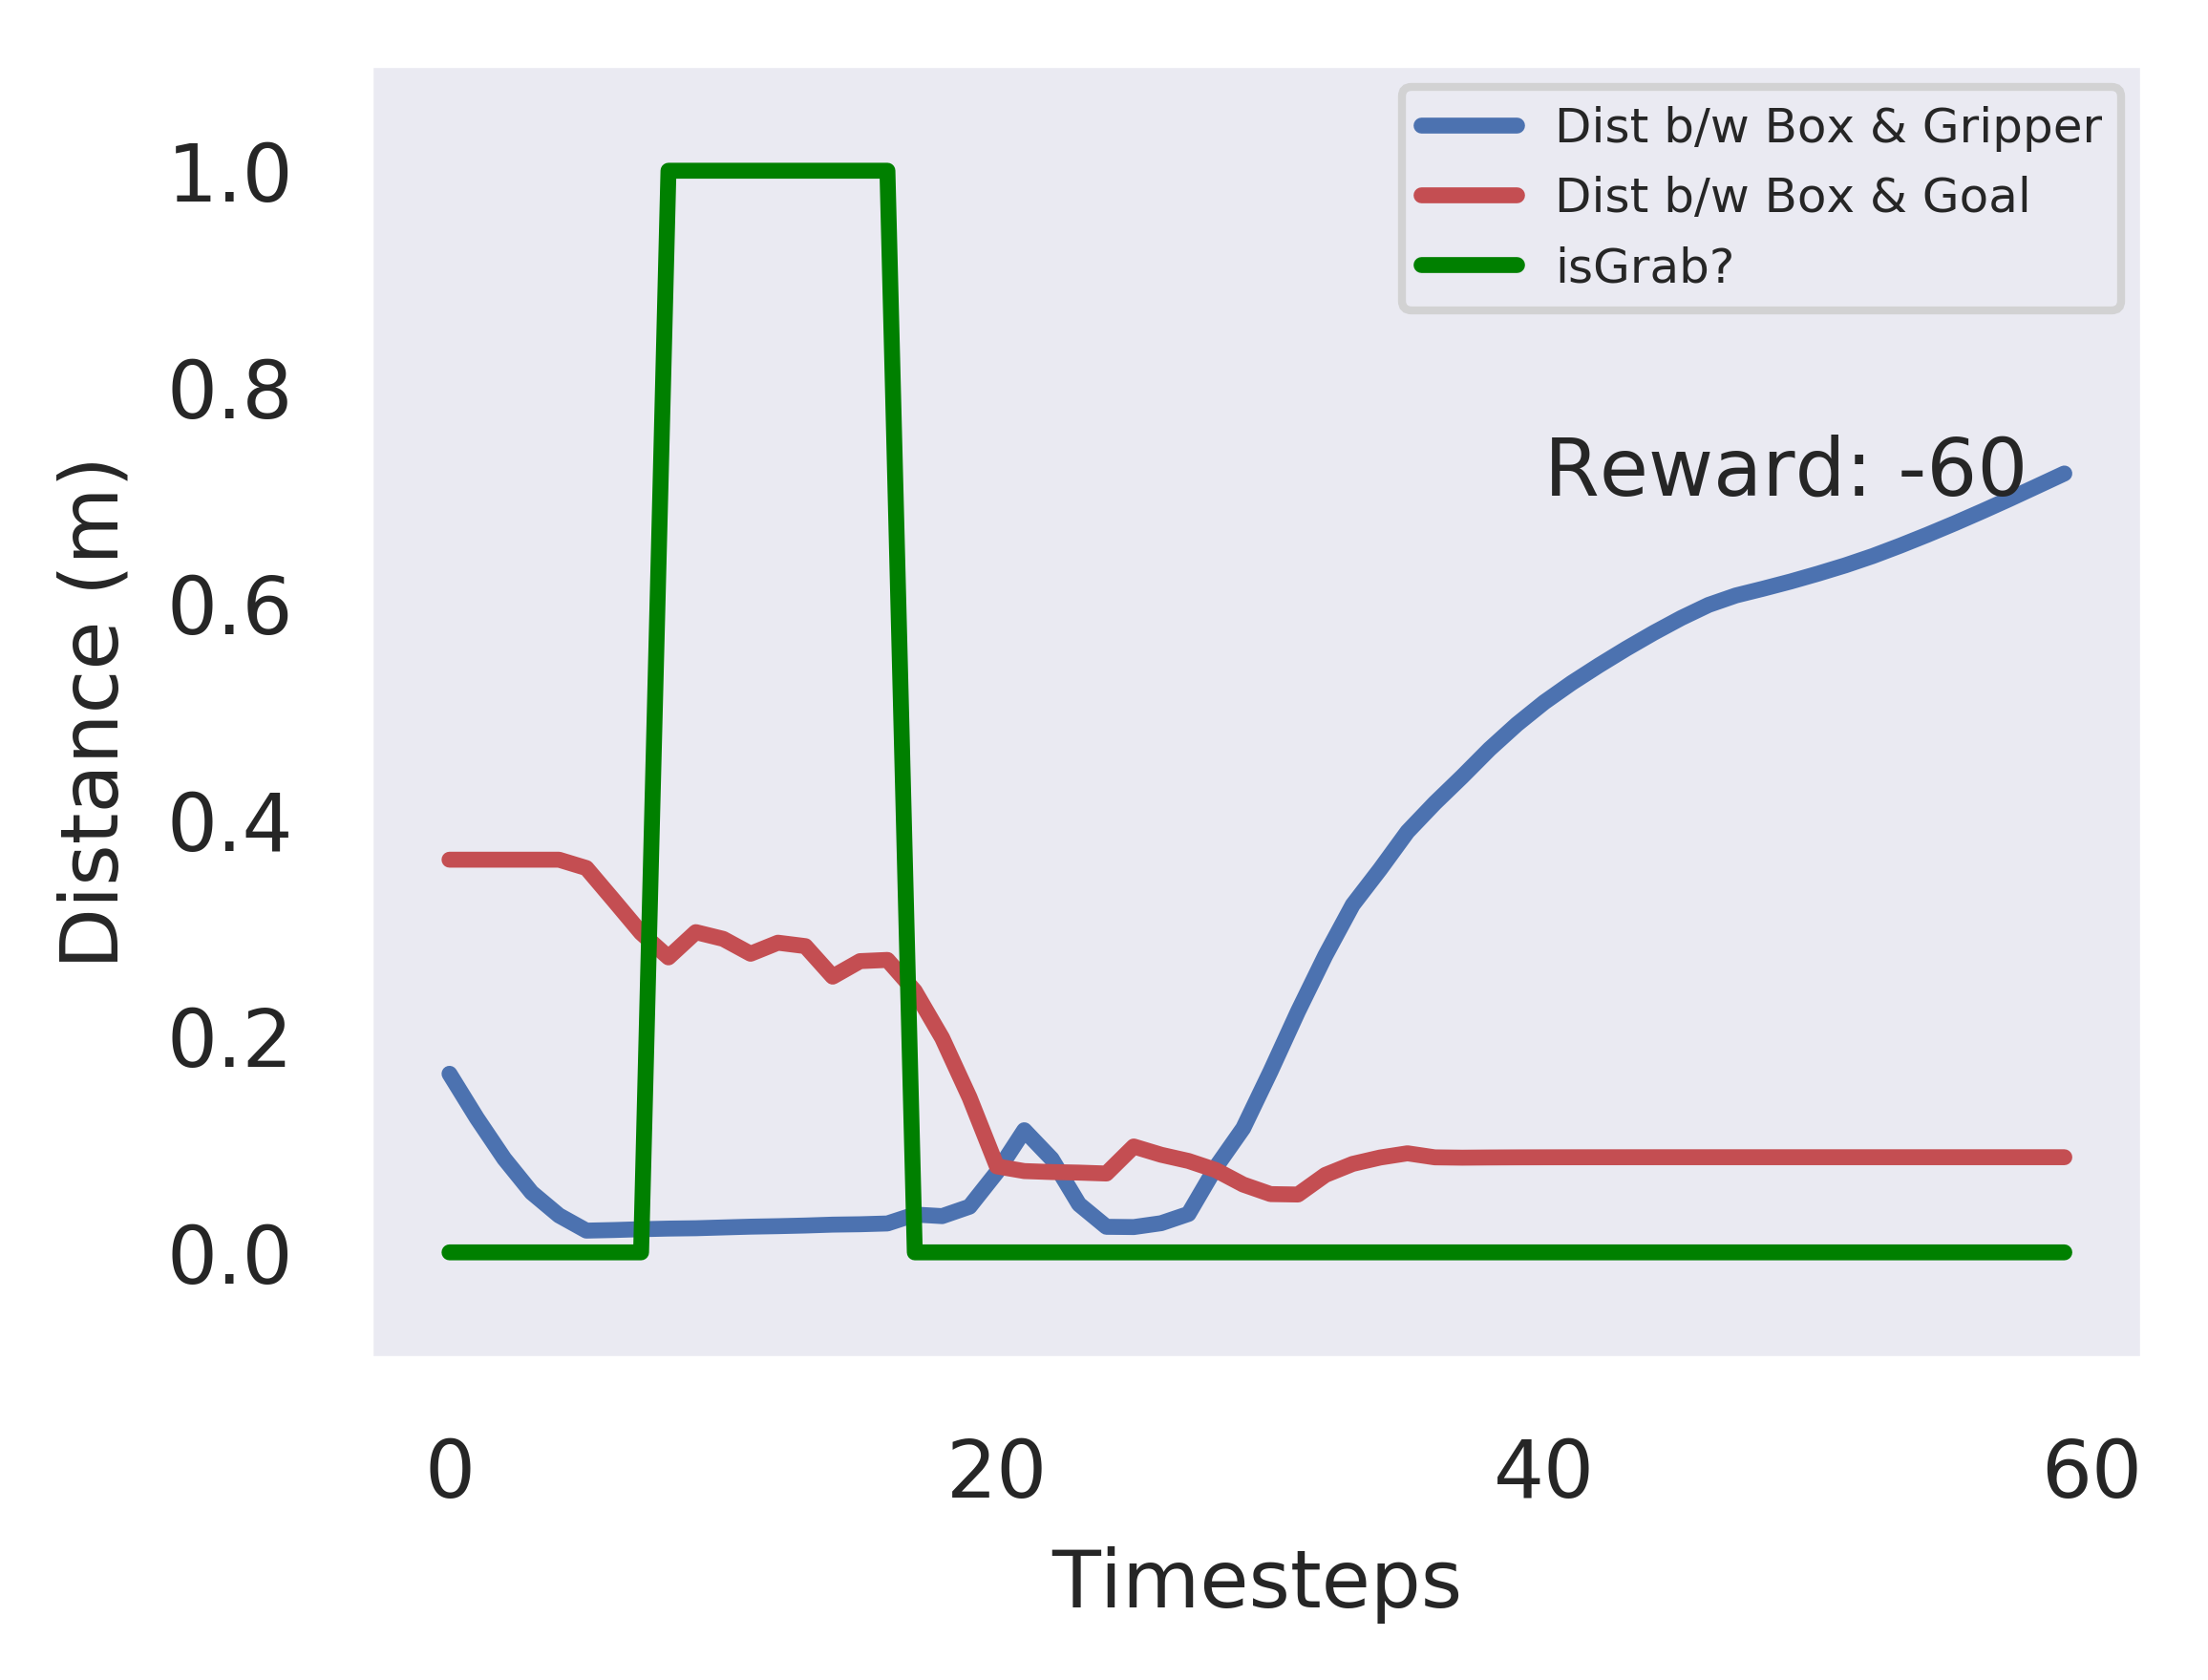

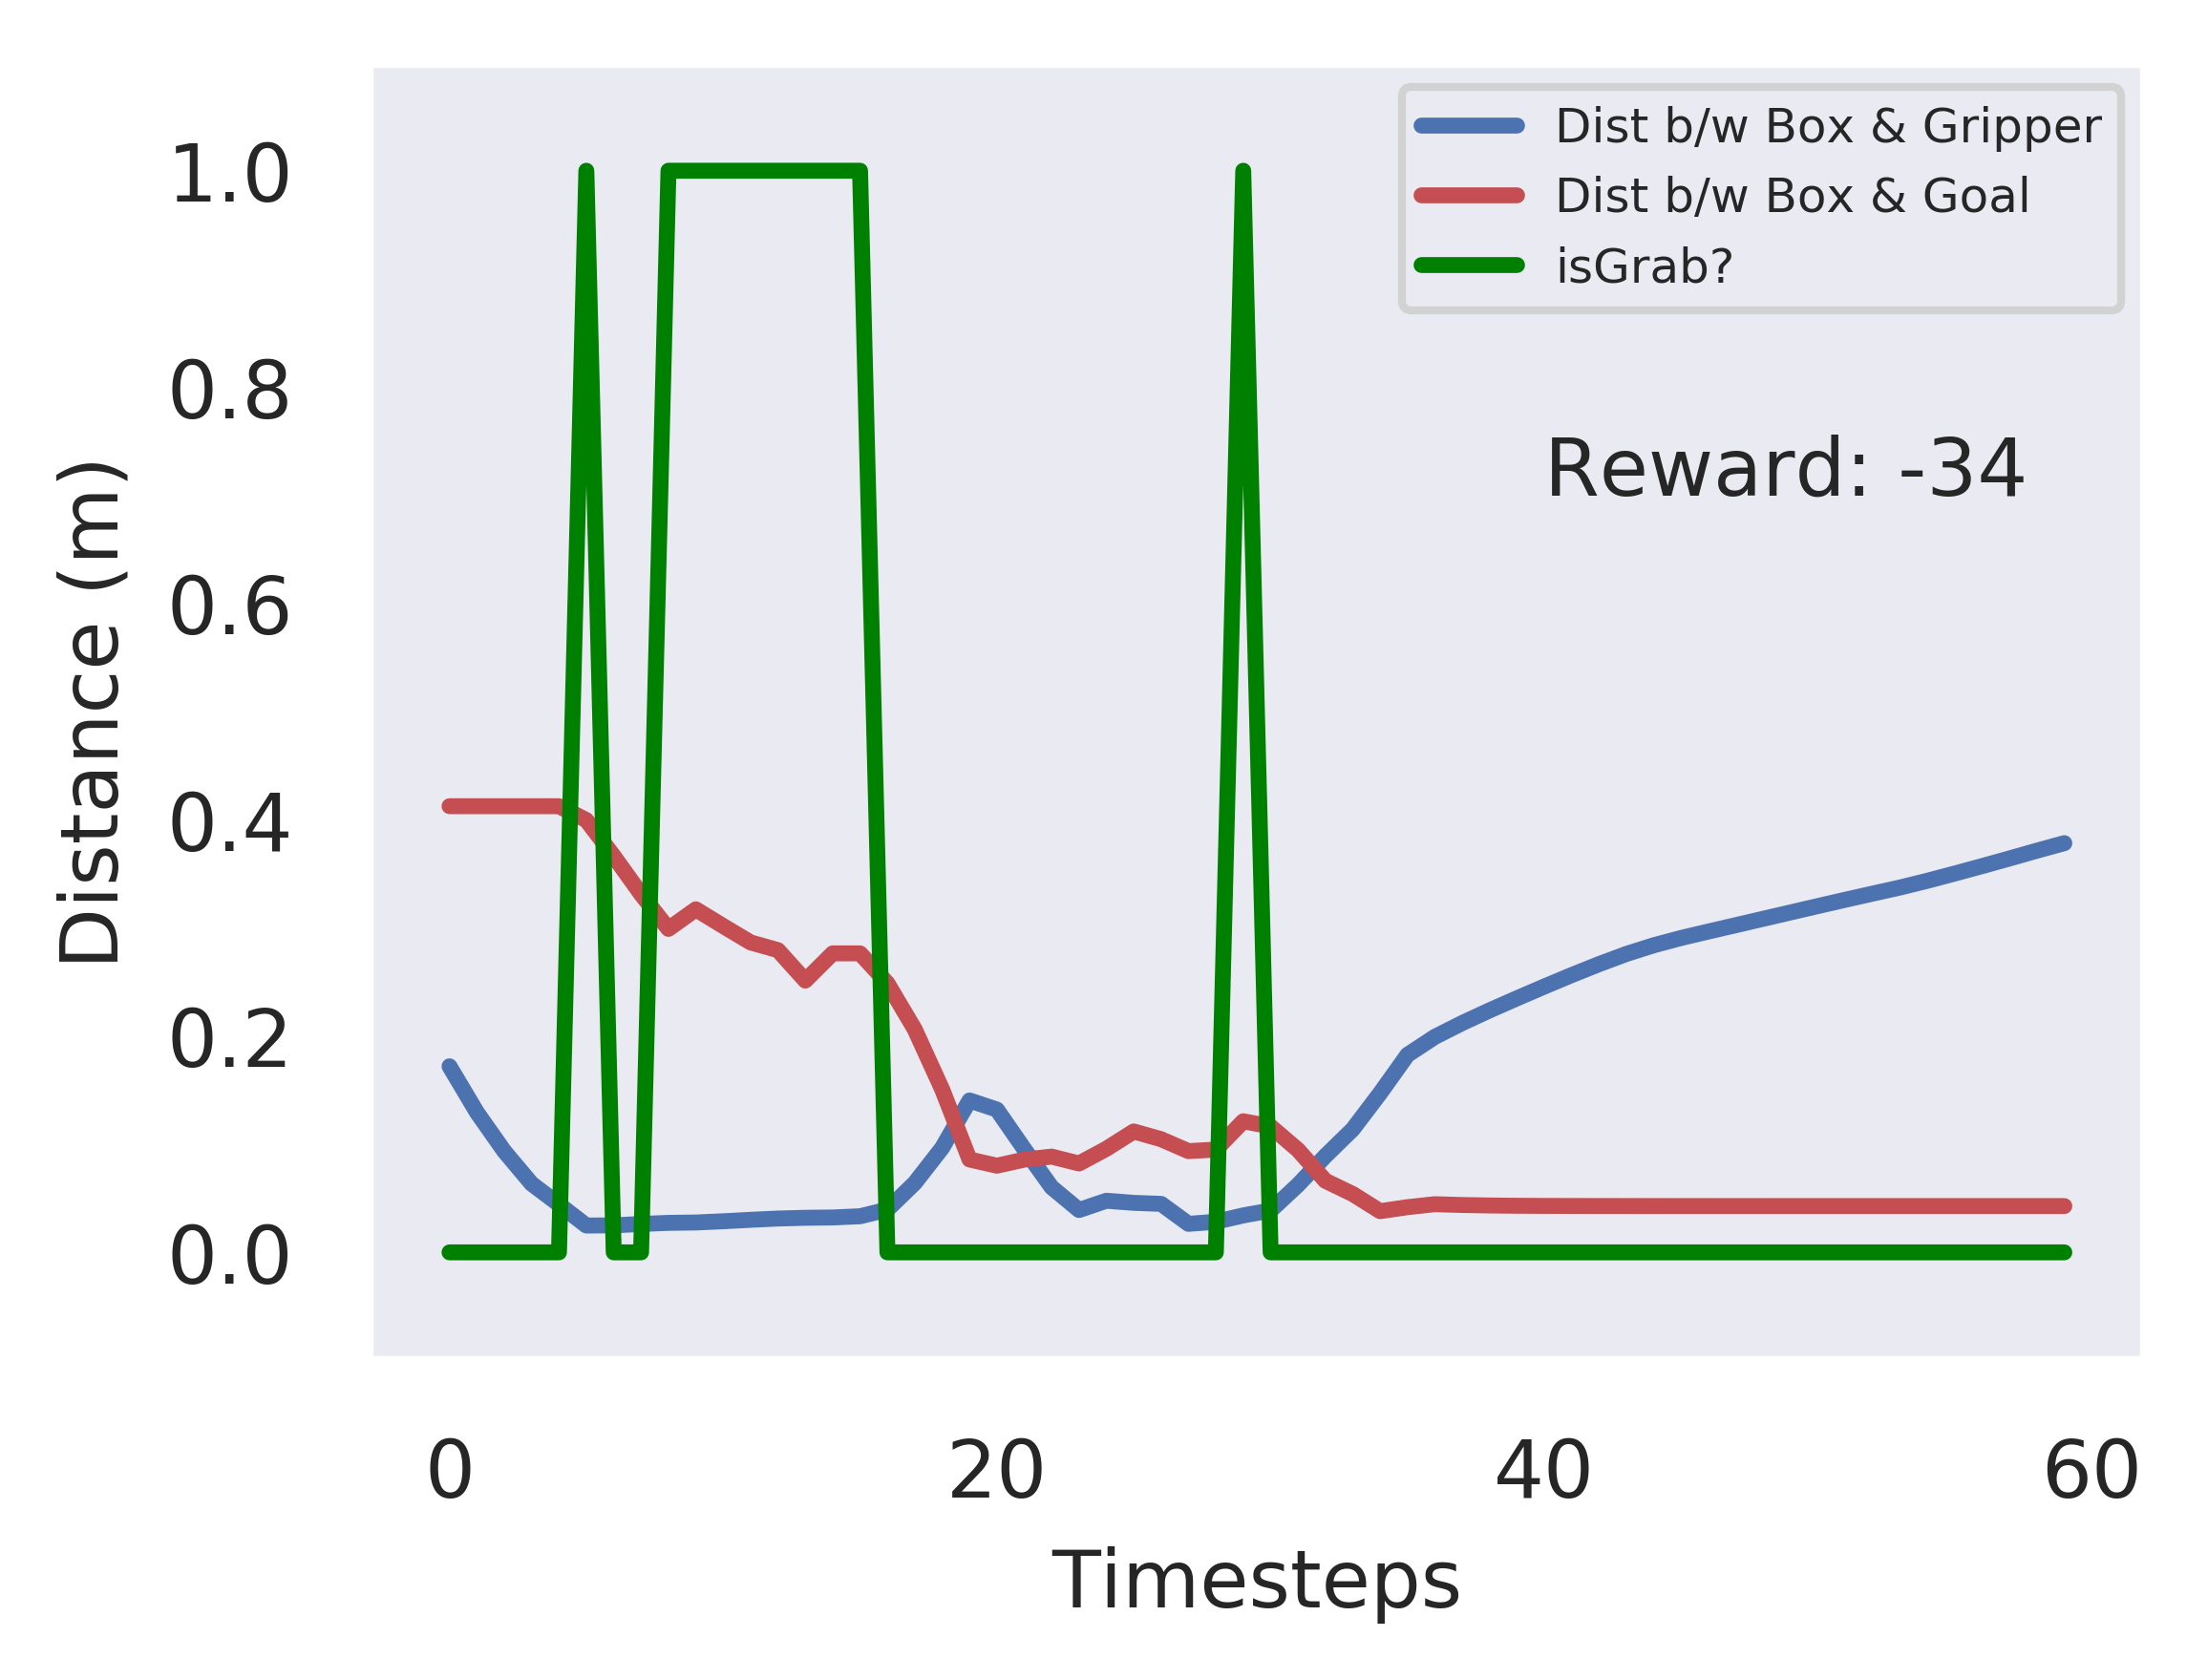

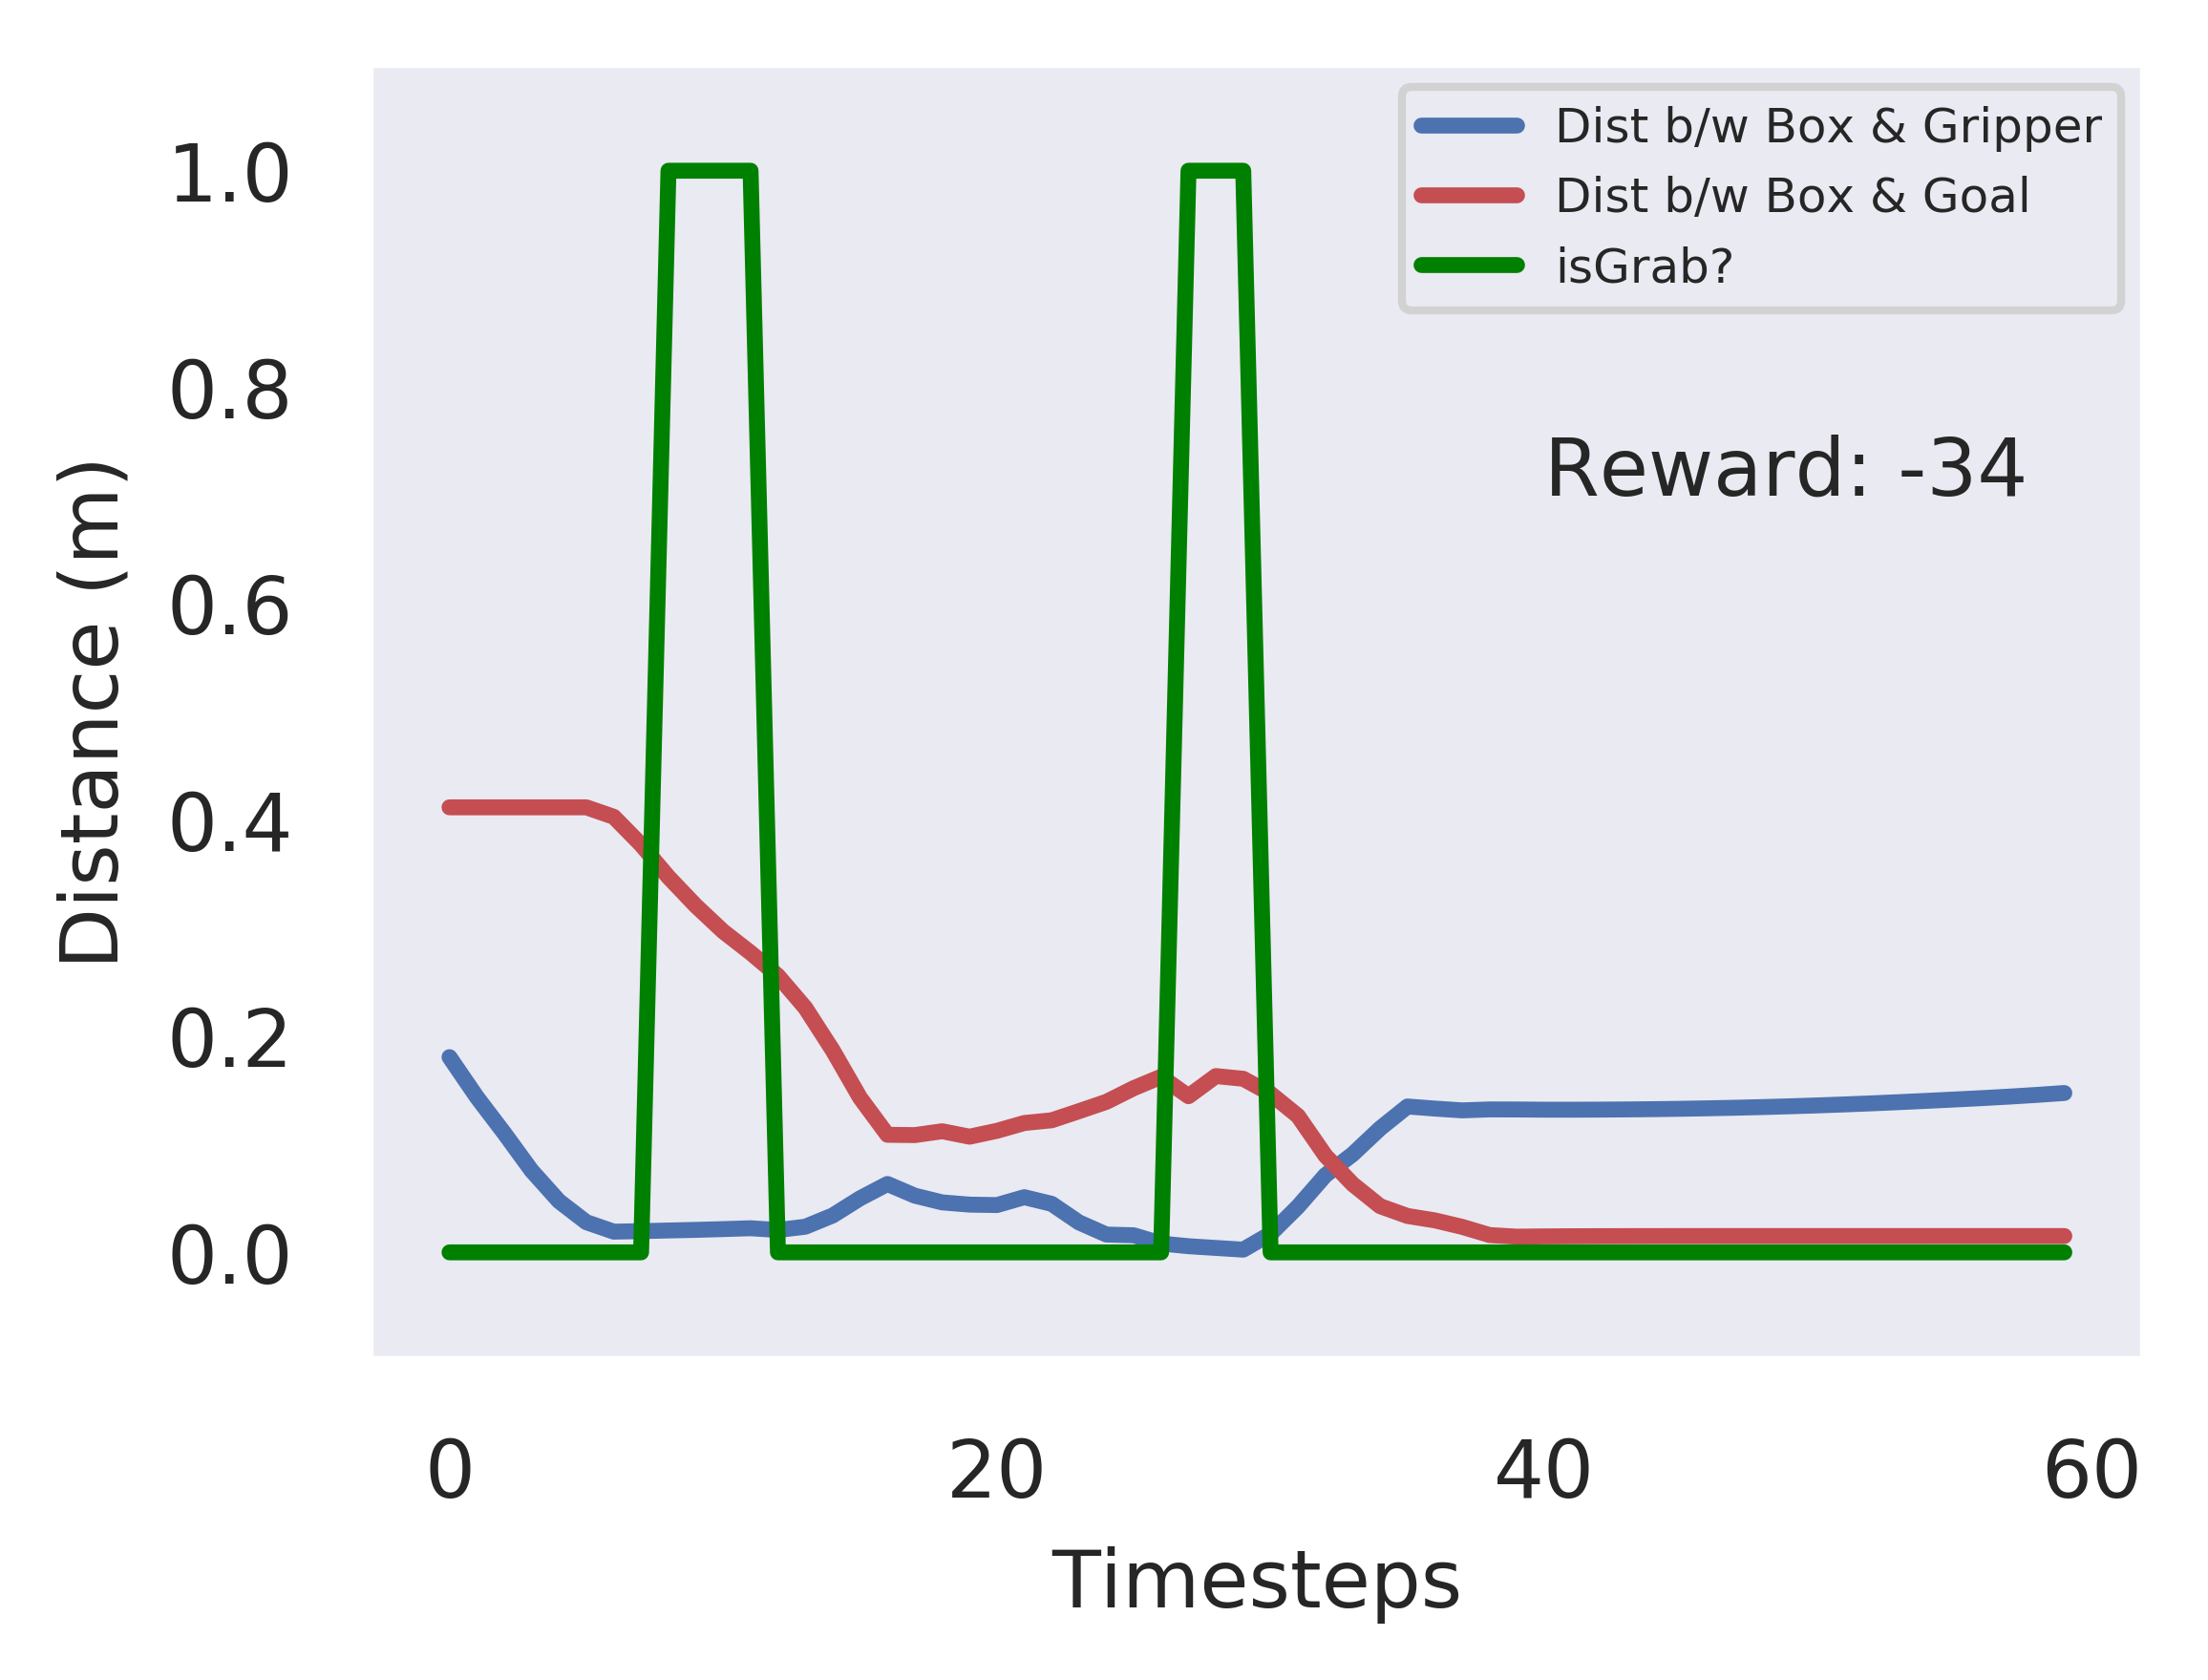

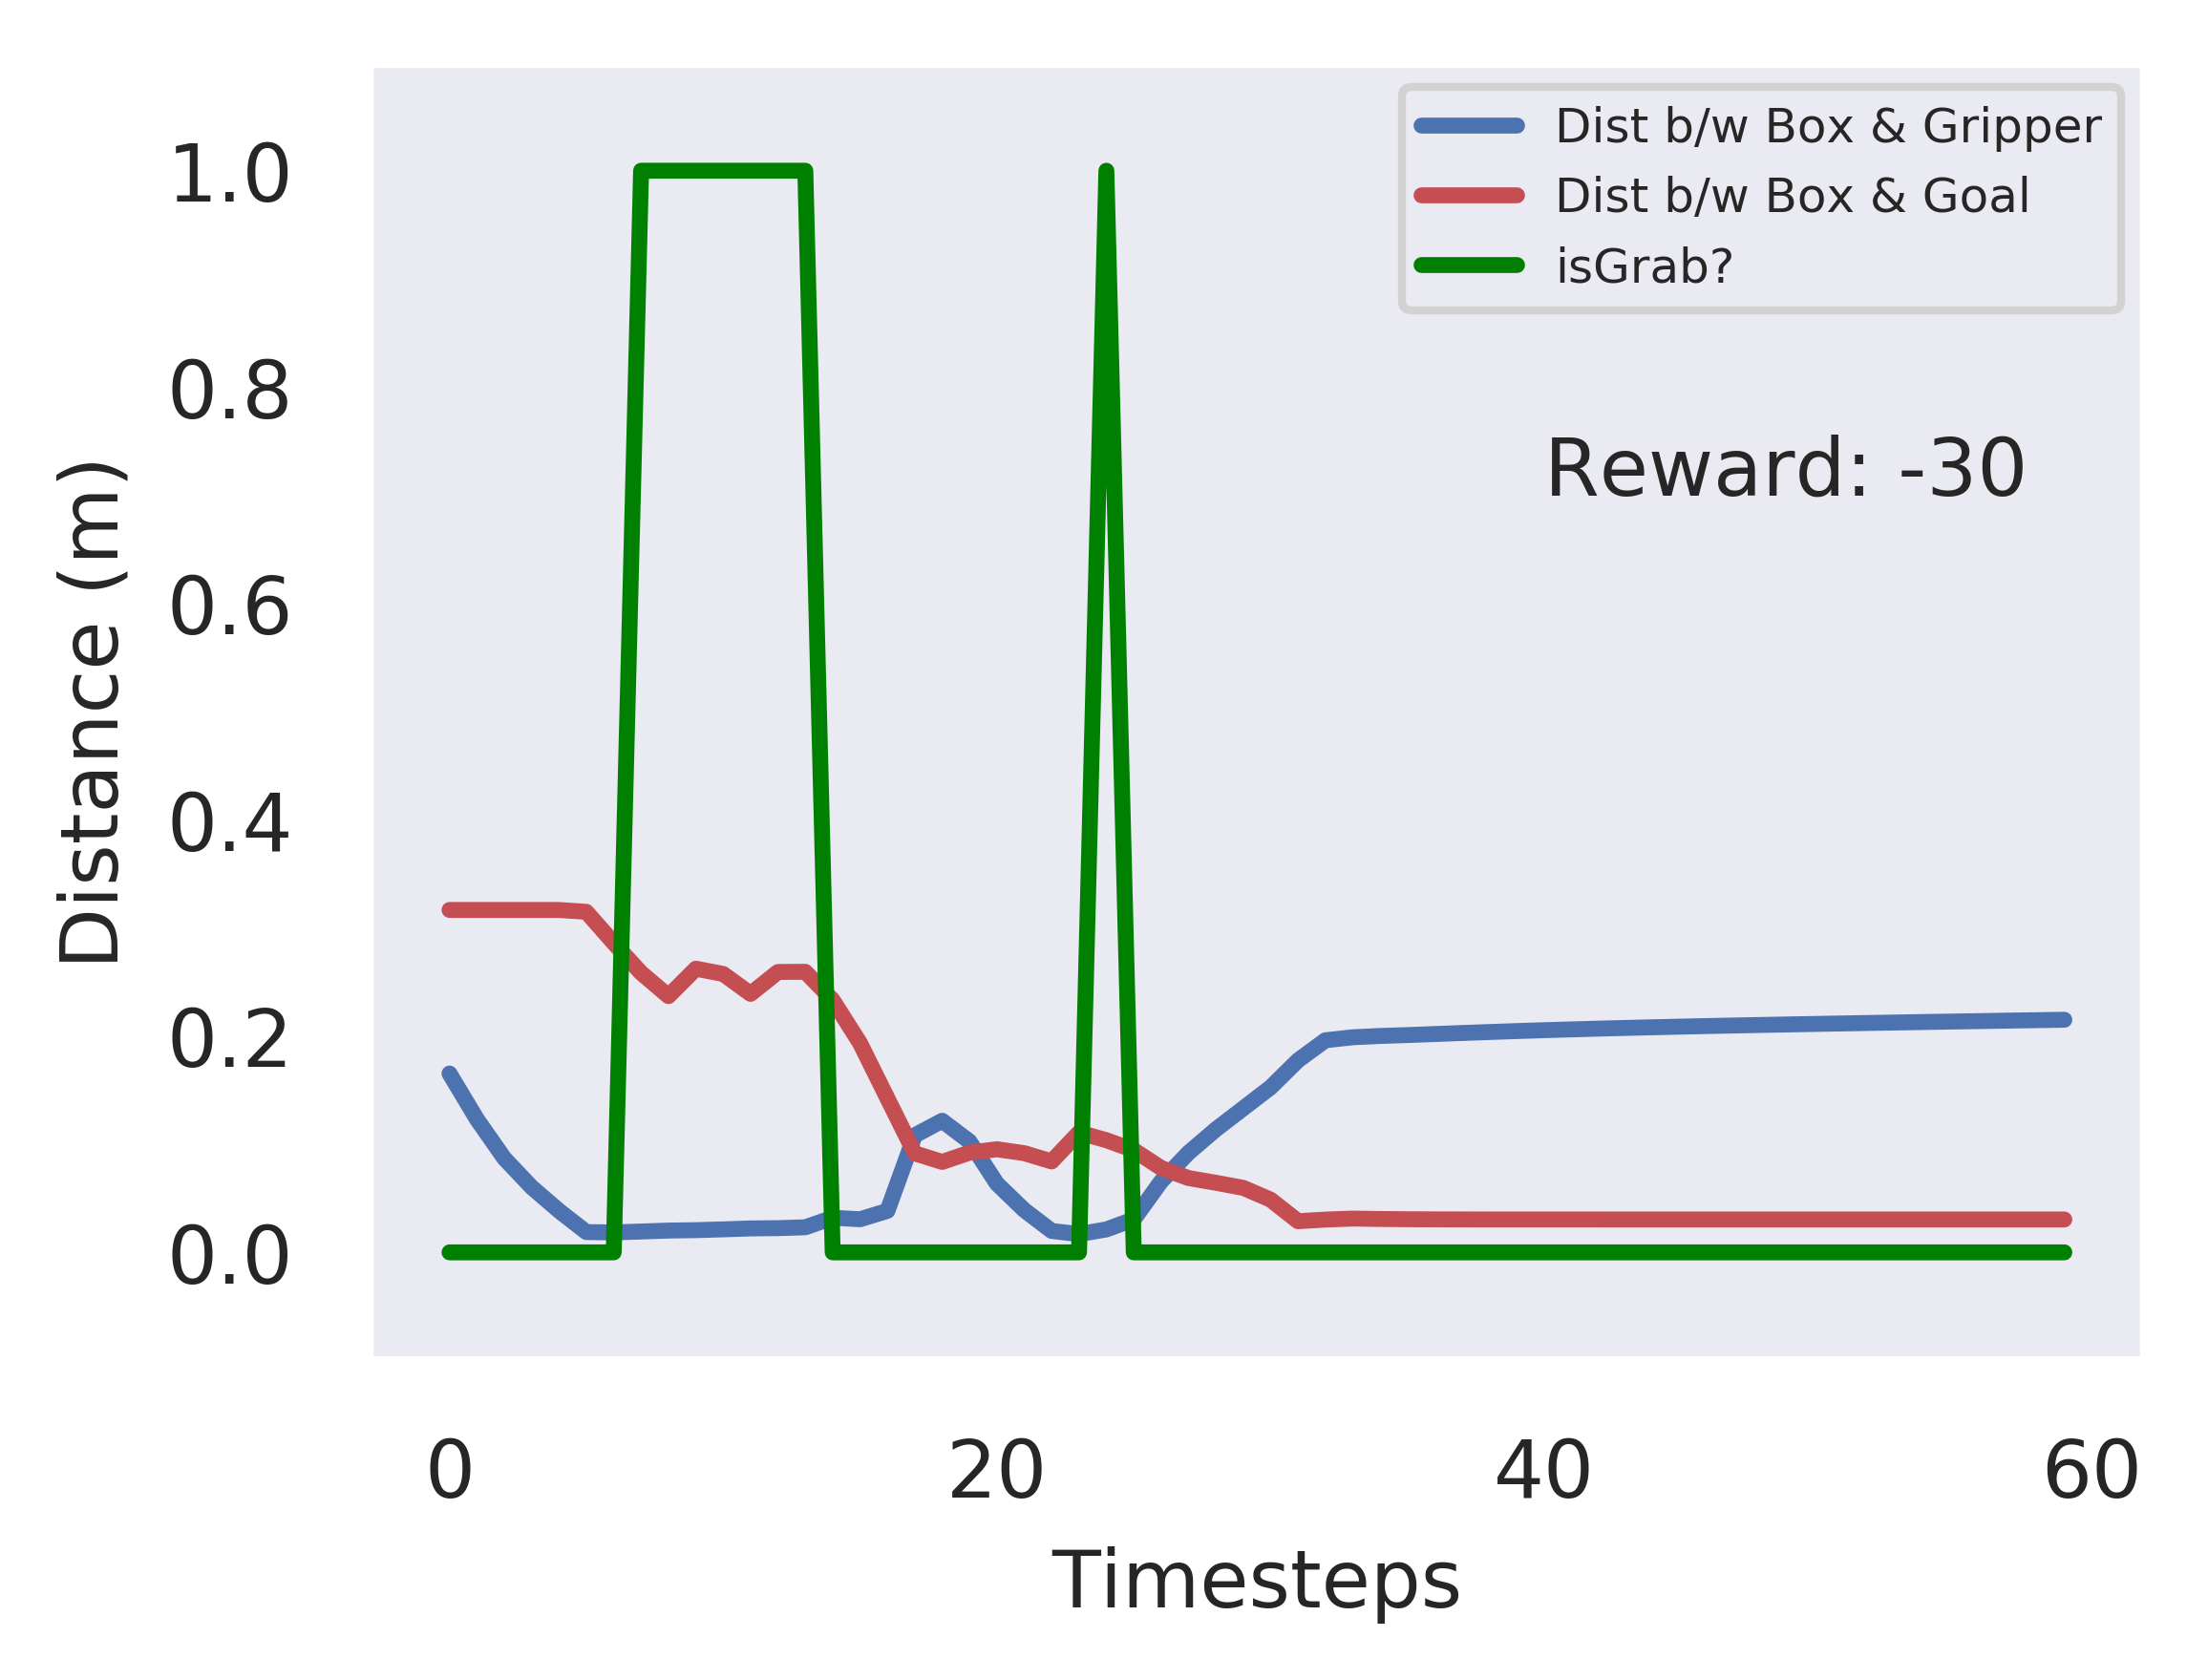

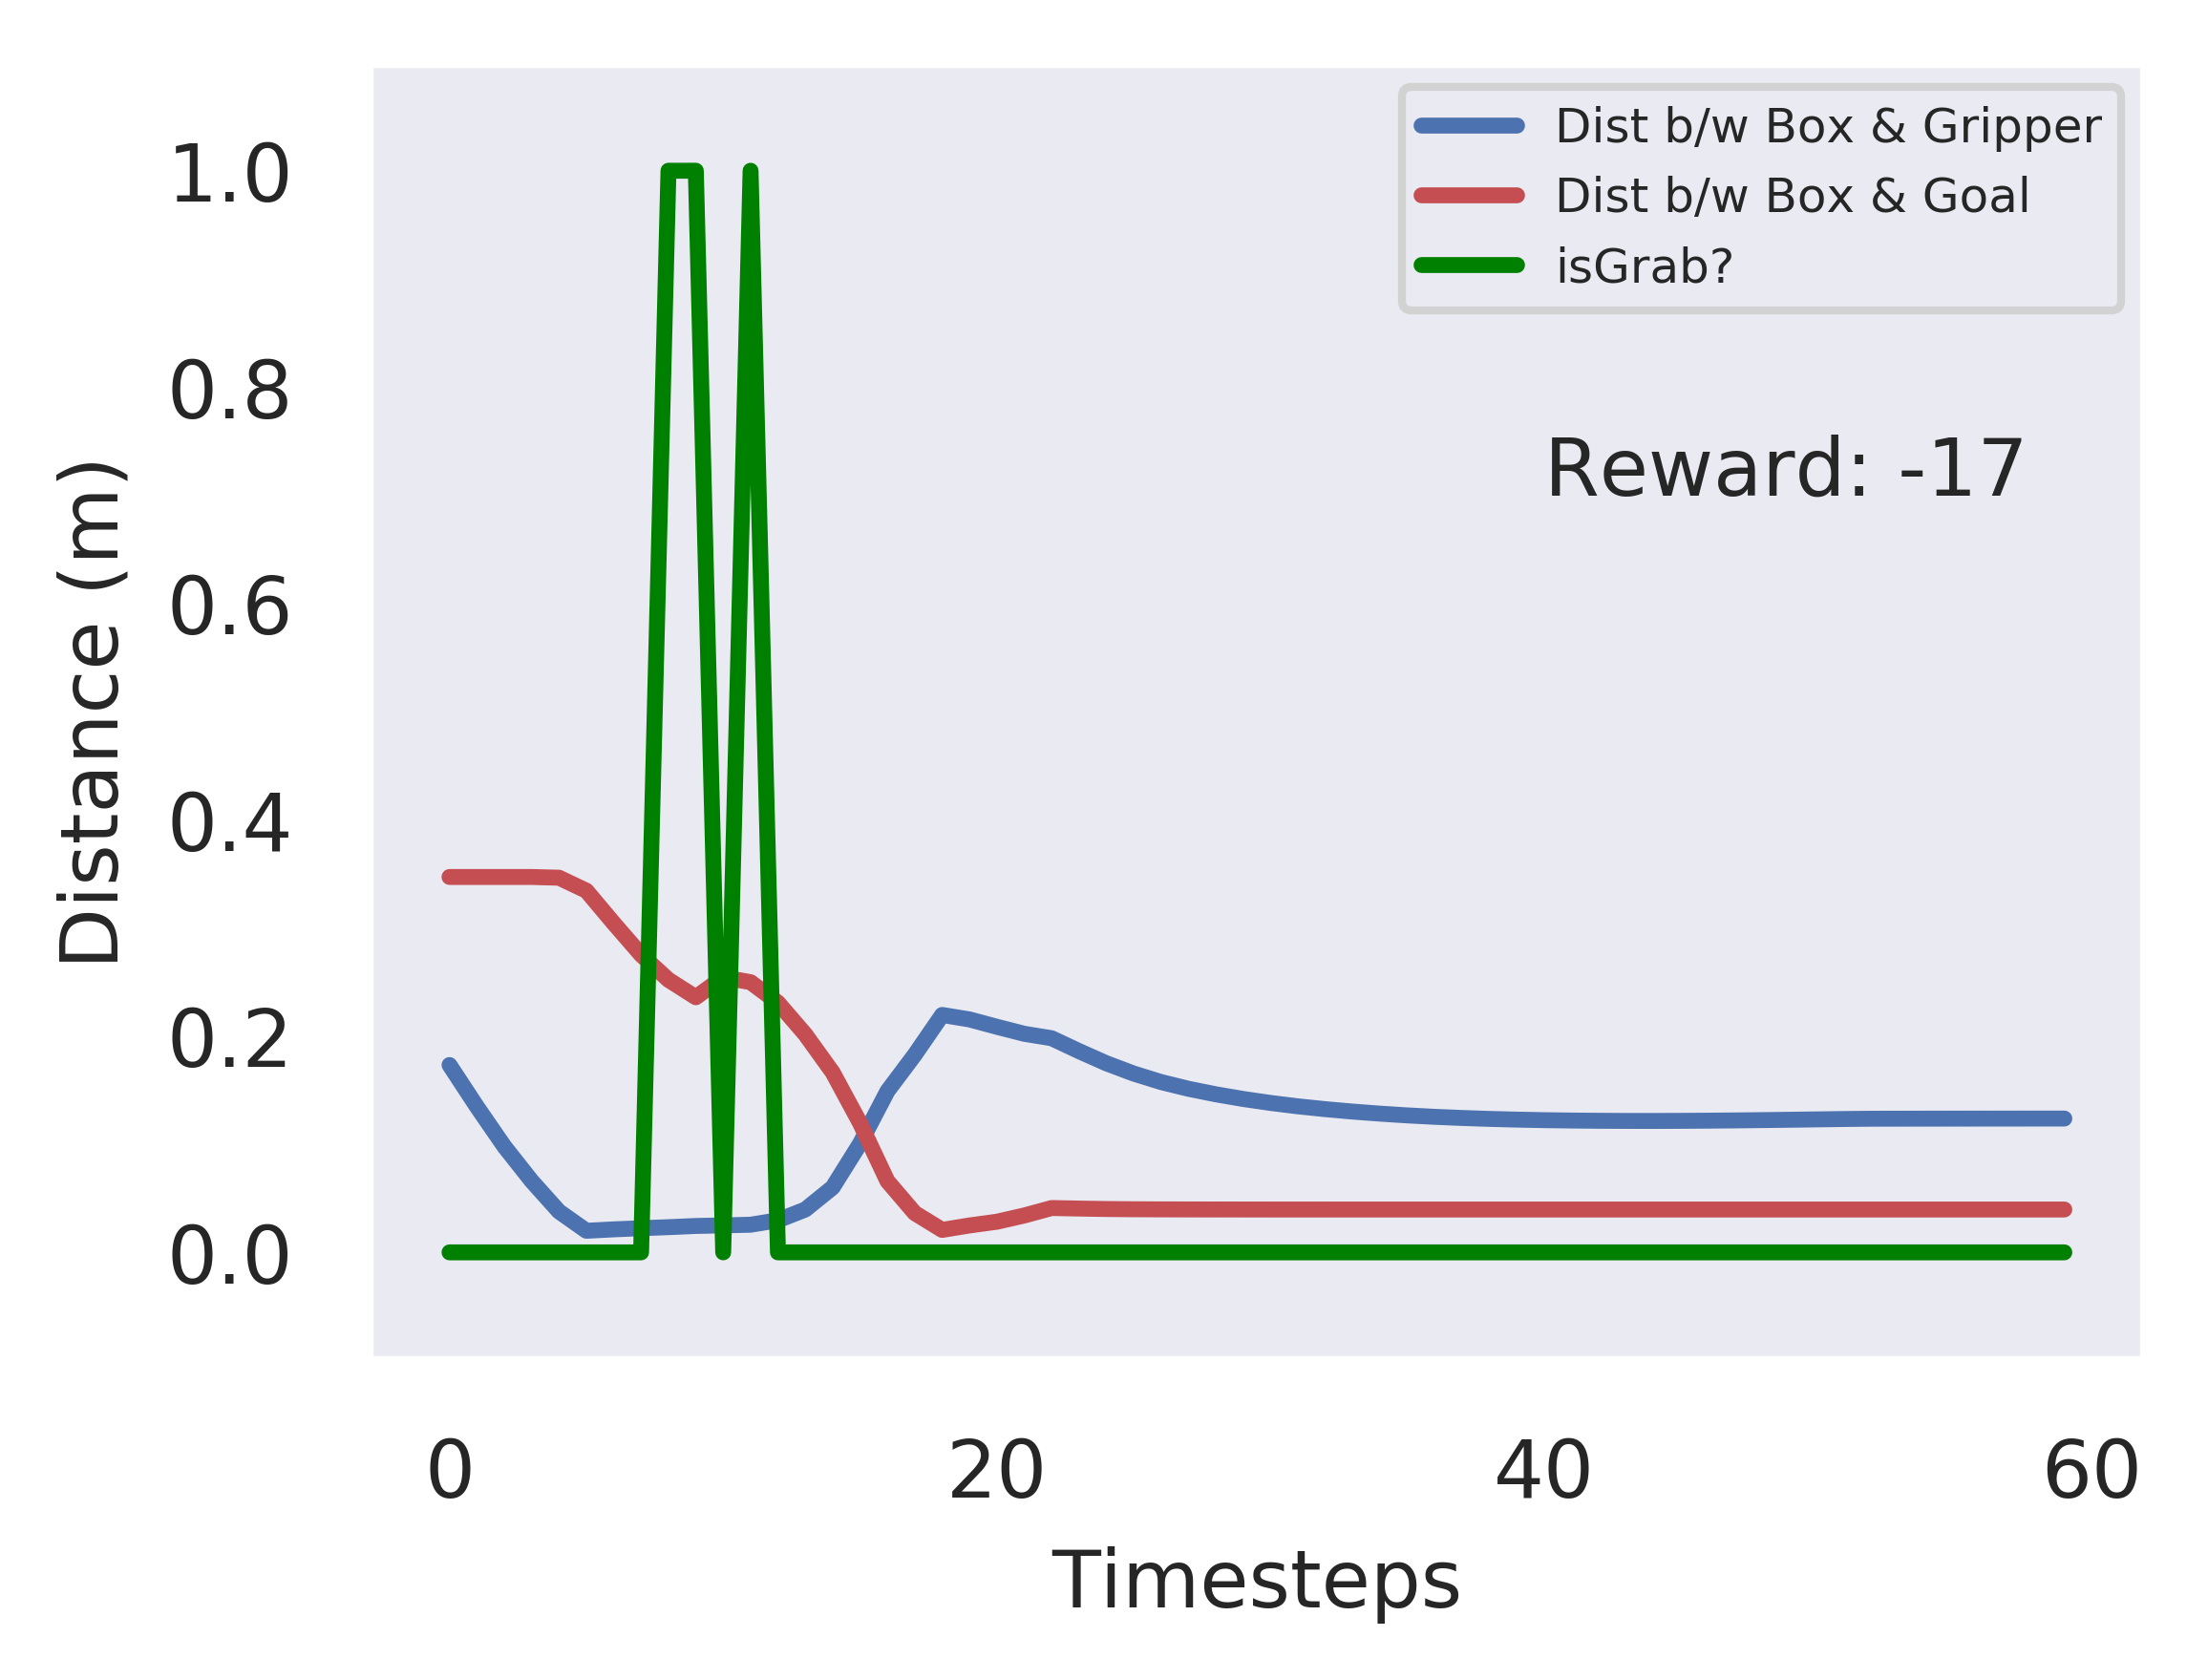

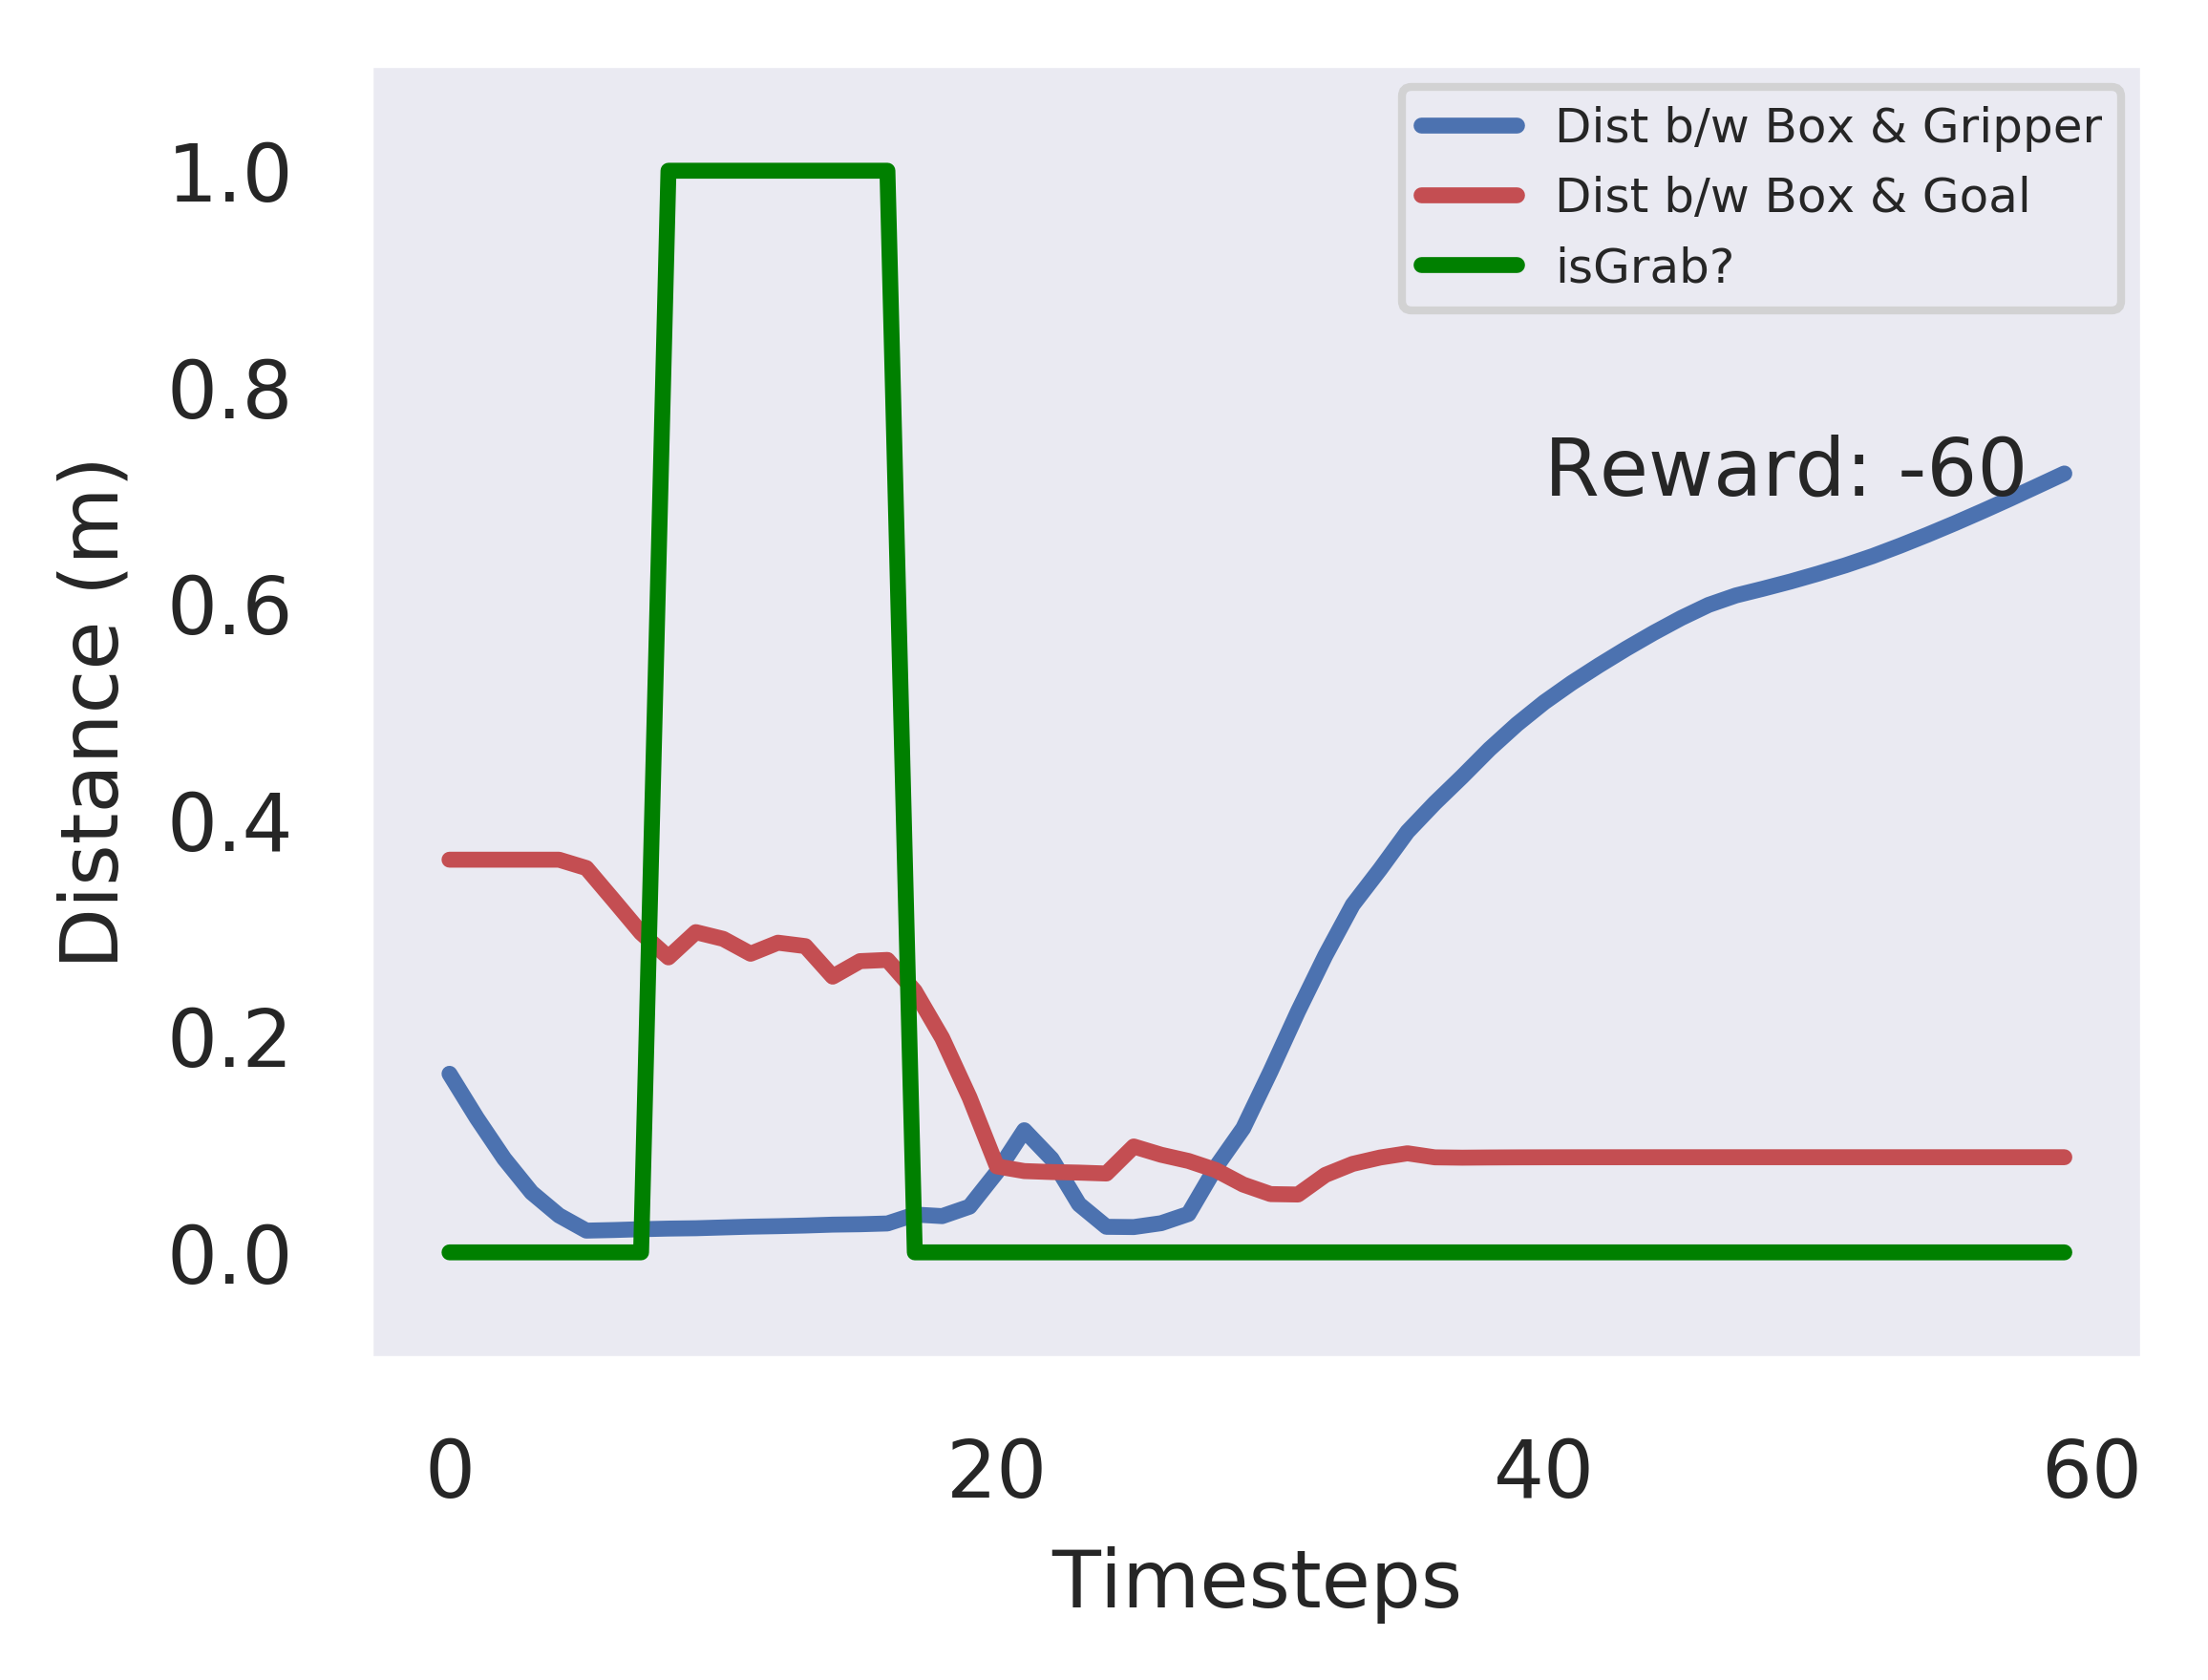

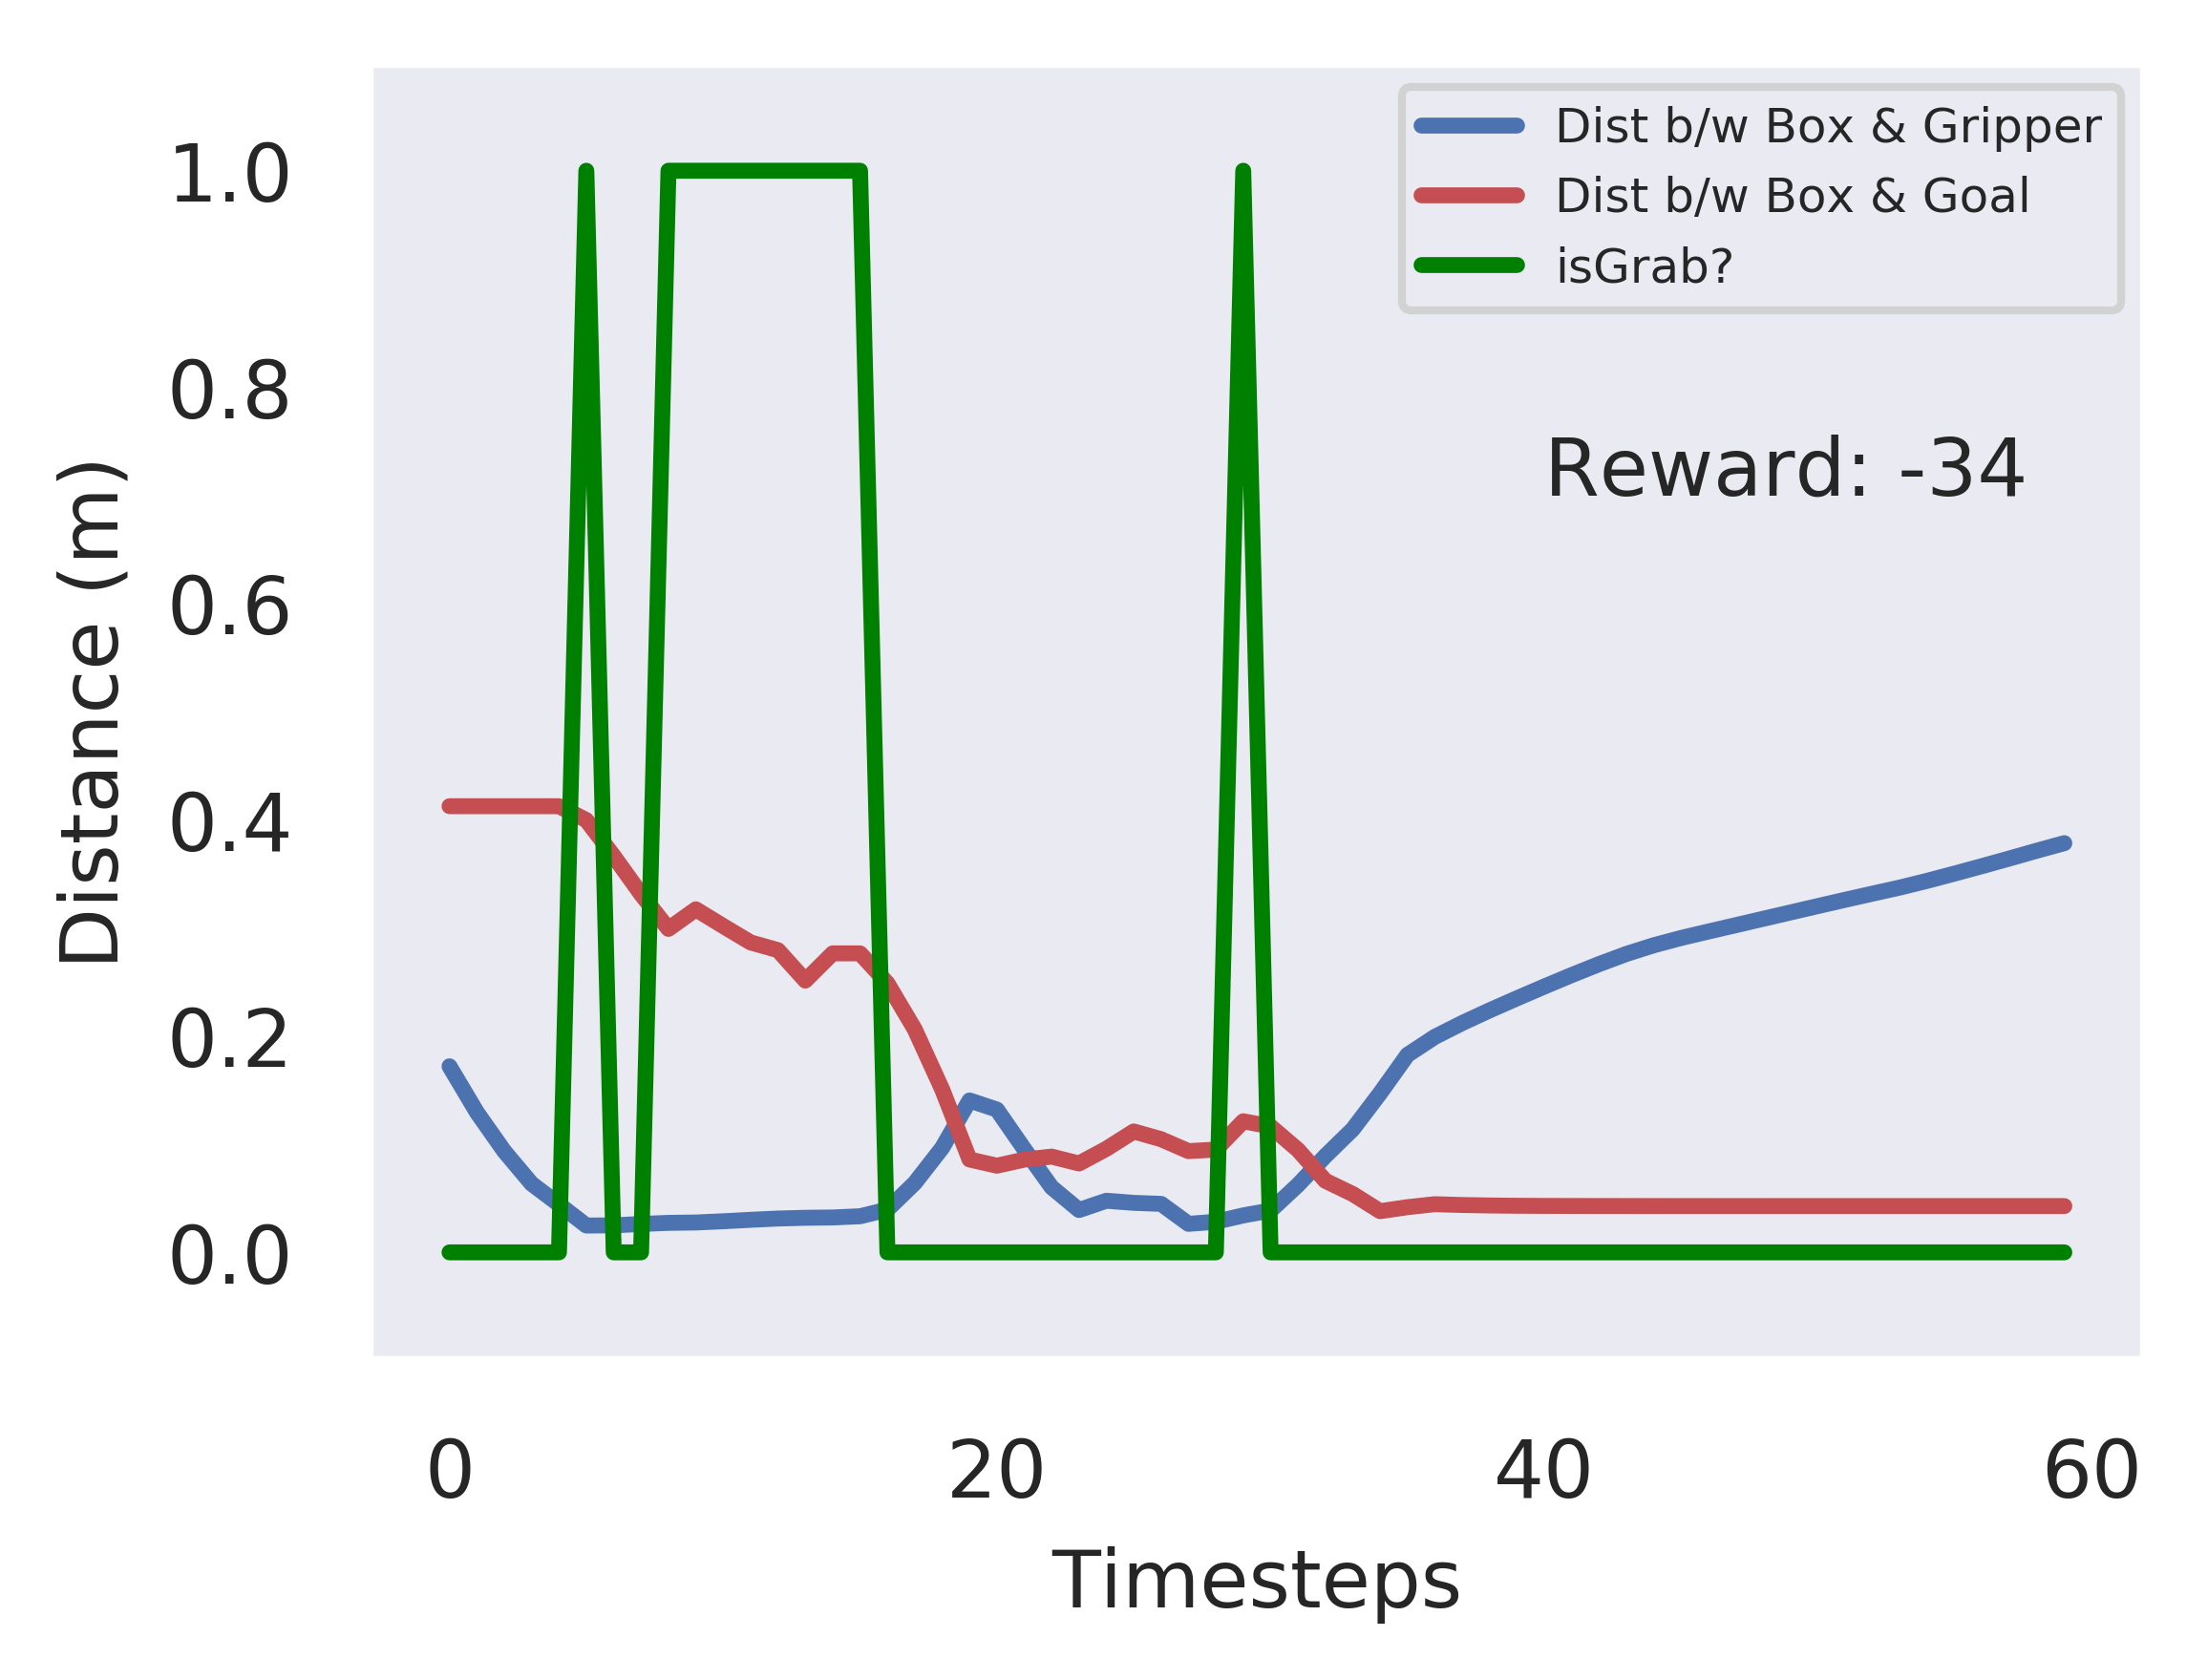

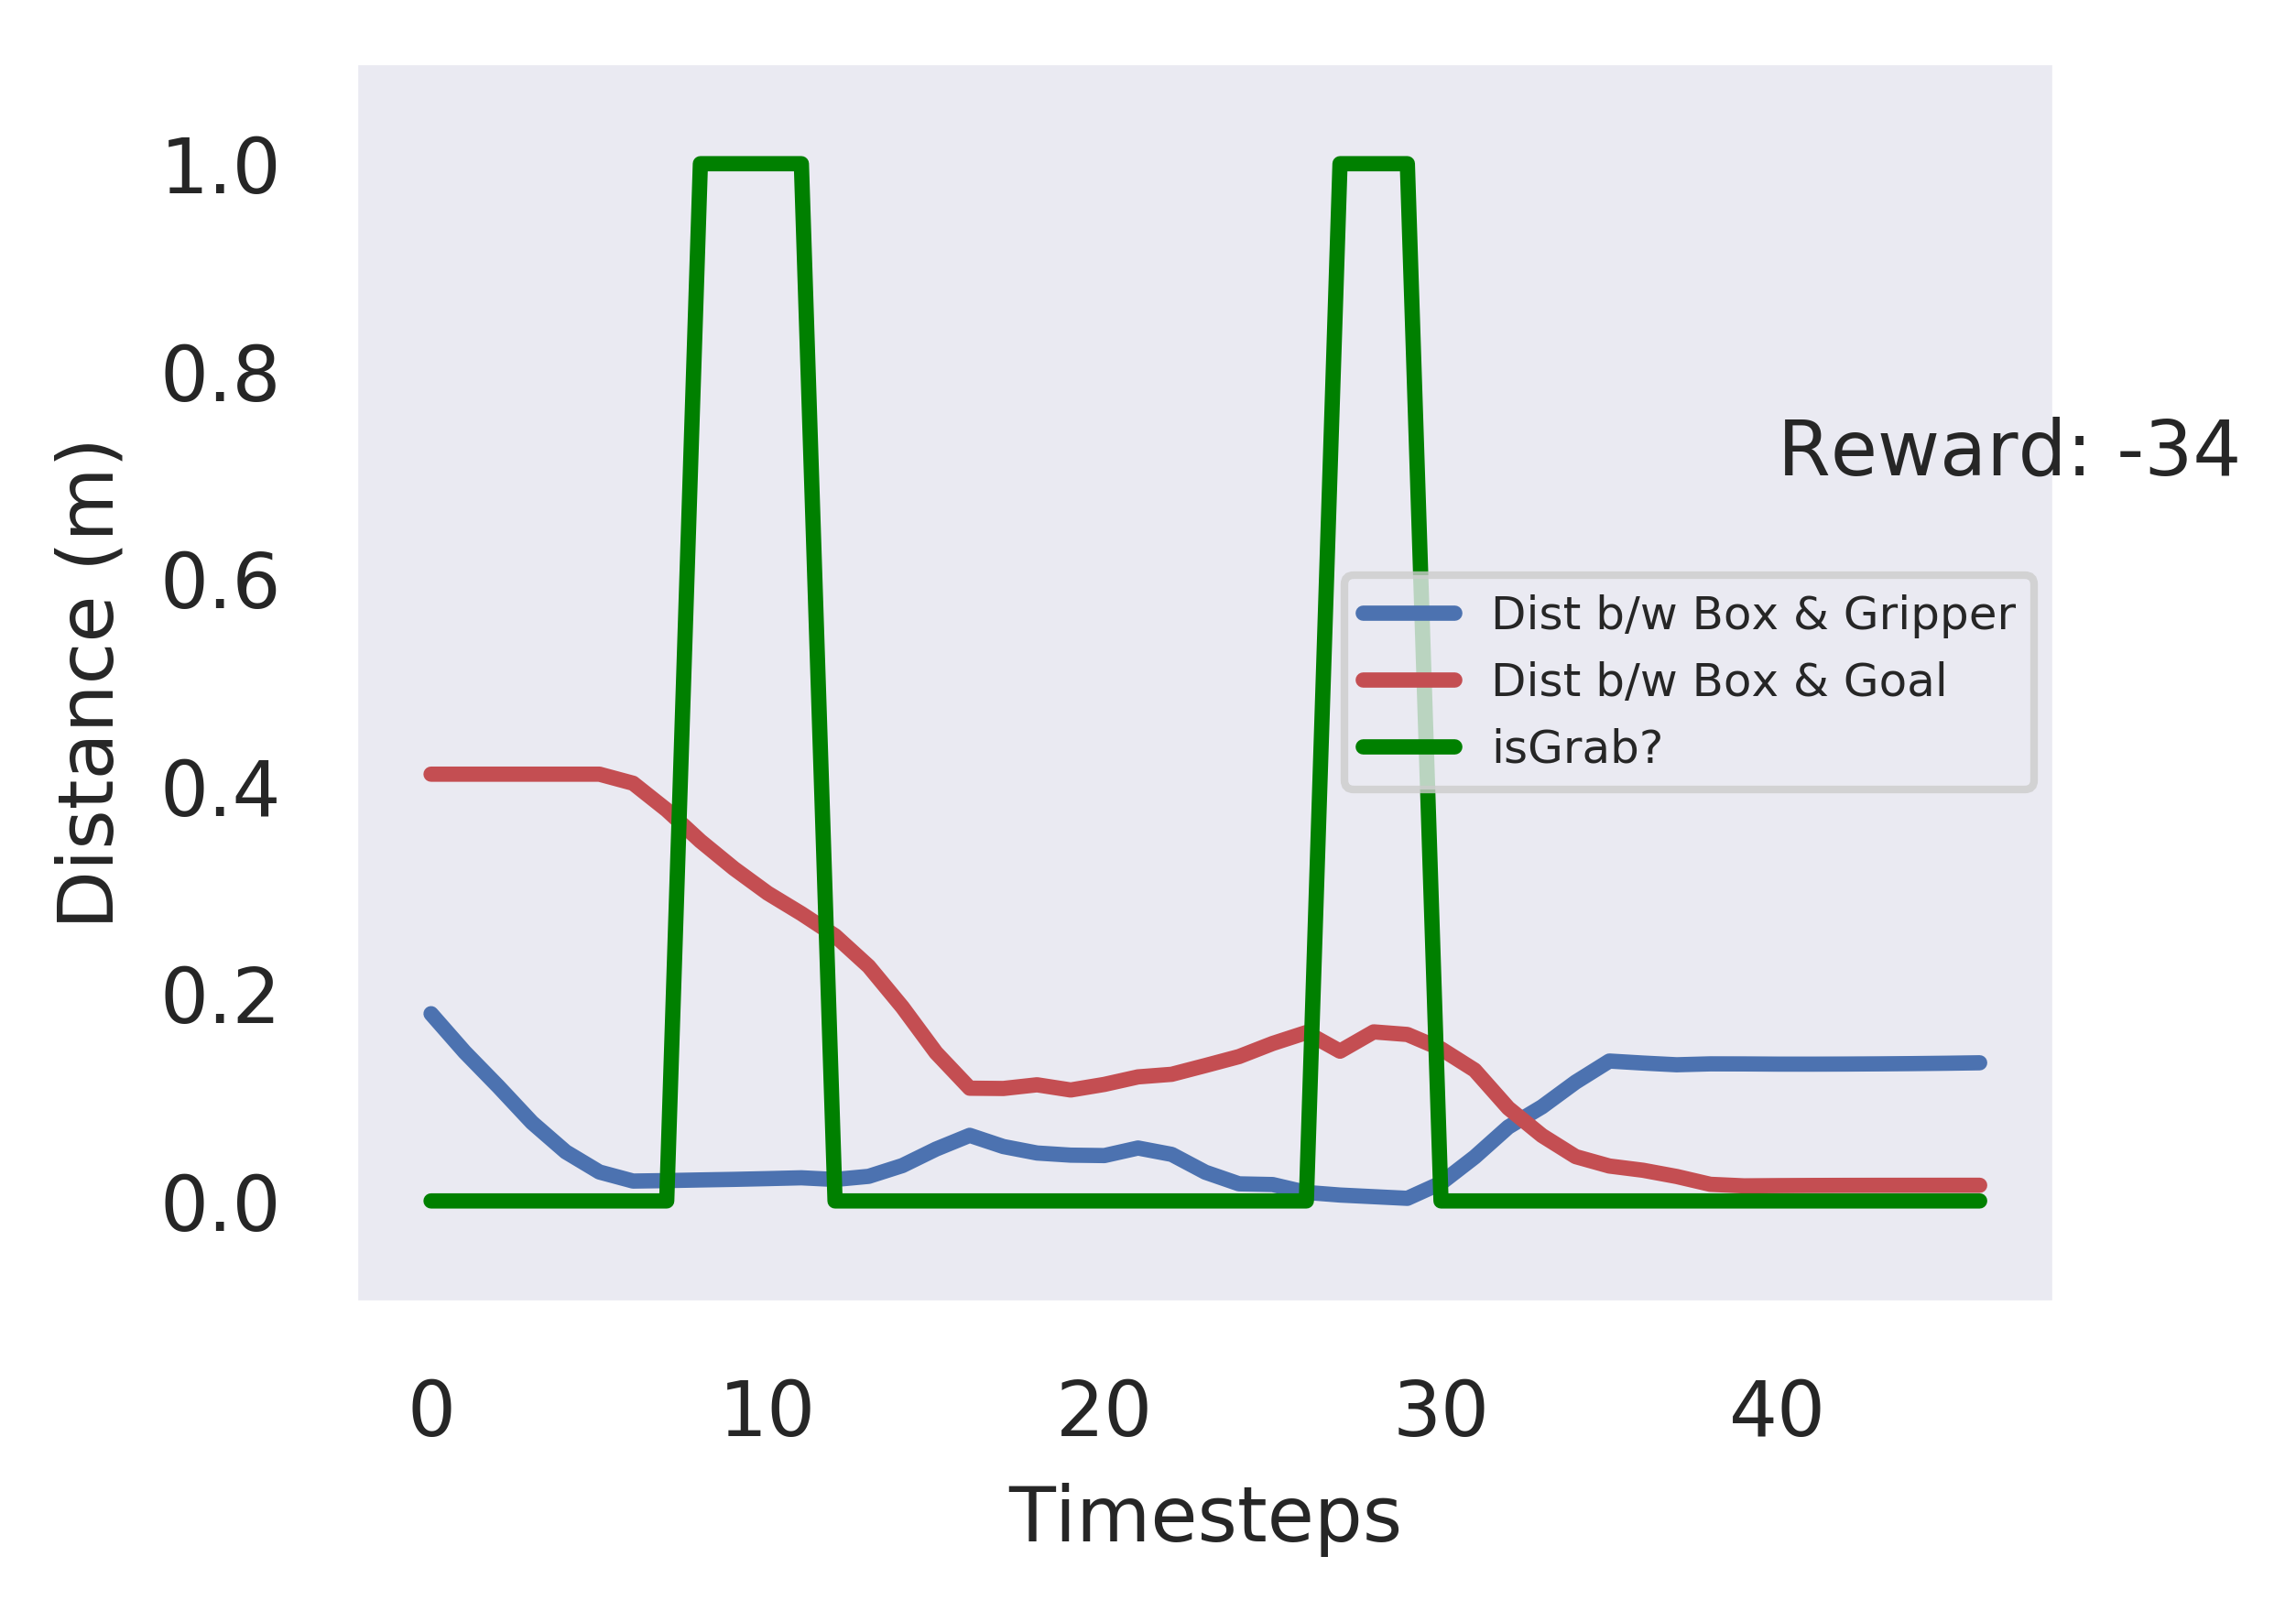

In [15]:
#Enter episode Number here:

for i in range(len(filenames_list)):

#     episode_num = np.int_(filenames_list[i][0])

    with open(filenames_list[i]) as csv_file:
        episodeMTX = list(csv.reader(csv_file, delimiter=','))
    del episodeMTX[:2]


    #Iterate over each episode and collect required data

    #Define traits to be collected
    distBoxGripper=[]
    distBoxGoal=[]
    isGrab = []
    reward = 0
    time_steps_grip=0
    movedWoGrab = []

    
    
    for step in episodeMTX:

        dist_box_gripper = ((np.double(step[8])-np.double(step[5]))**2 + (np.double(step[9])-np.double(step[6]))**2 + (np.double(step[10])-np.double(step[7]))**2)**0.5
        distBoxGripper.append(dist_box_gripper)

    #     if dist_box_gripper<0.05: #CHANGE LIMIT
    #         time_steps_grip+=1

        dist_box_goal = ((np.double(step[8])-np.double(step[11]))**2 + (np.double(step[9])-np.double(step[12]))**2 + (np.double(step[10])-np.double(step[13]))**2)**0.5
        distBoxGoal.append(dist_box_goal)

        isGrab.append(np.double(step[1]))

        reward+=np.double(step[3])

        moved_wo_grab = np.double(step[2])
        movedWoGrab.append(moved_wo_grab)

    plt.figure(figsize = [4, 3], dpi = 600)

    plt.plot(distBoxGripper,'b',linewidth=2)
    plt.plot(distBoxGoal,'r',linewidth=2)
    
    plt.ylim(-0.1,1.1)   
    
    plt.xlabel('Timesteps', fontsize=10)
    plt.ylabel('Distance (m)', fontsize=10)
    
    plt.xticks(fontsize=10, rotation=0)
    plt.yticks(fontsize=10, rotation=0)
    
    plt.plot(isGrab,'green',linewidth=2)
    plt.legend(('Dist b/w Box & Gripper', 'Dist b/w Box & Goal','isGrab?','Reward: ',reward), prop={'size': 6})

    plt.text(40,0.7,'Reward: %d'%reward, fontsize=10)
    fig_id = str(i)


    
plt.show()



